# SURPRISE HOUSING DATA-AUSTRAILIA-MARKET

### INTRODUCTION:
### A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. The company is looking at prospective properties to buy to enter the market. We are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

### OBJECTIVES:

### The company wants to know:

### 1. Which variables are significant in predicting the price of a house, and

### 2. How well those variables describe the price of a house.

### BUSINESS GOAL

### We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. These variables will be used to manipulate the strategy of the firm by concentrating on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## STEPS:

### 1. DATA SOURCING AND UNDERSTANDING
### 2. DATA CLEANING AND WRANGLING
### 3. EDA-UNIVARIATE, BIVARIATE,MULTIVARIATE ANALYSIS
### 4. DATA PREPARATION
### 5. MODEL BUILDING AND EVALUATION
### 6. CONCLUSION AND RECOMMENDATION
### 7. ASSIGNMENT QUESTIONS

## IMPORT LIBRARIES

In [338]:
#import libraraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import warnings
warnings.filterwarnings('ignore')
import datetime
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


# DATA SOURCING AND UNDERSTANDING

In [339]:
# upload the dataset
df=pd.read_csv('train.csv')

In [340]:
# check the number of observation and check the top 5 columns
l=len(df)
print(l)
df.head()

1460


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [341]:
#check the shape of the dataframe
df.shape

(1460, 81)

In [342]:
# check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [343]:
#check the values of the columns to better understand the individual columns
for i in df.columns:
    print(i)
    print(df[i].unique())

Id
[   1    2    3 ... 1458 1459 1460]
MSSubClass
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']
LotFrontage
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
LotArea
[ 8450  9600 11250 ... 17217 13175  9717]
Street
['Pave' 'Grvl']
Alley
[nan 'Grvl' 'Pave']
LotShape
['Reg' 'IR1' 'IR2' 'IR3']
LandContour
['Lvl' 'Bnk' 'Low' 'HLS']
Utilities
['AllPub' 'NoSeWa']
LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope
['Gtl' 

In [344]:
# check for duplicated rows
df.duplicated().sum()

0

There are no duplicated rows.

In [345]:
# check for duplicated columns
df.columns.duplicated().sum()

0

There are no duplicated columns.

In [346]:
#Check the dataset for number of unique values in each column
pd.DataFrame(df.nunique())

0
Id             1460
MSSubClass       15
MSZoning          5
LotFrontage     110
LotArea        1073
...             ...
MoSold           12
YrSold            5
SaleType          9
SaleCondition     6
SalePrice       663

[81 rows x 1 columns]

All the columns have more than 1 unique values

In [347]:
# check the % of null values per column
pd.DataFrame(100*((df.isnull().sum())/len(df)))

0
Id              0.000000
MSSubClass      0.000000
MSZoning        0.000000
LotFrontage    17.739726
LotArea         0.000000
...                  ...
MoSold          0.000000
YrSold          0.000000
SaleType        0.000000
SaleCondition   0.000000
SalePrice       0.000000

[81 rows x 1 columns]

we found a number of variables having missing values ranging from 0.06% to as high as 99%.

# DATA CLEANING AND WRANGLING

### DEALING WITH MISSING VALUES

### After going through the data dictionary and the business problem, we found that for the null values in the data sets actually had significant meaning in some columns than just representing missing value(Business understanding)as shown below-:

Alley   ------           -nan refers to ------ No alley access

MasVnrType -----       - nan refers to ------ None

BsmtQual ------         -nan refers to ------No Basement

BsmtCond ------         -nan refers to------- No Basement

BsmtExposure ------     -nan refers to------- No Basement

BsmtFinType1 -------     -nan refers to ------ No Basement

BsmtFinType2--------      -nan refers to ------ No Basement

FireplaceQu--------       -nan refers to------- No Fireplace

GarageType ------       -nan refers to------- No Garage

GarageFinish------      -nan refers to------- No Garage

GarageQua--------       -nan refers to------- No Garage

GarageCond -------      -nan refers to-------- No Garage

PoolQC -------          -nan refers to--------No pool

Fence  -------          -nan refers to-------- No Fence

MiscFeature -------     -nan refers to-------- None(no misc features)



In [348]:
# changing the nan values for above columns to their respective meaning
df['Alley']=df['Alley'].fillna('No_Alley_Access')
df['MasVnrType']= df['MasVnrType'].fillna('None')
df['BsmtQual']=df['BsmtQual'].fillna('No_Basement')
df['BsmtCond']=df['BsmtCond'].fillna('No_Basement')
df['BsmtExposure']=df['BsmtExposure'].fillna('No_Basement')
df['BsmtFinType1']=df['BsmtFinType1'].fillna('No_Basement')
df['BsmtFinType2'] =df['BsmtFinType2'].fillna('No_Basement')
df['FireplaceQu']=df['FireplaceQu'].fillna("No_Fireplace")
df['GarageType']=df['GarageType'].fillna("No_Garage")
df['GarageFinish']=df['GarageFinish'].fillna("No_Garage")
df['GarageQual']=df['GarageQual'].fillna("No_Garage")
df['GarageCond']=df['GarageCond'].fillna("No_Garage")
df['PoolQC']=df['PoolQC'].fillna("No_Pool")
df['Fence']=df['Fence'].fillna("No_Fence")
df['MiscFeature']=df['MiscFeature'].fillna("No_MiscFeature")


In [349]:
# Recheck the % of null values per column
pd.DataFrame(100*((df.isnull().sum())/len(df)))

0
Id              0.000000
MSSubClass      0.000000
MSZoning        0.000000
LotFrontage    17.739726
LotArea         0.000000
...                  ...
MoSold          0.000000
YrSold          0.000000
SaleType        0.000000
SaleCondition   0.000000
SalePrice       0.000000

[81 rows x 1 columns]

Now we have missing values for 3 numerical variables with highest for LotFrontage-17% which can be imputed by median (because variable has outliers and mean may not be appropriate). We ll impute the missing variable after train test split to avoid diluting the train data with test data information.

In [350]:
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [351]:
# percentage of data after dealing with missing values
(len(df)/l)*100

100.0

### DROP UNNECESSARY VARIABLES

In [352]:
#drop unwanted columns like ID-(that is just an identification number and does not provide any useful information for the analysis)
df.drop(['Id'],inplace=True,axis=1)

### DERIVED VARIABLES

We will create new variables from yearbuilt,year remodadd, garageyr blt and year sold and drop these original variables after that.

In [353]:
# create a new variables for age of the property, remodelling_age,age of the garage
df['age_of_property']=df['YrSold'] - df['YearBuilt']#age of the house from the year it was built to the year it was sold.
df['remodelling_age']=df['YrSold']-df['YearRemodAdd']#duration from the year it was remodelled to the year it was sold
df['age_of_garage']=df['YrSold']-df['GarageYrBlt']#age of the garage from the year it was built to the year it was sold

In [354]:
#recheck the top 5 rows of the dataset to check the derived variables
df.head(5)

MSSubClass MSZoning  LotFrontage  LotArea Street            Alley LotShape  \
0          60       RL         65.0     8450   Pave  No_Alley_Access      Reg   
1          20       RL         80.0     9600   Pave  No_Alley_Access      Reg   
2          60       RL         68.0    11250   Pave  No_Alley_Access      IR1   
3          70       RL         60.0     9550   Pave  No_Alley_Access      IR1   
4          60       RL         84.0    14260   Pave  No_Alley_Access      IR1   

  LandContour Utilities LotConfig  ...     MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub    Inside  ...  No_MiscFeature       0      2   2008   
1         Lvl    AllPub       FR2  ...  No_MiscFeature       0      5   2007   
2         Lvl    AllPub    Inside  ...  No_MiscFeature       0      9   2008   
3         Lvl    AllPub    Corner  ...  No_MiscFeature       0      2   2006   
4         Lvl    AllPub       FR2  ...  No_MiscFeature       0     12   2008   

  SaleType SaleCondition  SalePrice  age_of_property  remodelling_age  \
0       WD        Normal     208500                5                5   
1       WD        Normal     181500               31               31   
2       WD        Normal     223500                7                6   
3       WD       Abnorml     140000               91               36   
4       WD        Normal     250000                8                8   

   age_of_garage  
0            5.0  
1           31.0  
2            7.0  
3            8.0  
4            8.0  

[5 rows x 83 columns]

In [355]:
#drop the orginal columns YrSold,YearBuilt,GarageYrBlt,YearRemodAdd
df.drop(['YrSold','YearBuilt','GarageYrBlt','YearRemodAdd'],axis=1,inplace=True)

In [356]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street            Alley LotShape  \
0          60       RL         65.0     8450   Pave  No_Alley_Access      Reg   
1          20       RL         80.0     9600   Pave  No_Alley_Access      Reg   
2          60       RL         68.0    11250   Pave  No_Alley_Access      IR1   
3          70       RL         60.0     9550   Pave  No_Alley_Access      IR1   
4          60       RL         84.0    14260   Pave  No_Alley_Access      IR1   

  LandContour Utilities LotConfig  ...     Fence     MiscFeature MiscVal  \
0         Lvl    AllPub    Inside  ...  No_Fence  No_MiscFeature       0   
1         Lvl    AllPub       FR2  ...  No_Fence  No_MiscFeature       0   
2         Lvl    AllPub    Inside  ...  No_Fence  No_MiscFeature       0   
3         Lvl    AllPub    Corner  ...  No_Fence  No_MiscFeature       0   
4         Lvl    AllPub       FR2  ...  No_Fence  No_MiscFeature       0   

  MoSold SaleType SaleCondition  SalePrice  age_of_property remodelling_age  \
0      2       WD        Normal     208500                5               5   
1      5       WD        Normal     181500               31              31   
2      9       WD        Normal     223500                7               6   
3      2       WD       Abnorml     140000               91              36   
4     12       WD        Normal     250000                8               8   

  age_of_garage  
0           5.0  
1          31.0  
2           7.0  
3           8.0  
4           8.0  

[5 rows x 79 columns]

# EXPLORATORY DATA ANALYSIS

#### Variables in our dataset can be classified  into:
           1. Target /Dependant Variable
           2.  Independant variables
                      1. Numeric variable
                                  1. Numeric Discrete variables
                                  2. Numeric Continous variables
                      2. Categorical variables
                      

## TARGET VARIABLE

The target variable in our analysis is SalePrice

In [357]:
#define a function for univariate analysis for continuous variable by plotting distribution plot and box plot to see the outliers.

def Univariate_conti(data,col1):
    plt.figure(figsize=(15,8),facecolor='lavender')
    # subplot 1
    plt.subplot(2, 2, 1)
    ax = sns.distplot(data[col1],rug = True)
    ax.set_title(col1 + " Distribution Plot",fontsize=16)
    ax.set_xlabel(col1,fontsize=14)
    # subplot 2
    plt.subplot(2, 2, 2)
    ax = sns.boxplot(y=data[col1])
    ax.set_title(col1 + ' Box Plot',fontsize=16)
    ax.set_ylabel(col1,fontsize=14)
    plt.show()    

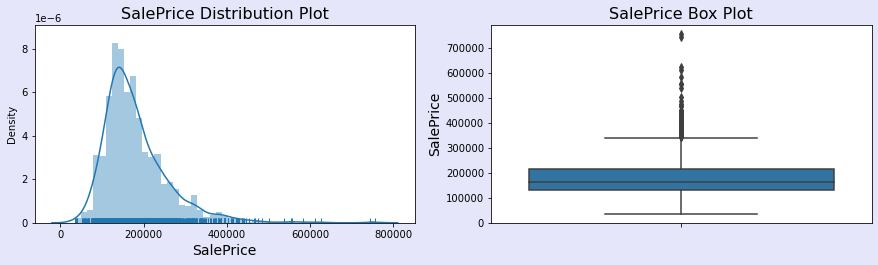

In [358]:
#check the distribution of SalePrice
Univariate_conti(df,'SalePrice')

### Insight- Most of the saleprices are in the range 120000-220000 and also has some outliers

## INDEPENDANT VARIABLES

## NUMERIC DATA

In [359]:
# all numeric (float and int) variables in the dataset as df_numeric
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'SalePrice', 'age_of_property', 'remodelling_age',
       'age_of_garage'],
      dtype='object')

## CATEGORICAL VARIABLES

In [360]:
#  all categorical variables in the dataset as df_Categorical_variables
df_Categorical_variables=df.select_dtypes(include=['object'])
df_Categorical_variables.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

## DISCRETE NUMERIC VARIABLES

In [361]:
#  all the discrete numeric variables(variables with <16 unique values-we choose 16 arbitarily)
df_discrete=[]
for i in df_numeric.columns:
    if df[i].nunique()<16:
        df_discrete.append(i)
df_discrete     

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MoSold']

## CONTINOUS NUMERIC VARIABLES

In [362]:
#  all continous numeric variables
df_Continous_variables=[]
for i in df_numeric.columns:
    if i not in df_discrete and i != 'SalePrice':
        df_Continous_variables.append(i)
df_Continous_variables        

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'age_of_property',
 'remodelling_age',
 'age_of_garage']

In [363]:
df.shape

(1460, 79)

## UNIVARIATE ANALYSIS

## FOR CONTINOUS-NUMERIC VARIABLES

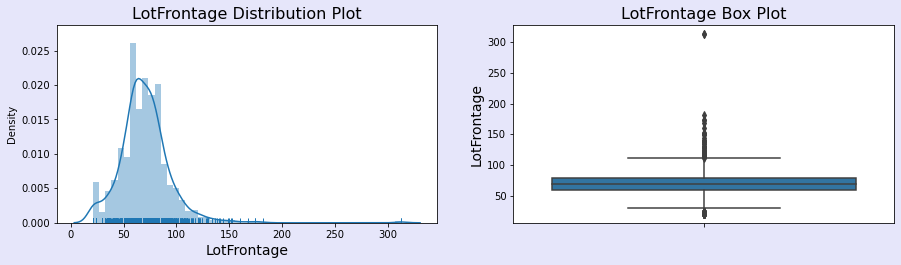

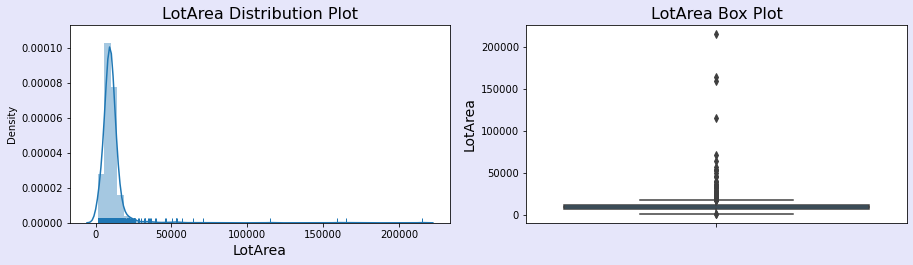

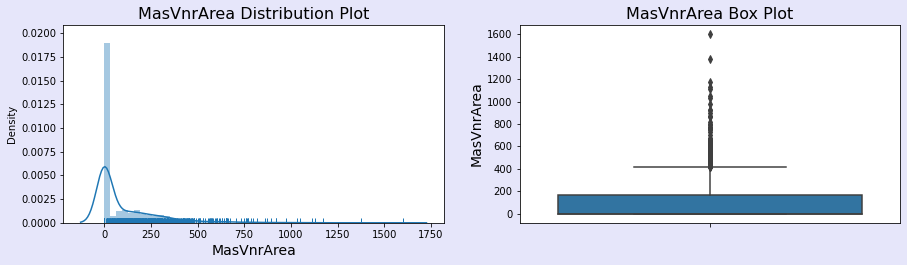

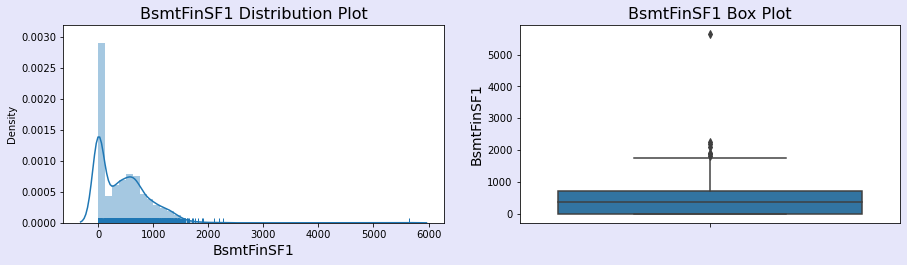

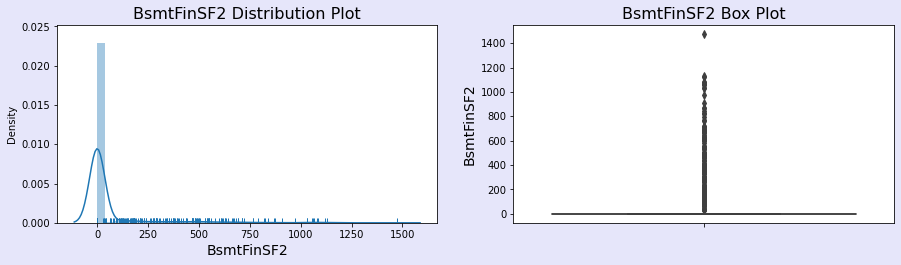

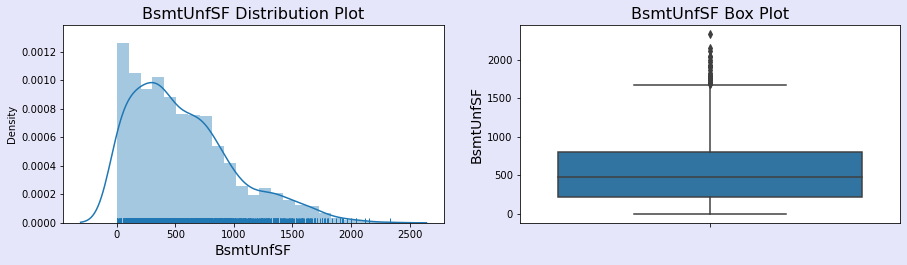

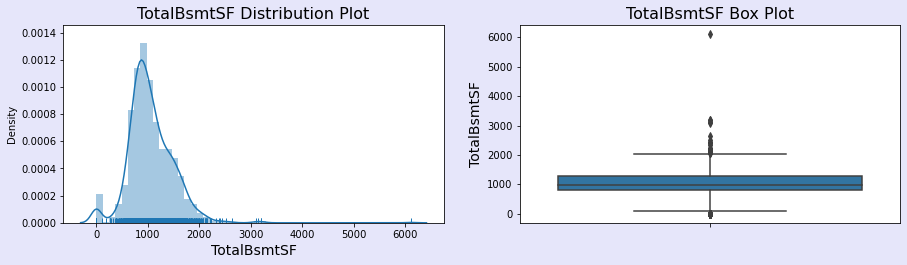

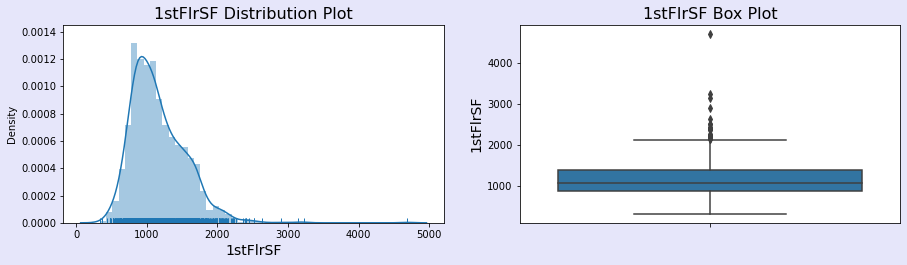

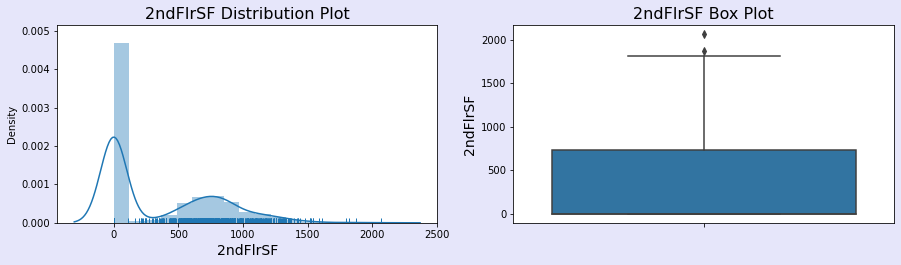

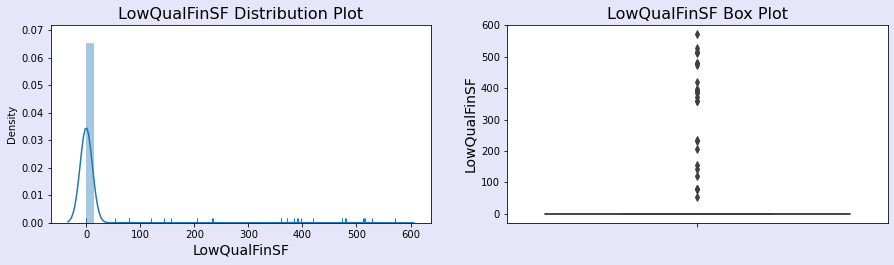

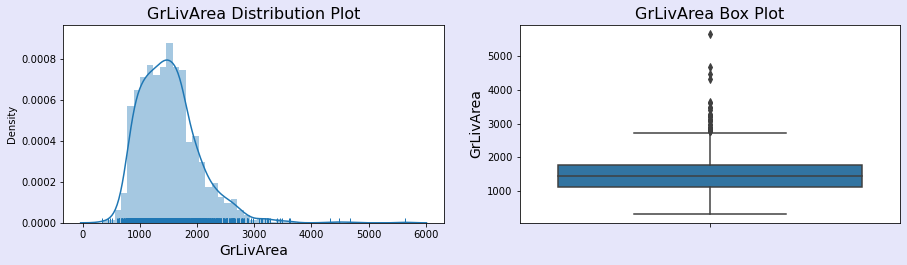

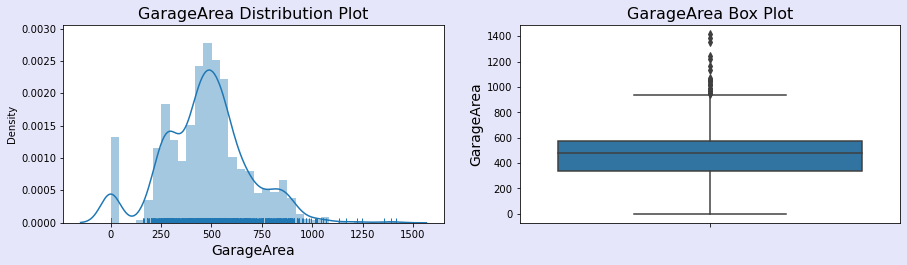

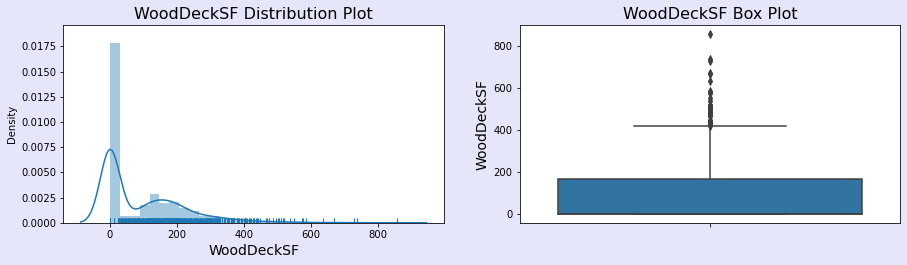

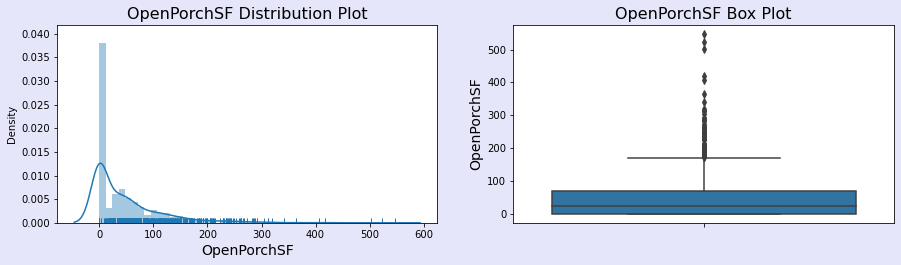

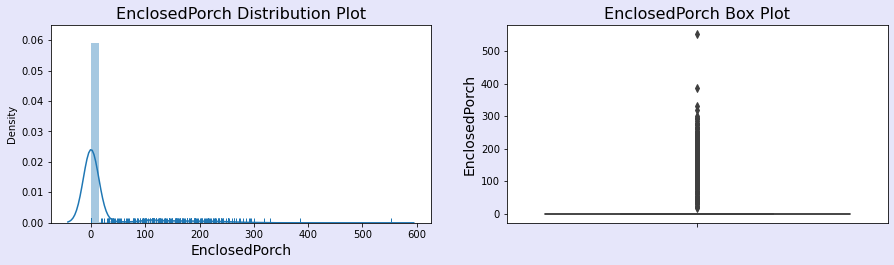

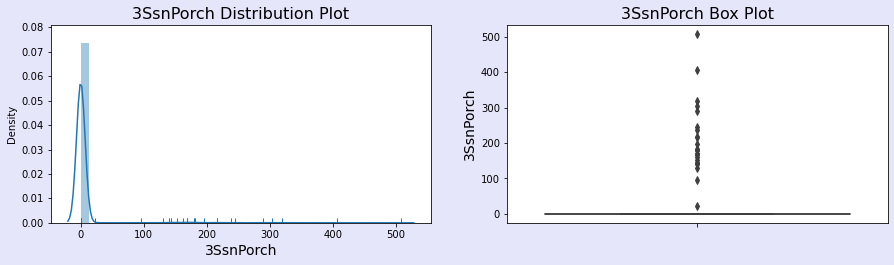

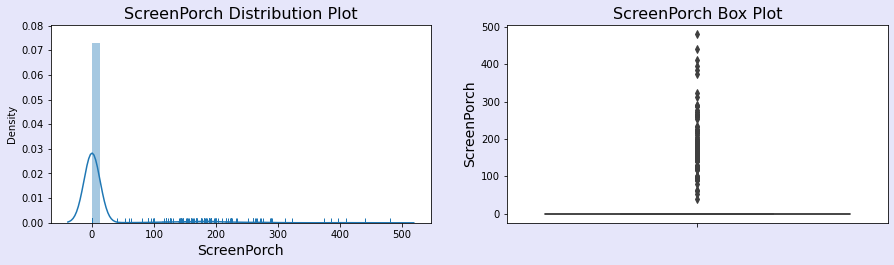

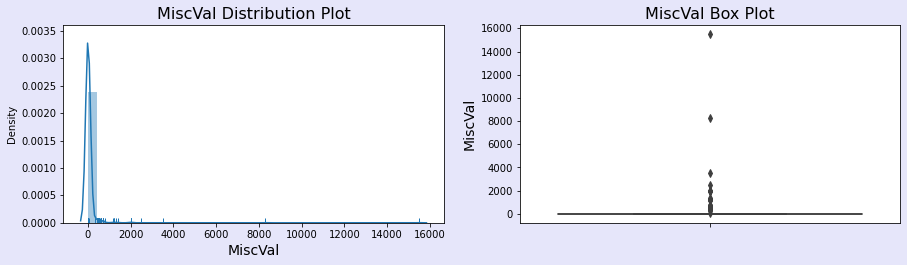

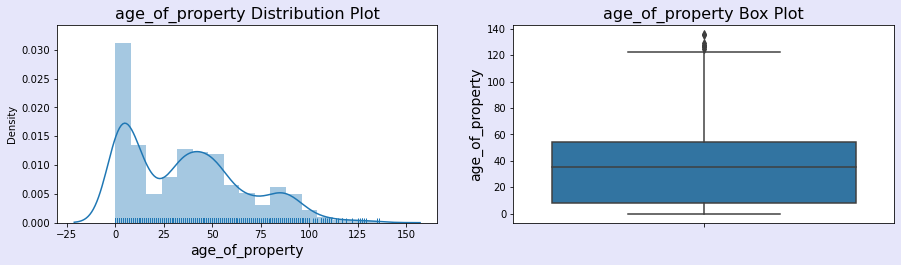

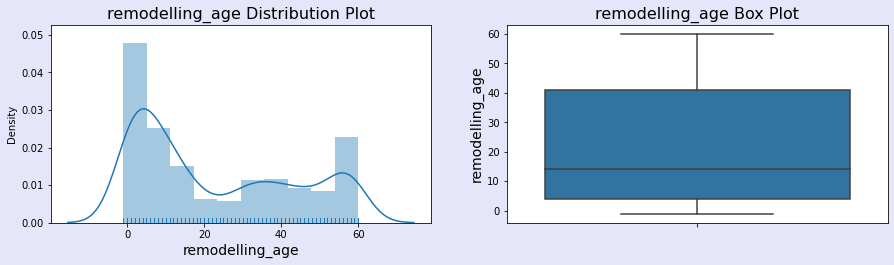

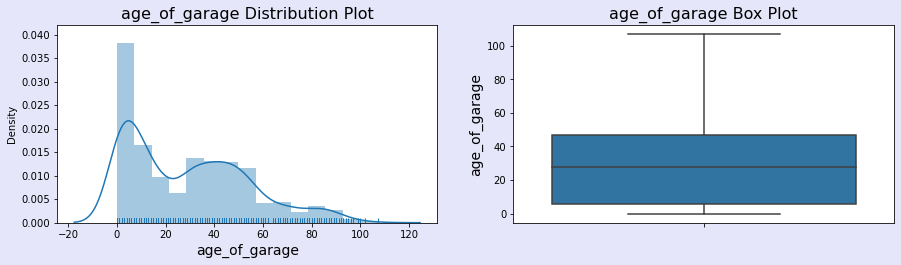

In [364]:
# plot distplot and boxplot for the continous numeric independant variables
for i in df_Continous_variables:
        Univariate_conti(df,i)

In [365]:
# check the percentiles and statistics parameters 
df.describe(percentiles=[.25, .50, .75, .80 , .90, .95, .99 ])

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
80%      80.000000    85.000000   12205.800000     7.000000     7.000000   
90%     120.000000    96.000000   14381.700000     8.000000     7.000000   
95%     160.000000   107.000000   17401.150000     8.000000     8.000000   
99%     190.000000   141.000000   37567.640000    10.000000     9.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

        MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  ...  \
count  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean    103.685262   443.639726    46.549315   567.240411  1057.429452  ...   
std     181.066207   456.098091   161.319273   441.866955   438.705324  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000   223.000000   795.750000  ...   
50%       0.000000   383.500000     0.000000   477.500000   991.500000  ...   
75%     166.000000   712.250000     0.000000   808.000000  1298.250000  ...   
80%     206.000000   806.400000     0.000000   896.000000  1391.200000  ...   
90%     335.000000  1065.500000   117.200000  1232.000000  1602.200000  ...   
95%     456.000000  1274.000000   396.200000  1468.000000  1753.000000  ...   
99%     791.920000  1572.410000   830.380000  1797.050000  2155.050000  ...   
max    1600.000000  5644.000000  1474.000000  2336.000000  6110.000000  ...   

       EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal  \
count    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean       21.954110     3.409589    15.060959     2.758904     43.489041   
std        61.119149    29.317331    55.757415    40.177307    496.123024   
min         0.000000     0.000000     0.000000     0.000000      0.000000   
25%         0.000000     0.000000     0.000000     0.000000      0.000000   
50%         0.000000     0.000000     0.000000     0.000000      0.000000   
75%         0.000000     0.000000     0.000000     0.000000      0.000000   
80%         0.000000     0.000000     0.000000     0.000000      0.000000   
90%       112.000000     0.000000     0.000000     0.000000      0.000000   
95%       180.150000     0.000000   160.000000     0.000000      0.000000   
99%       261.050000   168.000000   268.050000     0.000000    700.000000   
max       552.000000   508.000000   480.000000   738.000000  15500.000000   

            MoSold      SalePrice  age_of_property  remodelling_age  \
count  1460.000000    1460.000000      1460.000000      1460.000000   
mean      6.321918  180921.195890        36.547945        22.950000   
std       2.703626   79442.502883        30.250152        20.640653   
min       1.000000   34900.000000         0.000000        -1.000000   
25%       5.000000  129975.000000         8.000000         4.000000   
50%       6.000000  163000.000000        35.000000        14.000000   
75%       8.000000  214000.000000        54.000000        41.000000   
80%       8.000000  230000.000000        60.200000        47.000000   
90%      10.000000  278000.000000        84.000000        56.000000   
95%      11.000000  326100.000000        91.000000        58.000000   
99%      12.000000  442567.010000       110.410000        60.000000   
max      12.000000  755000.000000       136.000000        60.000000   

       age_of_garage  
count    1379.000000  
mean       29.30601

## OUTLIERS

we found that for following continous numeric variables there is a big gap between 99 percentile and the max value:

LotFrontage

LotArea

MasVnrArea

SalePrice

In [366]:
#we found that for following continous numeric variables there are outliers beyond 99percentile
s=['LotArea','MiscVal','MasVnrArea','SalePrice']

In [367]:
#removing outliers in these variables(beyond 99 percentile)
for i in s:
    df= df[df[i] < df[i].quantile(0.99)]
    

In [368]:
#recheck the shape
df.shape

(1389, 79)

In [369]:
#check the percentage of data remaining
len(df)/l*100

95.13698630136986

After removing outliers we still have 95.13% of obeservations. 

In [370]:
df.describe()

MSSubClass  LotFrontage       LotArea  OverallQual  OverallCond  \
count  1389.000000  1146.000000   1389.000000  1389.000000  1389.000000   
mean     57.159827    69.296684   9642.309575     6.031677     5.575234   
std      42.511827    22.983061   4107.268766     1.324945     1.114286   
min      20.000000    21.000000   1300.000000     1.000000     1.000000   
25%      20.000000    59.000000   7449.000000     5.000000     5.000000   
50%      50.000000    69.000000   9340.000000     6.000000     5.000000   
75%      70.000000    80.000000  11340.000000     7.000000     6.000000   
max     190.000000   313.000000  36500.000000    10.000000     9.000000   

        MasVnrArea  BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  ...  \
count  1389.000000  1389.00000  1389.000000  1389.000000  1389.000000  ...   
mean     90.362131   420.13031    45.997840   565.866811  1031.994960  ...   
std     146.994988   412.95432   160.200471   437.832257   389.724018  ...   
min       0.000000     0.00000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.00000     0.000000   220.000000   793.000000  ...   
50%       0.000000   370.00000     0.000000   484.000000   978.000000  ...   
75%     151.000000   695.00000     0.000000   808.000000  1264.000000  ...   
max     772.000000  1696.00000  1474.000000  2153.000000  3206.000000  ...   

       EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea      MiscVal  \
count    1389.000000  1389.000000  1389.000000  1389.000000  1389.000000   
mean       22.302376     3.353492    13.864651     1.781138    10.542837   
std        61.505213    28.821365    51.749497    33.461034    70.454610   
min         0.000000     0.000000     0.000000     0.000000     0.000000   
25%         0.000000     0.000000     0.000000     0.000000     0.000000   
50%         0.000000     0.000000     0.000000     0.000000     0.000000   
75%         0.000000     0.000000     0.000000     0.000000     0.000000   
max       552.000000   508.000000   396.000000   738.000000   620.000000   

            MoSold      SalePrice  age_of_property  remodelling_age  \
count  1389.000000    1389.000000      1389.000000      1389.000000   
mean      6.328294  174249.711303        37.082793        23.395248   
std       2.706101   66484.839161        30.207275        20.689449   
min       1.000000   34900.000000         0.000000         0.000000   
25%       5.000000  129000.000000         8.000000         4.000000   
50%       6.000000  160000.000000        36.000000        15.000000   
75%       8.000000  207500.000000        55.000000        42.000000   
max      12.000000  415298.000000       136.000000        60.000000   

       age_of_garage  
count    1309.000000  
mean       29.807487  
std        24.729446  
min         0.000000  
25%         7.000000  
50%        29.000000  
75%        47.000000  
max       107.000000  

[8 rows x 36 columns]

## CATEGORICAL DATA

In [371]:
#define a function for univariate analysis for categorical variables
def univariate_cate(data,col):
    
    fig,ax =plt.subplots(figsize=(16,8))
    sns.countplot(df[col],order = df[col].value_counts().index)
    plt.xticks(size=12)
    plt.xlabel(col, size=14)
    plt.yticks(size=12)
    plt.ylabel('Number', size=12)
    plt.title(col+" distribution", size=16)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
 
    total = len(df)
    for p in ax.patches:
               percentage = f'{round(100 * p.get_height() / total,2):.1f}%\n'
               x = p.get_x() + p.get_width() / 2
               y = p.get_height()
               ax.annotate(percentage, (x, y), ha='center', va='center')
    plt.tight_layout()
    plt.show()
    

Distribution of variable MSZoning


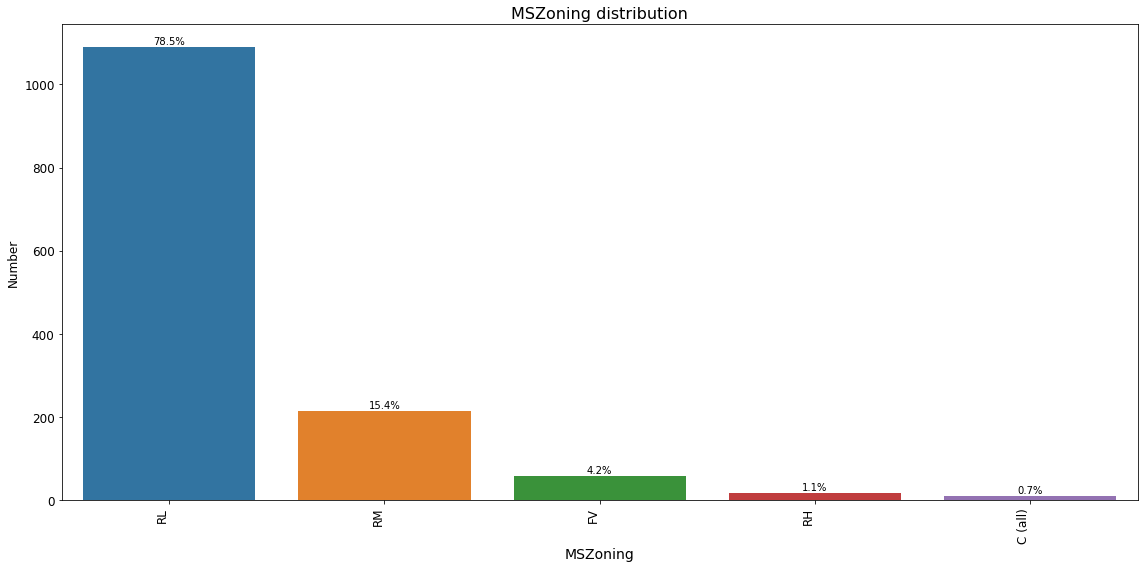

Distribution of variable Street


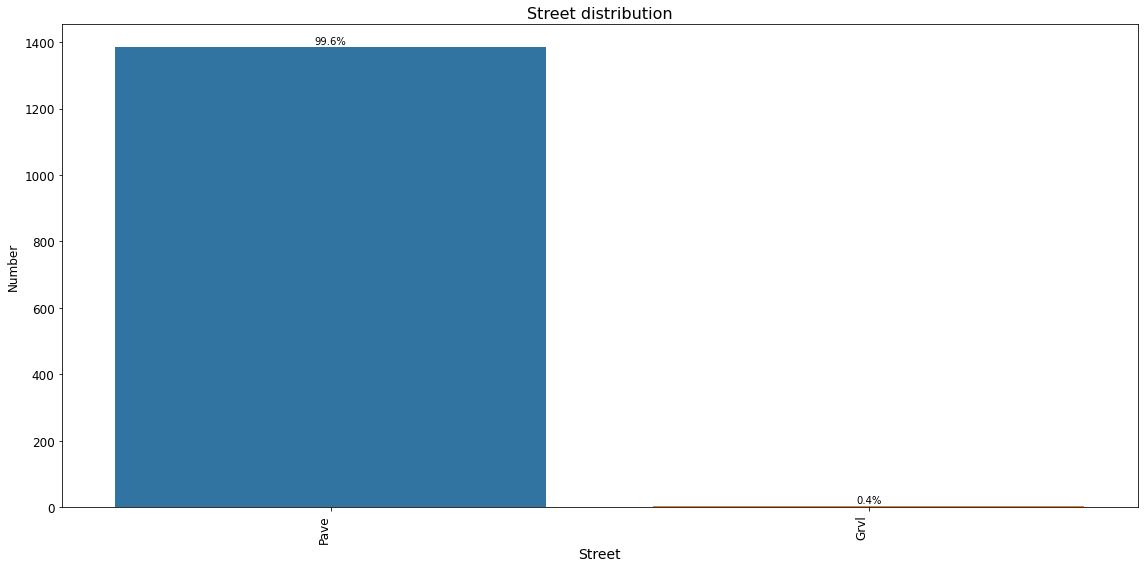

Distribution of variable Alley


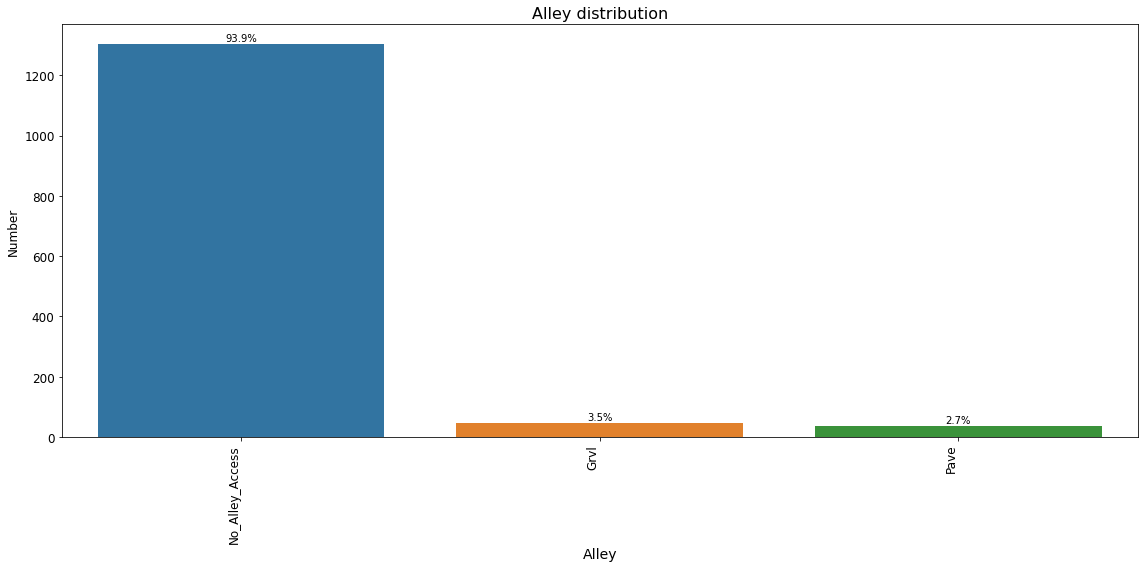

Distribution of variable LotShape


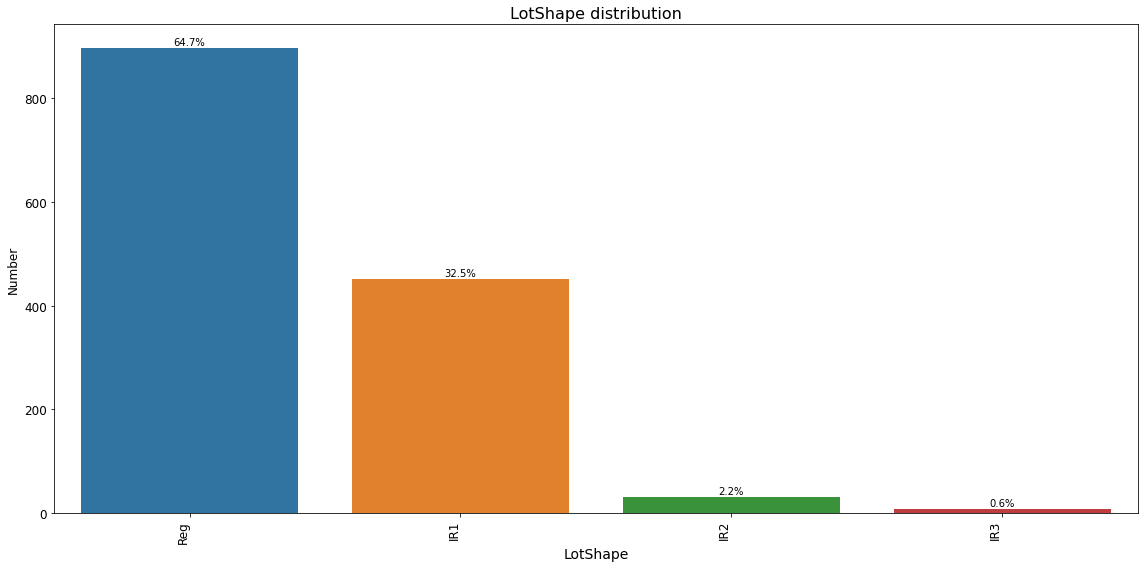

Distribution of variable LandContour


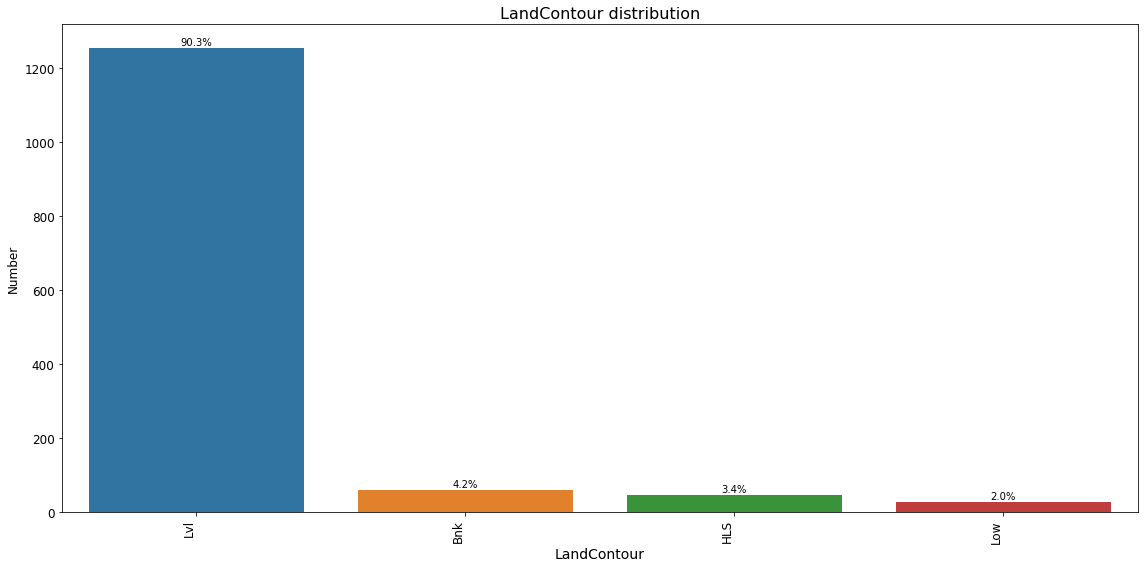

Distribution of variable Utilities


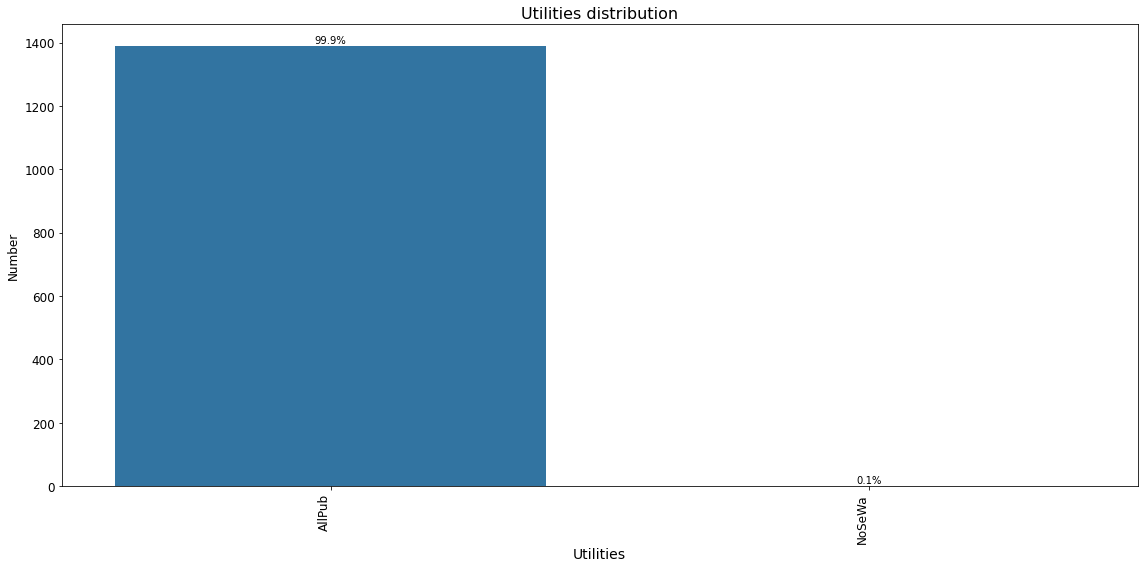

Distribution of variable LotConfig


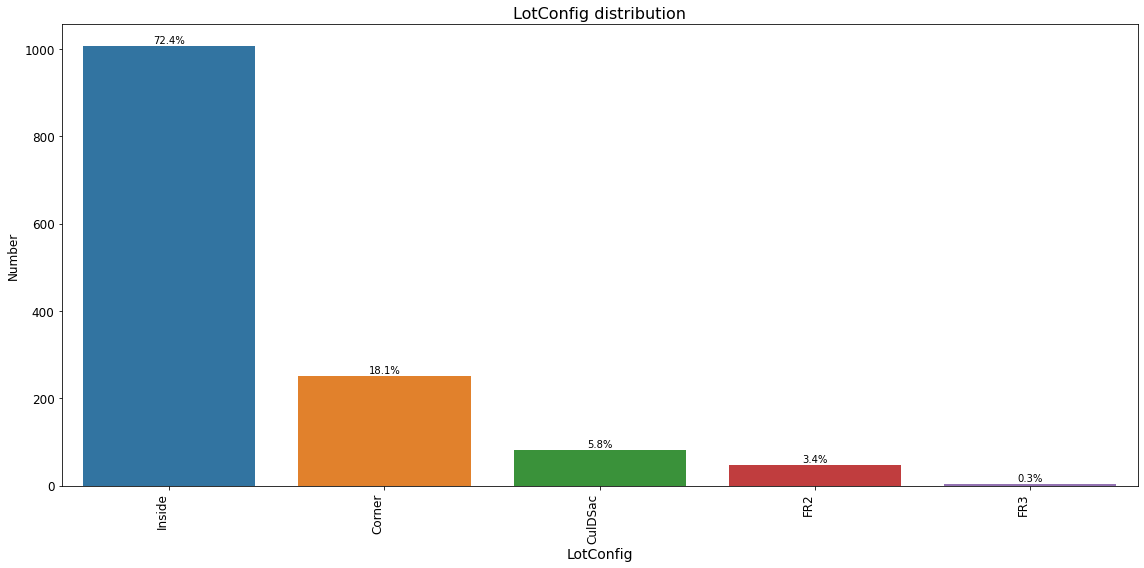

Distribution of variable LandSlope


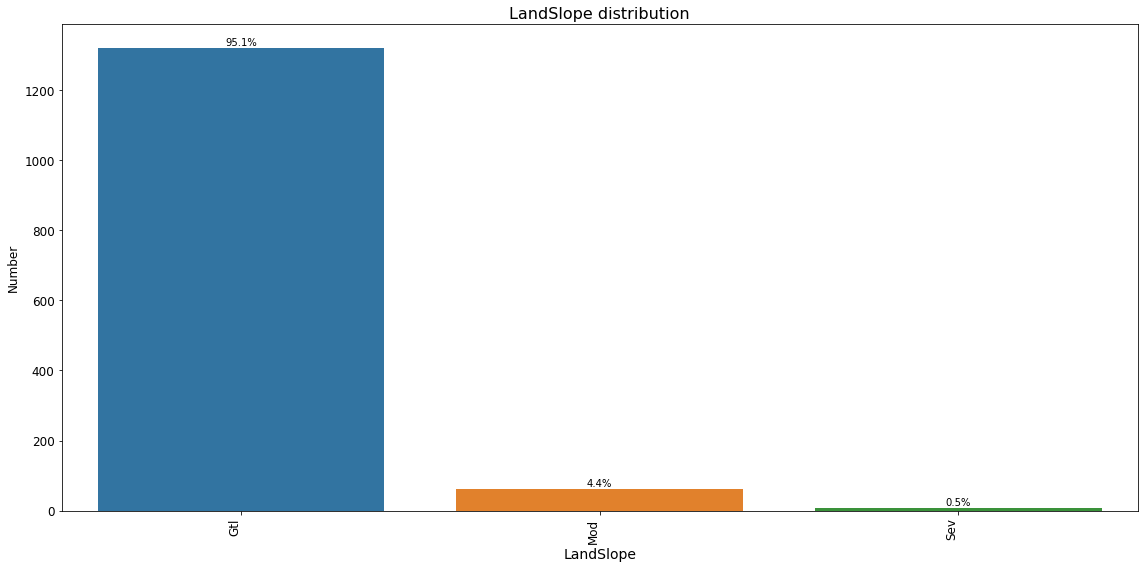

Distribution of variable Neighborhood


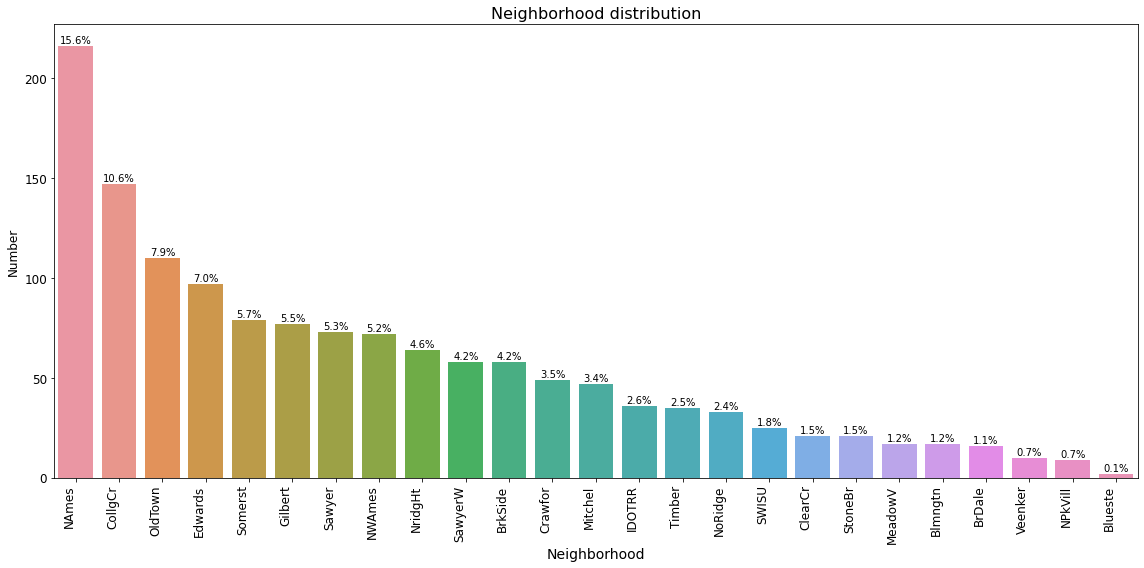

Distribution of variable Condition1


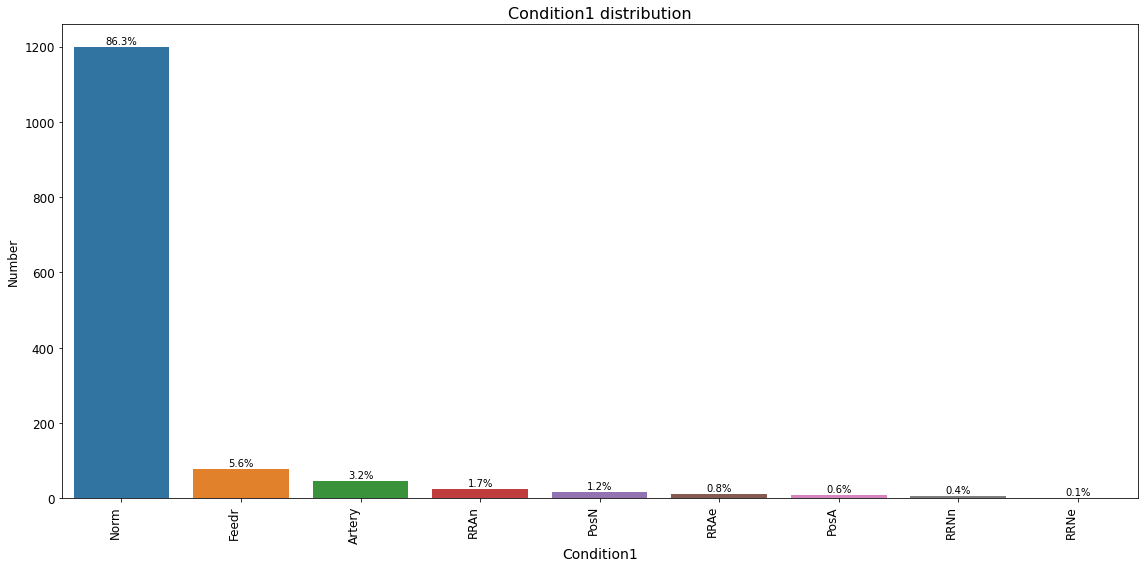

Distribution of variable Condition2


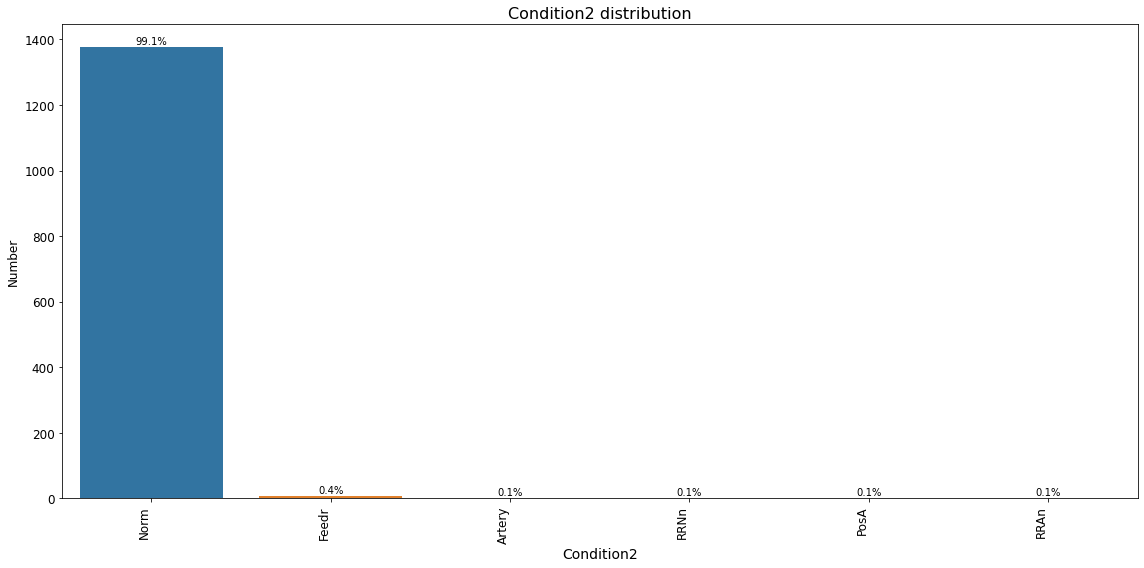

Distribution of variable BldgType


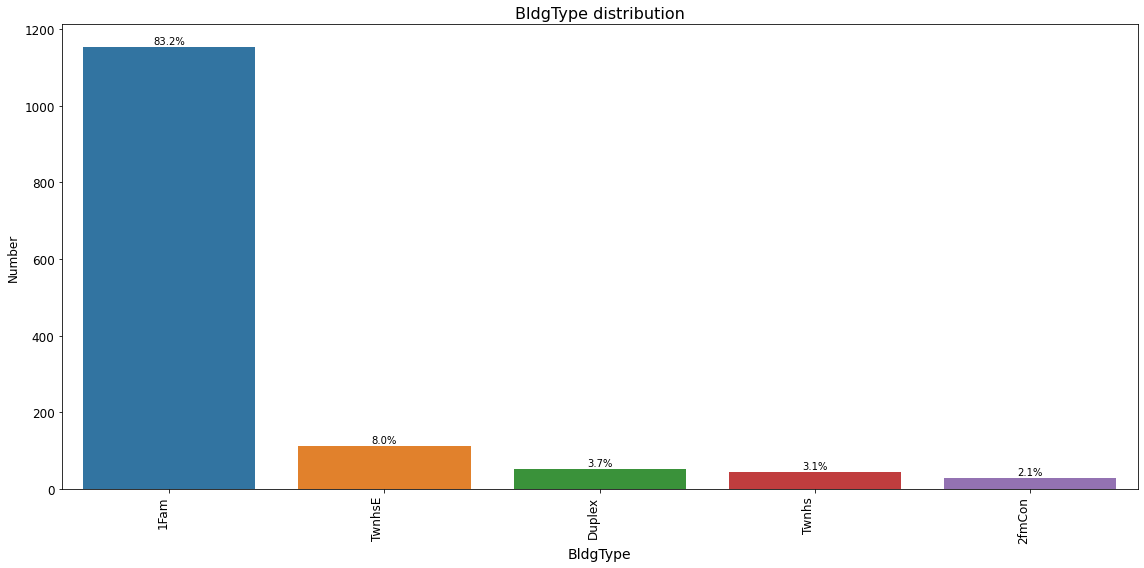

Distribution of variable HouseStyle


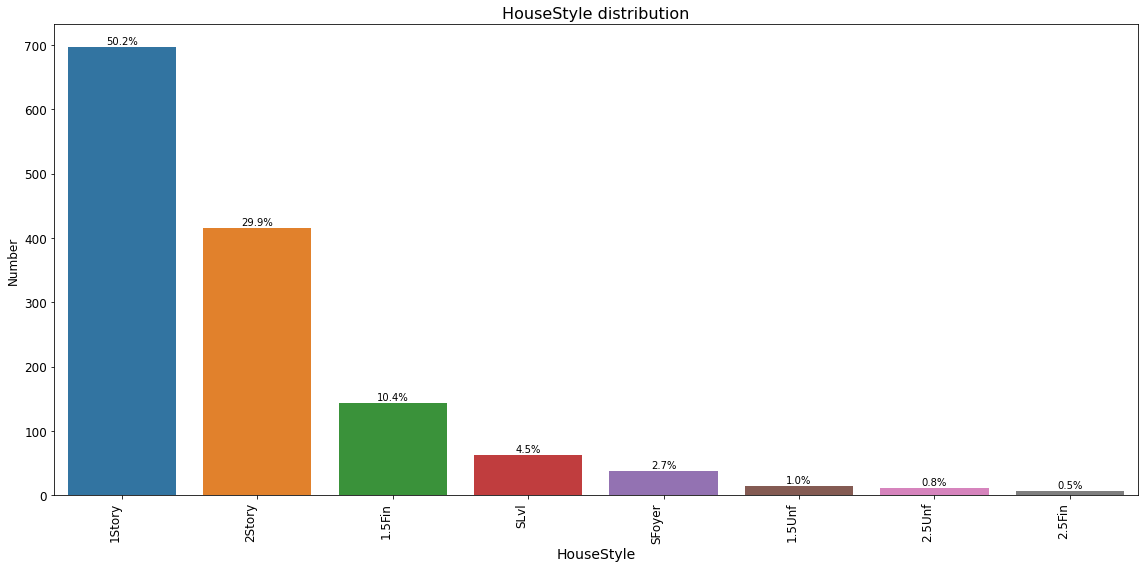

Distribution of variable RoofStyle


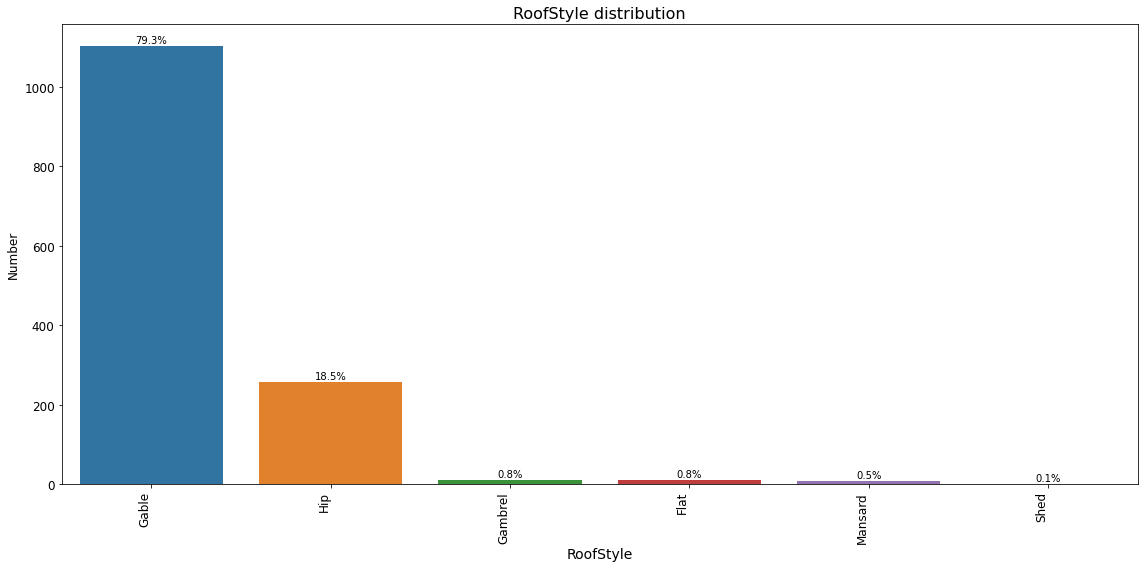

Distribution of variable RoofMatl


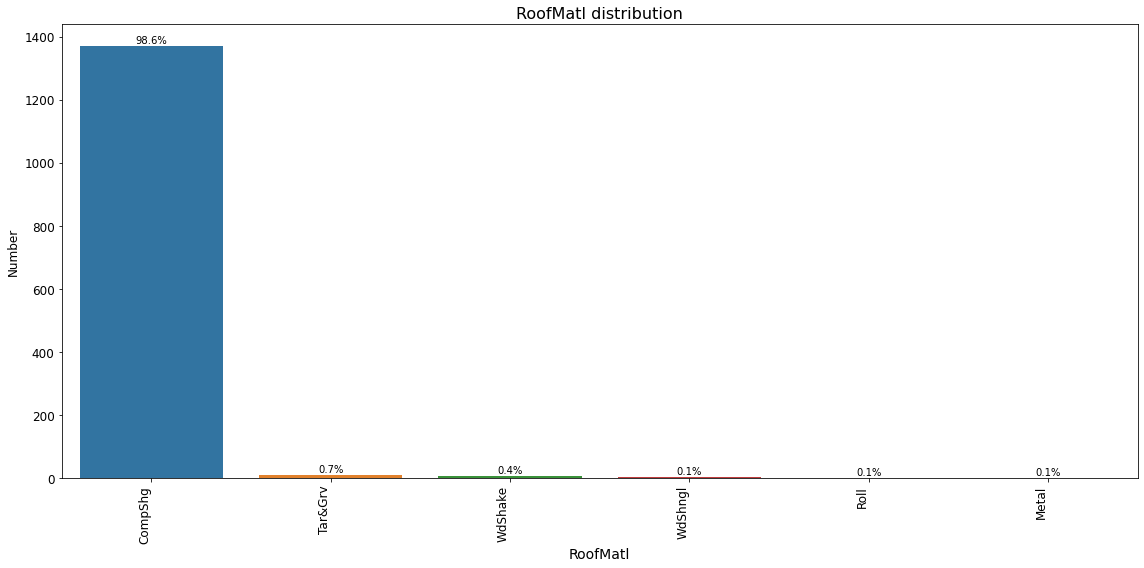

Distribution of variable Exterior1st


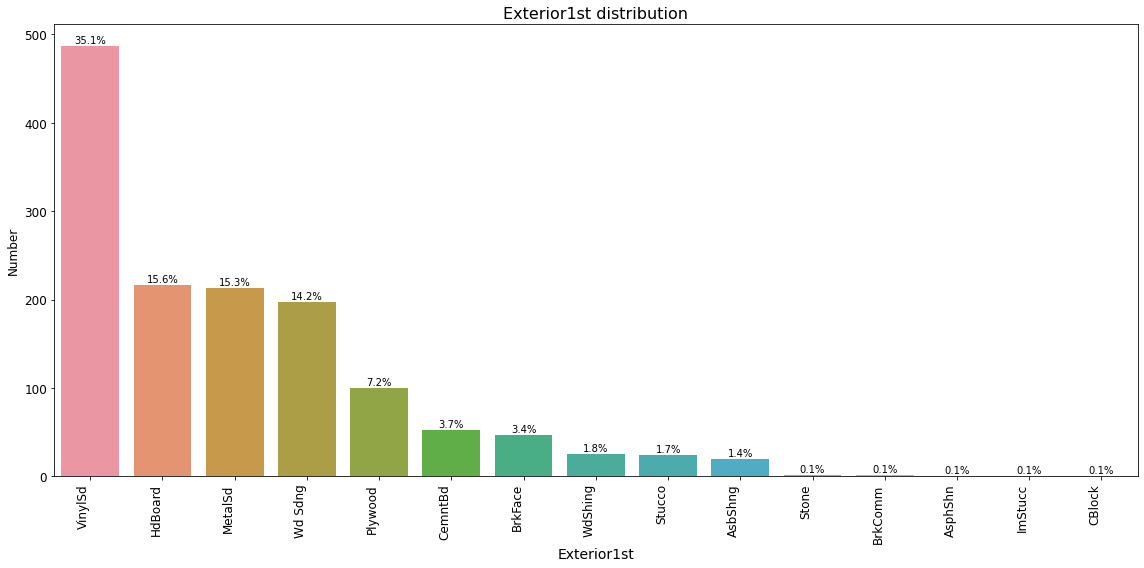

Distribution of variable Exterior2nd


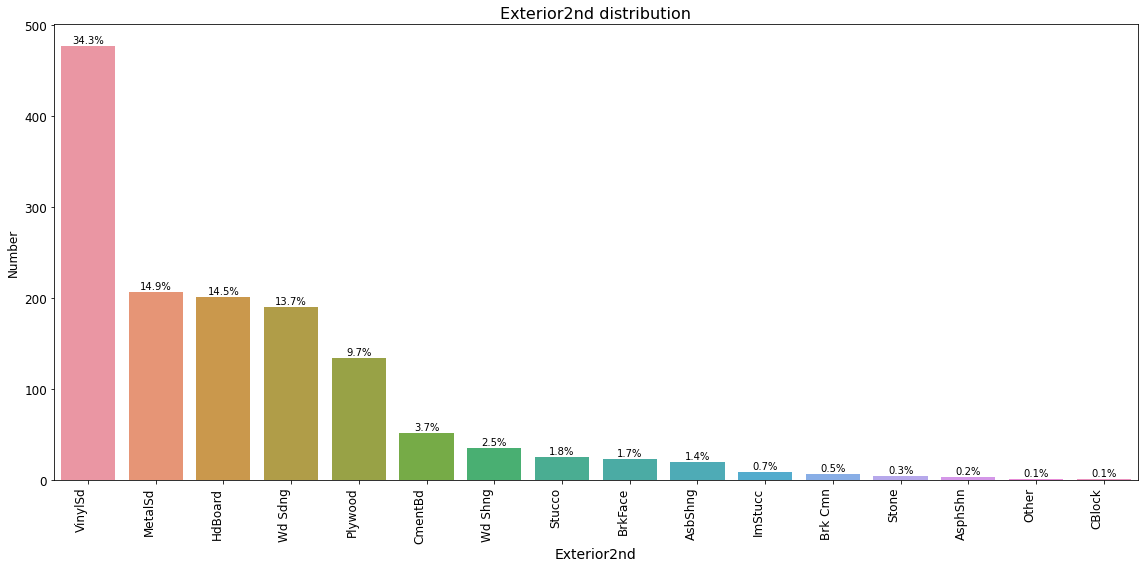

Distribution of variable MasVnrType


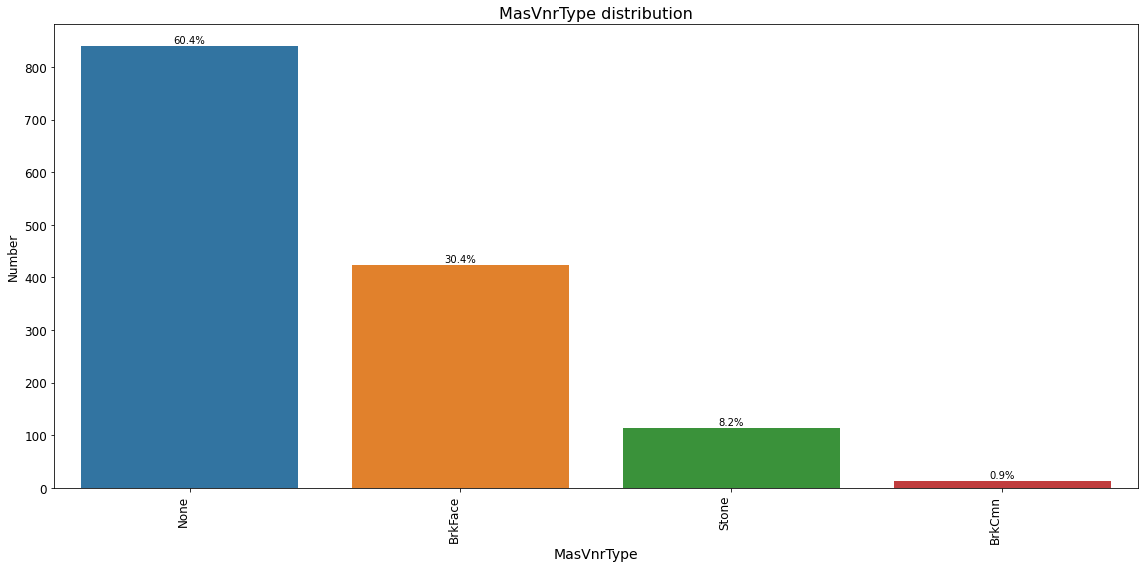

Distribution of variable ExterQual


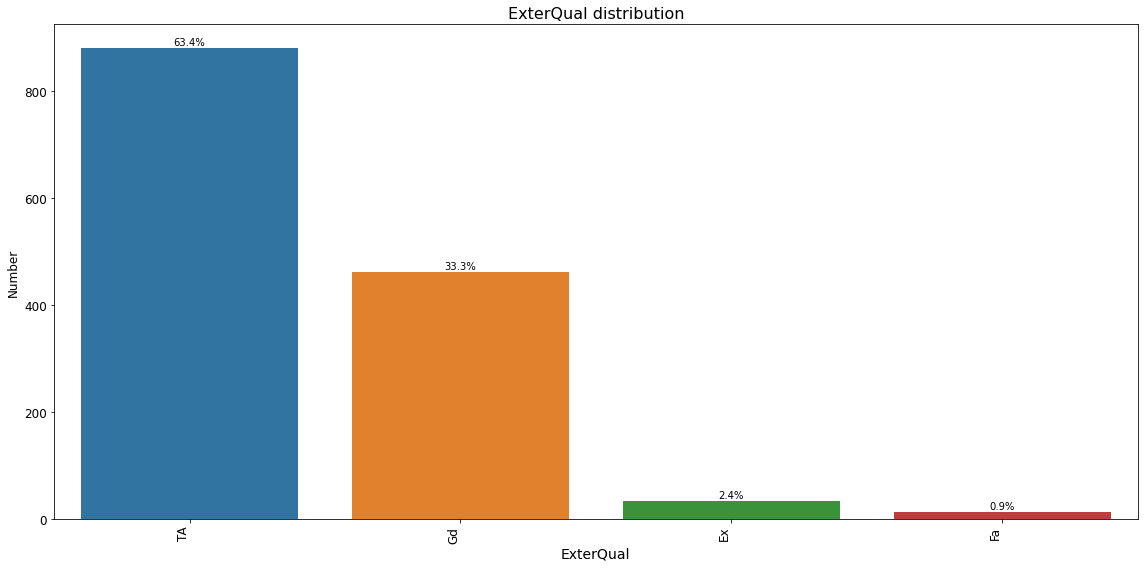

Distribution of variable ExterCond


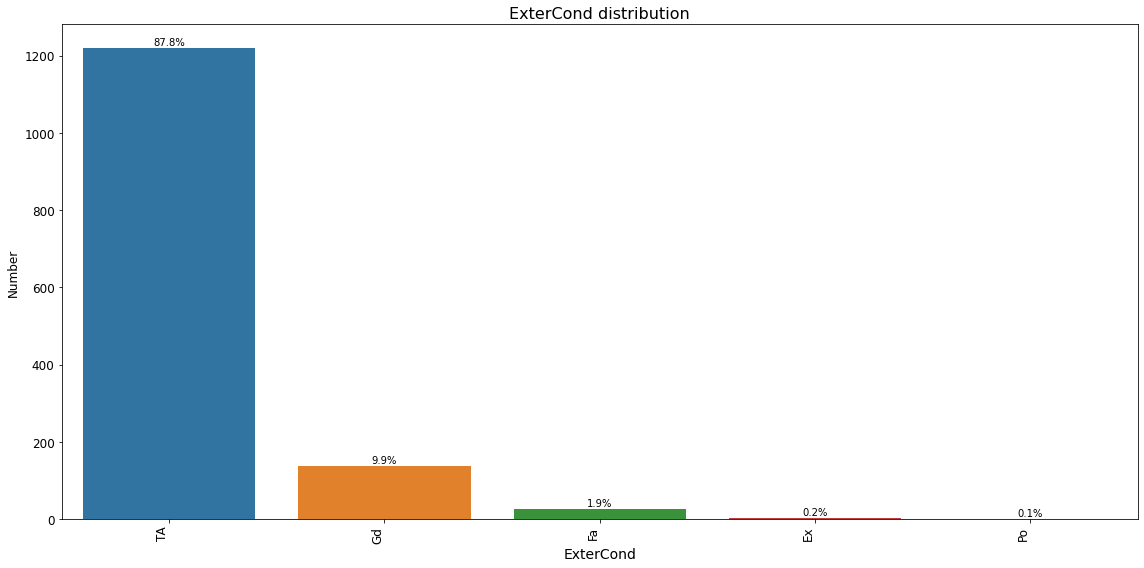

Distribution of variable Foundation


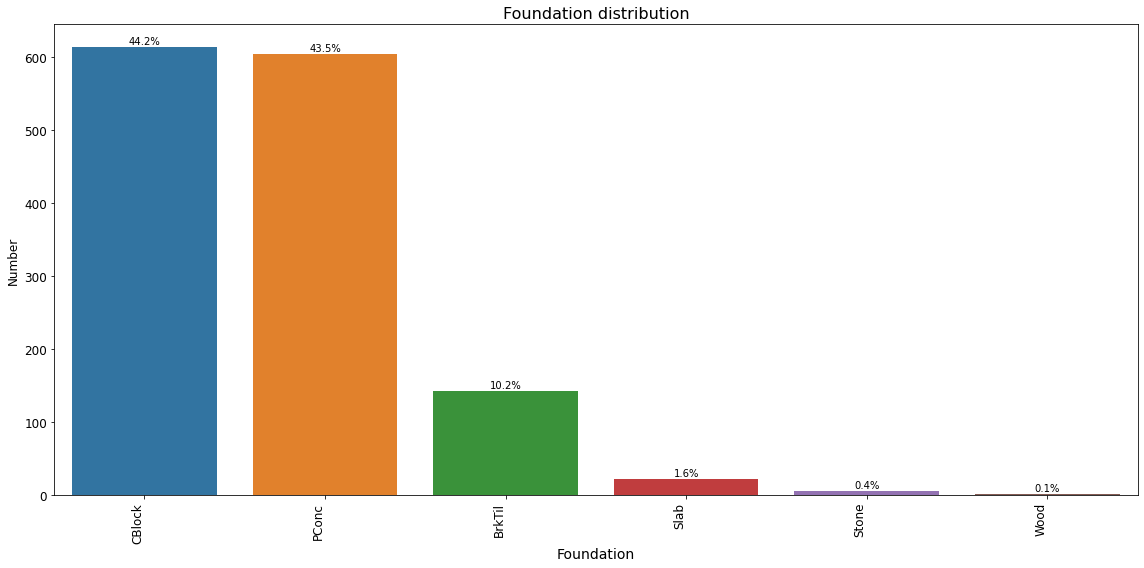

Distribution of variable BsmtQual


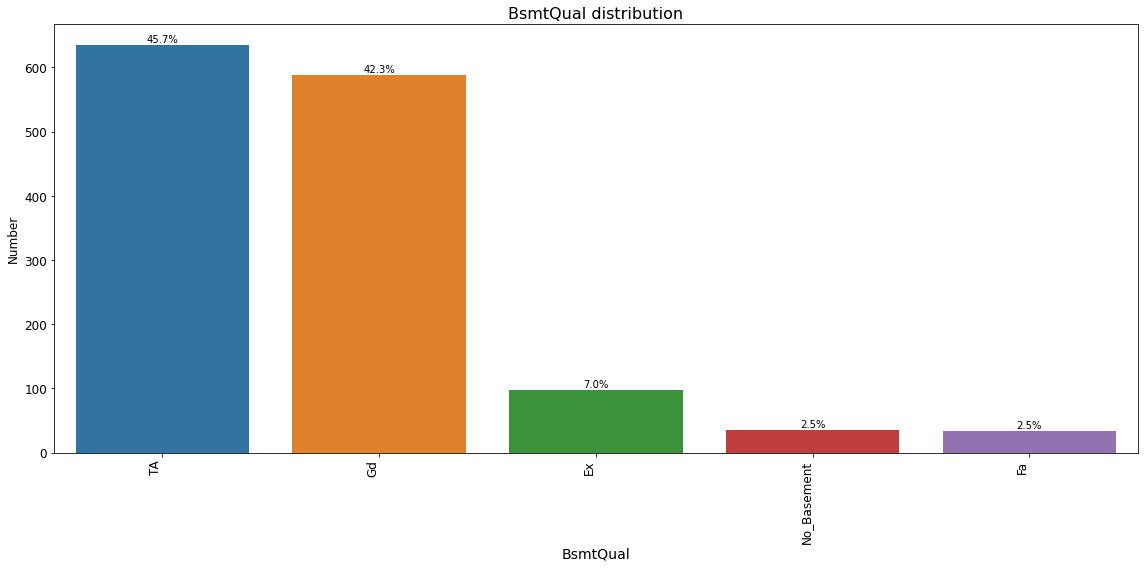

Distribution of variable BsmtCond


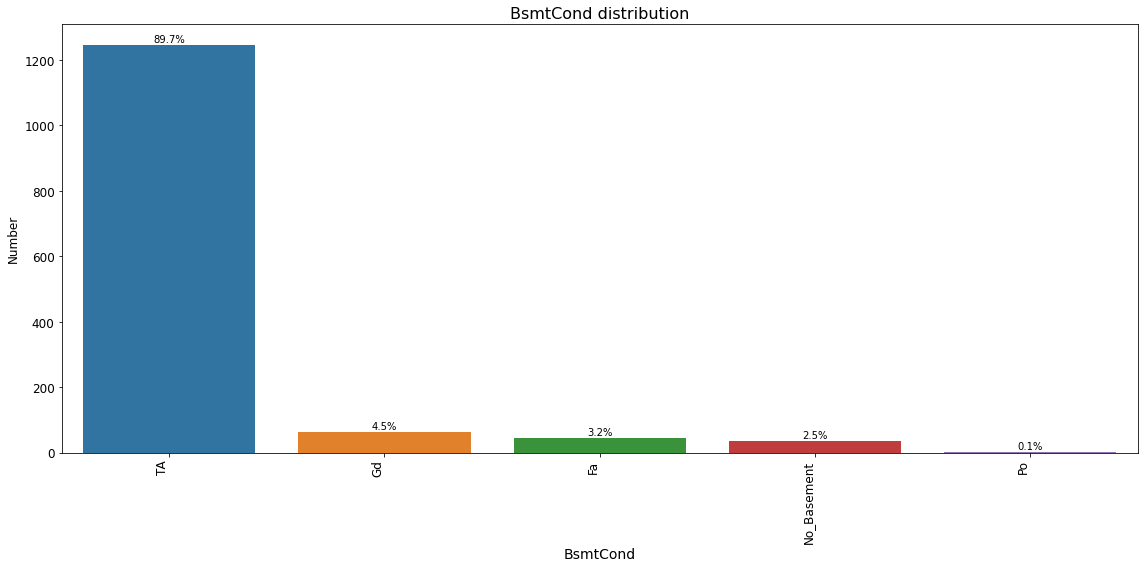

Distribution of variable BsmtExposure


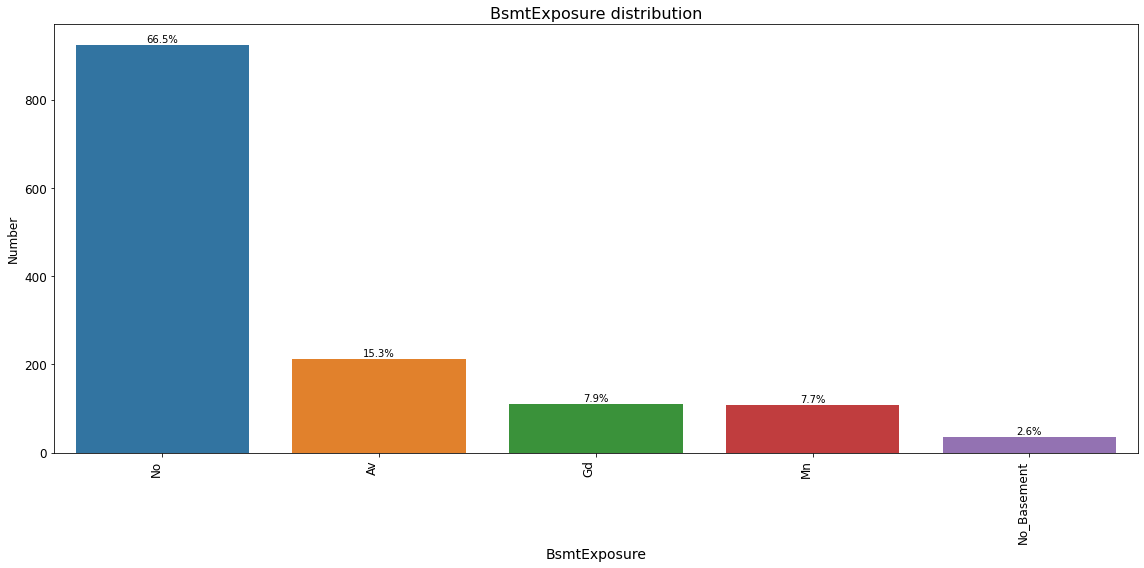

Distribution of variable BsmtFinType1


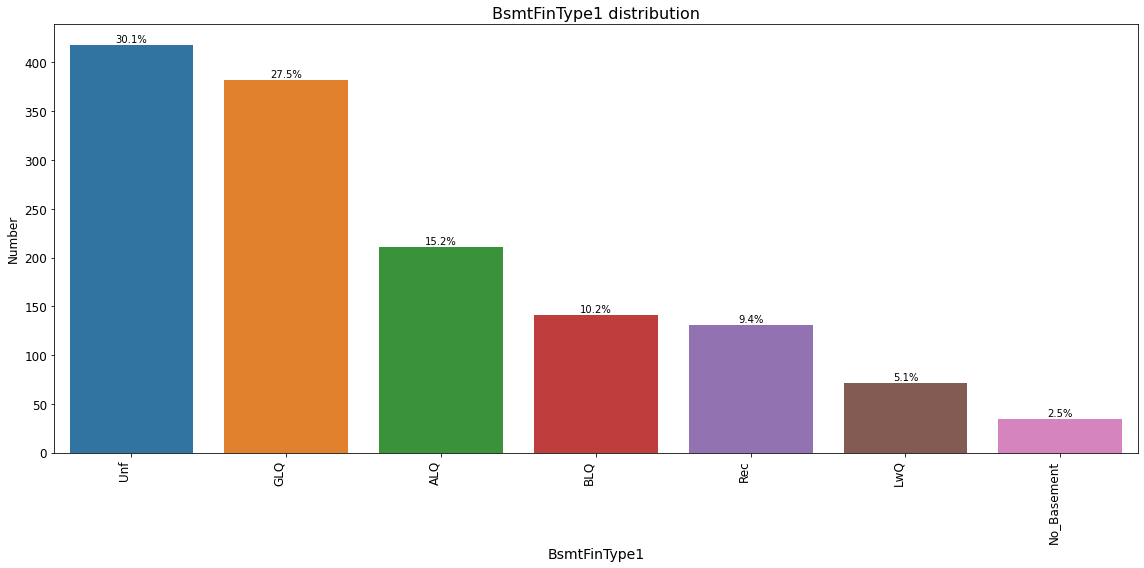

Distribution of variable BsmtFinType2


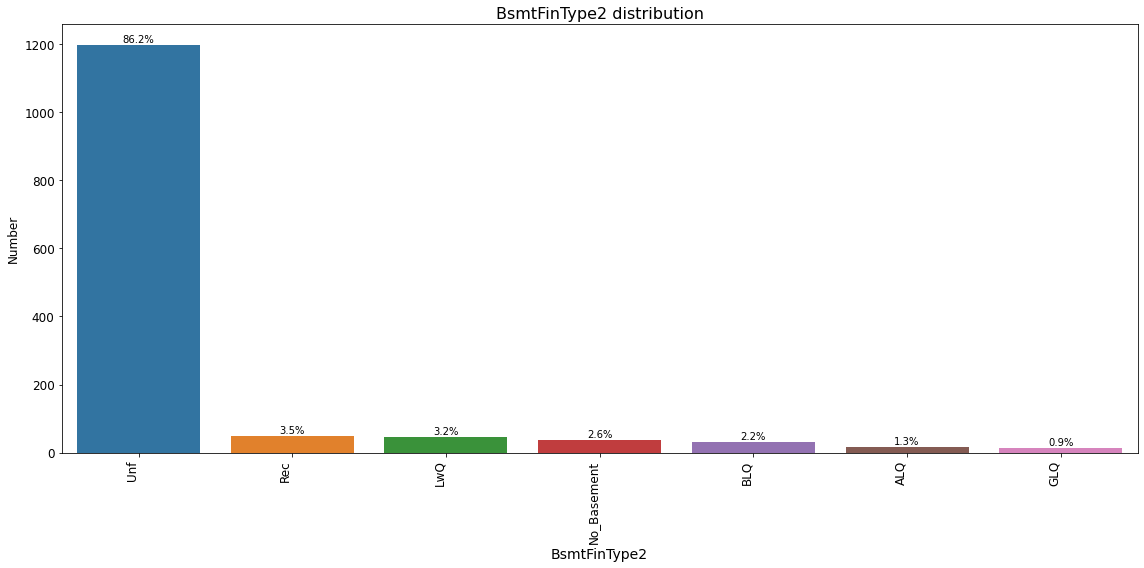

Distribution of variable Heating


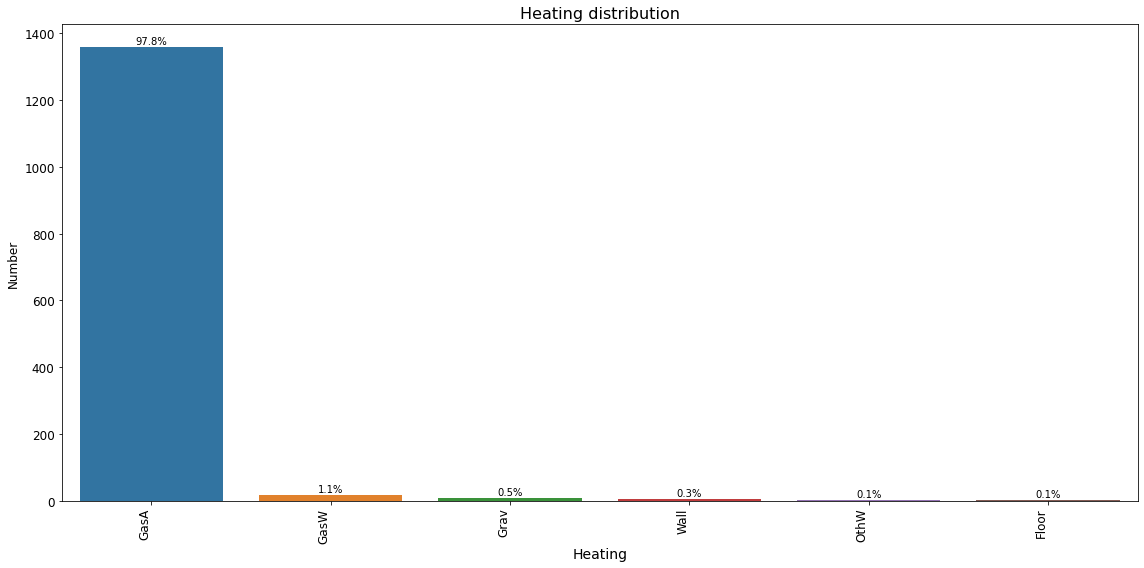

Distribution of variable HeatingQC


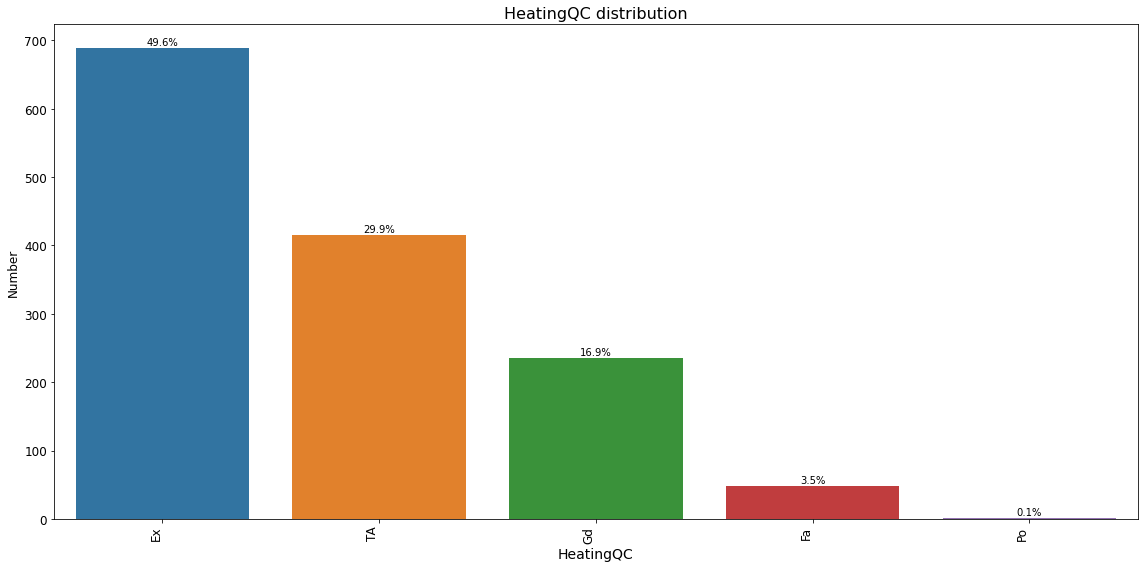

Distribution of variable CentralAir


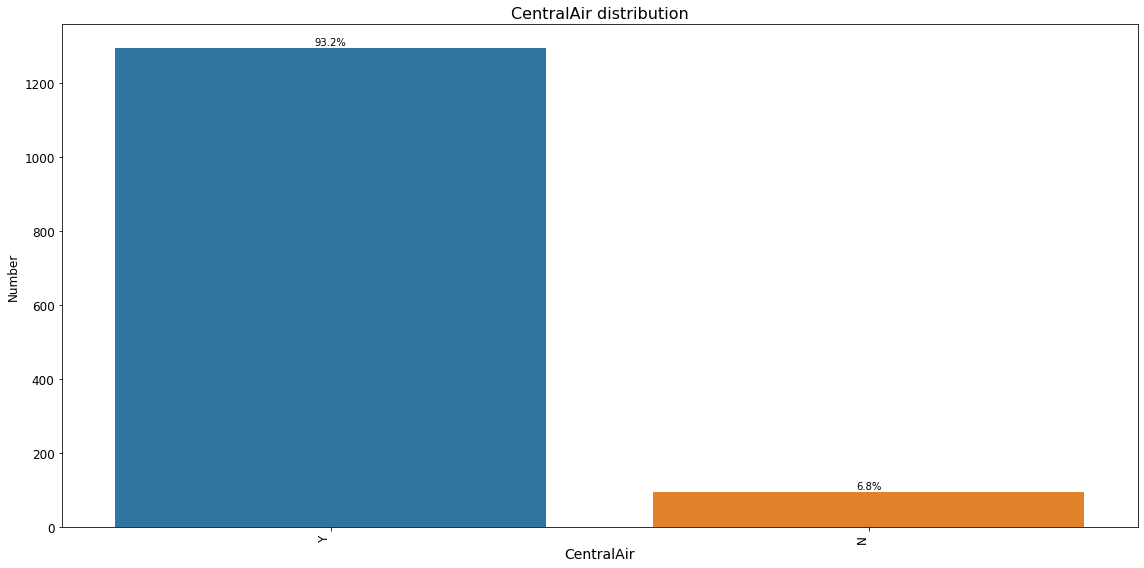

Distribution of variable Electrical


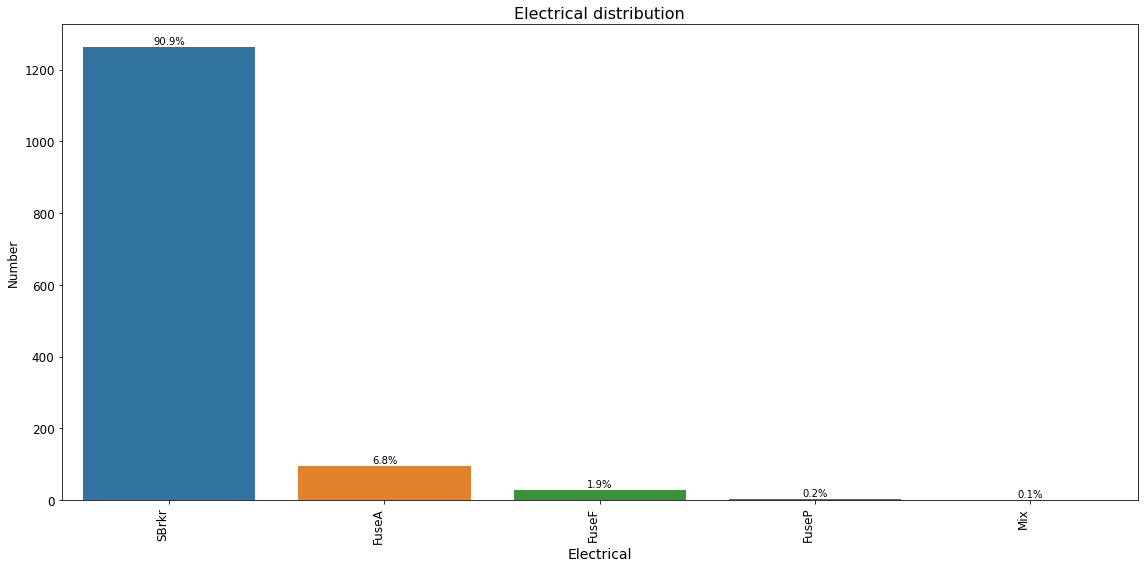

Distribution of variable KitchenQual


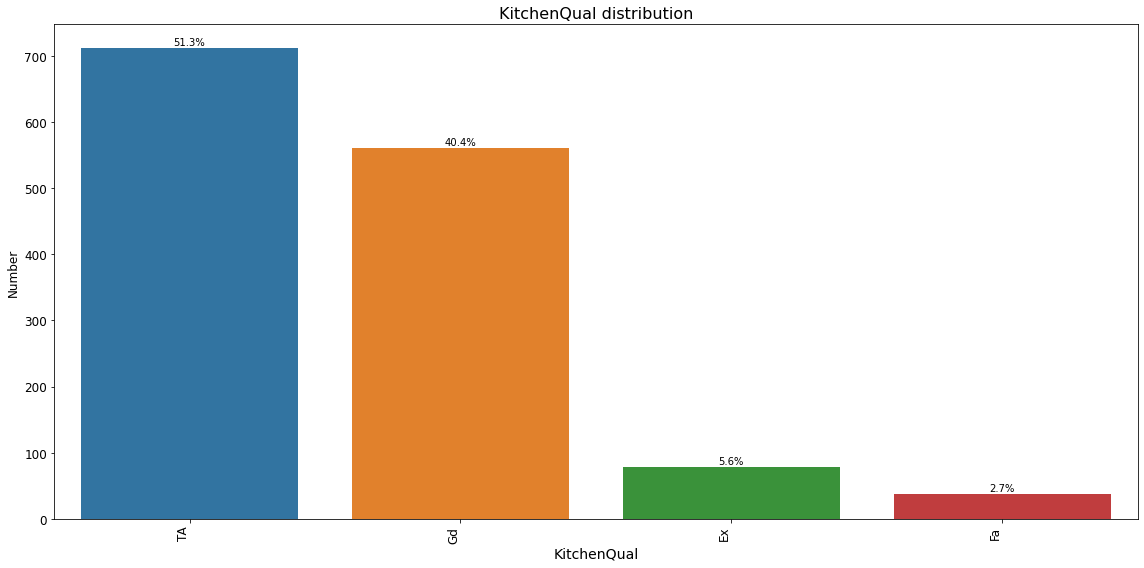

Distribution of variable Functional


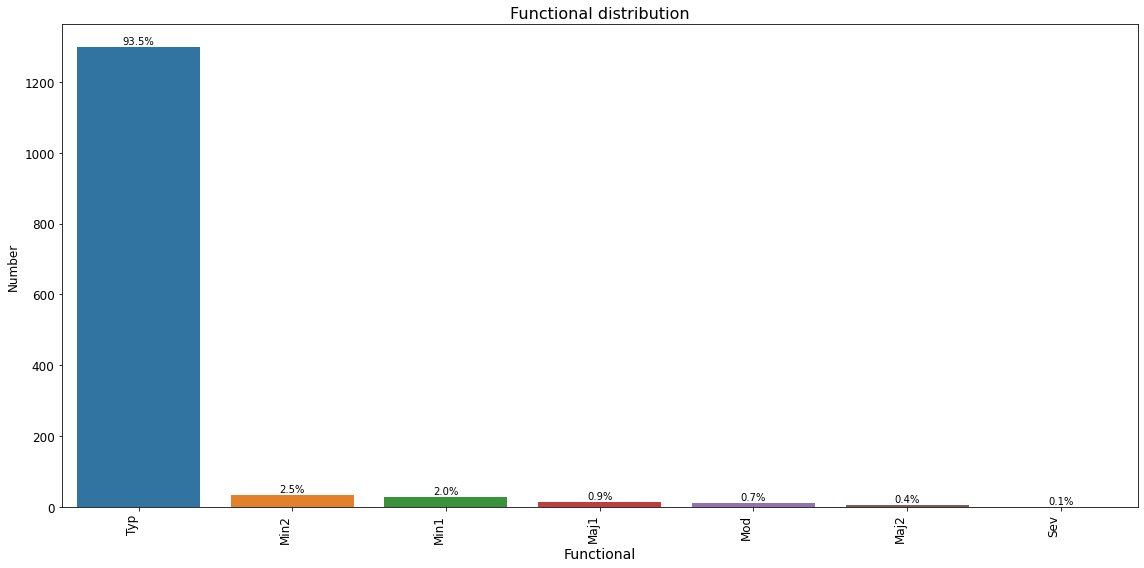

Distribution of variable FireplaceQu


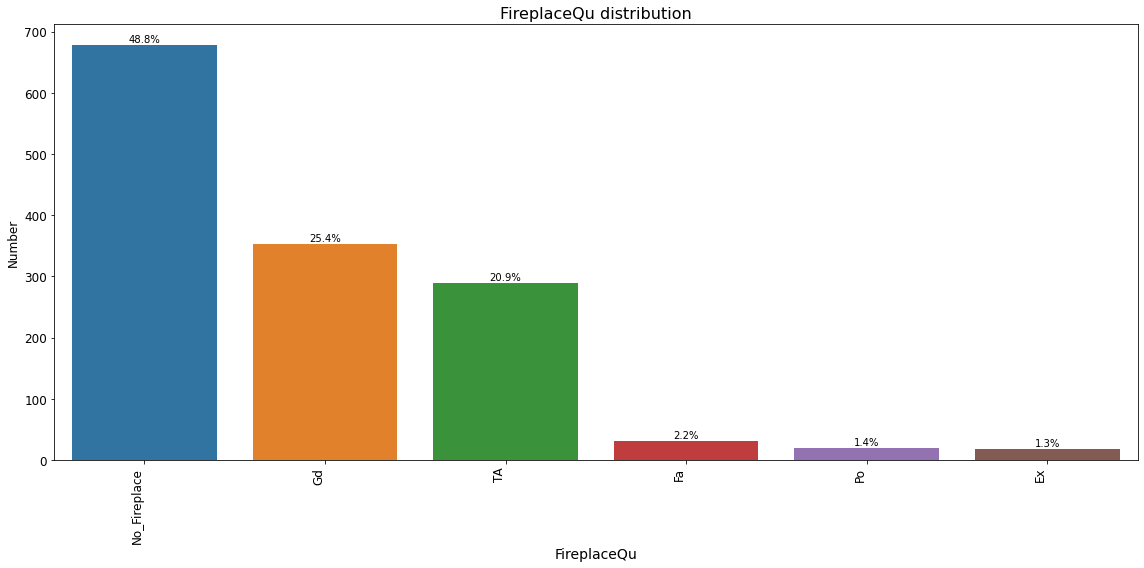

Distribution of variable GarageType


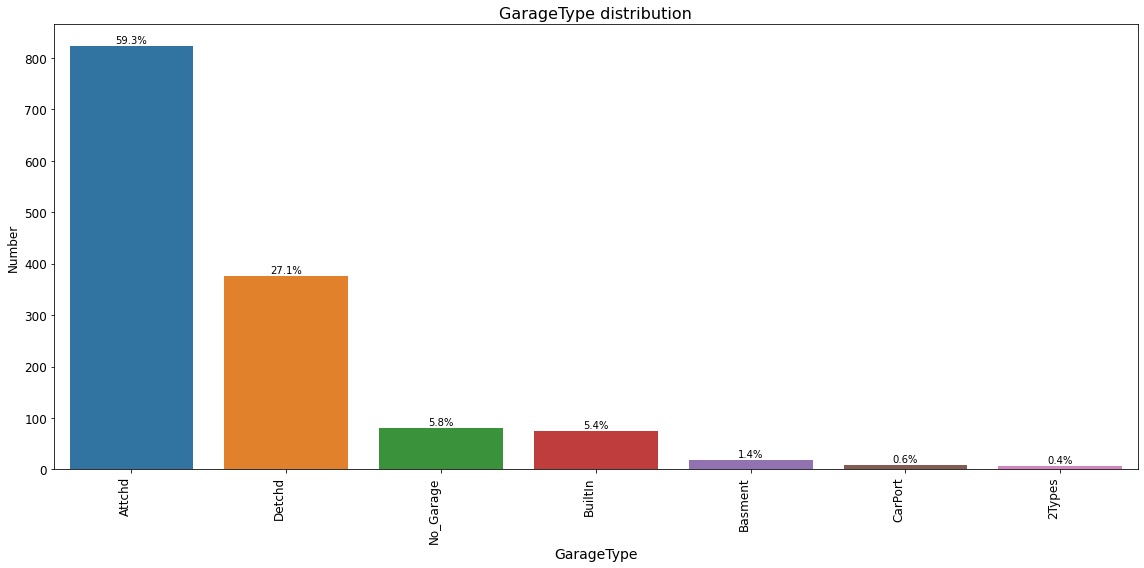

Distribution of variable GarageFinish


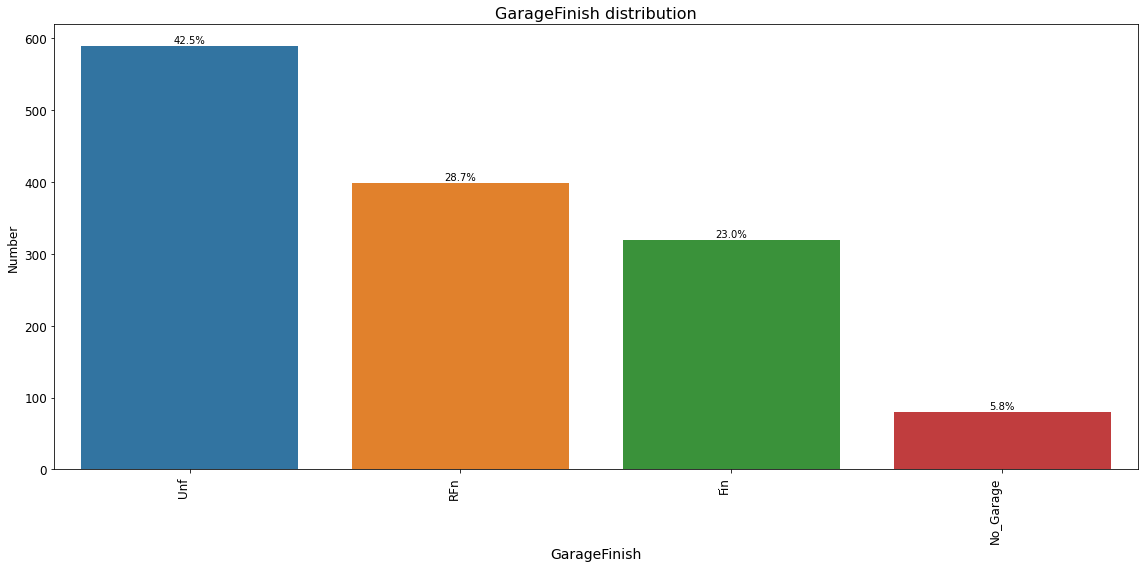

Distribution of variable GarageQual


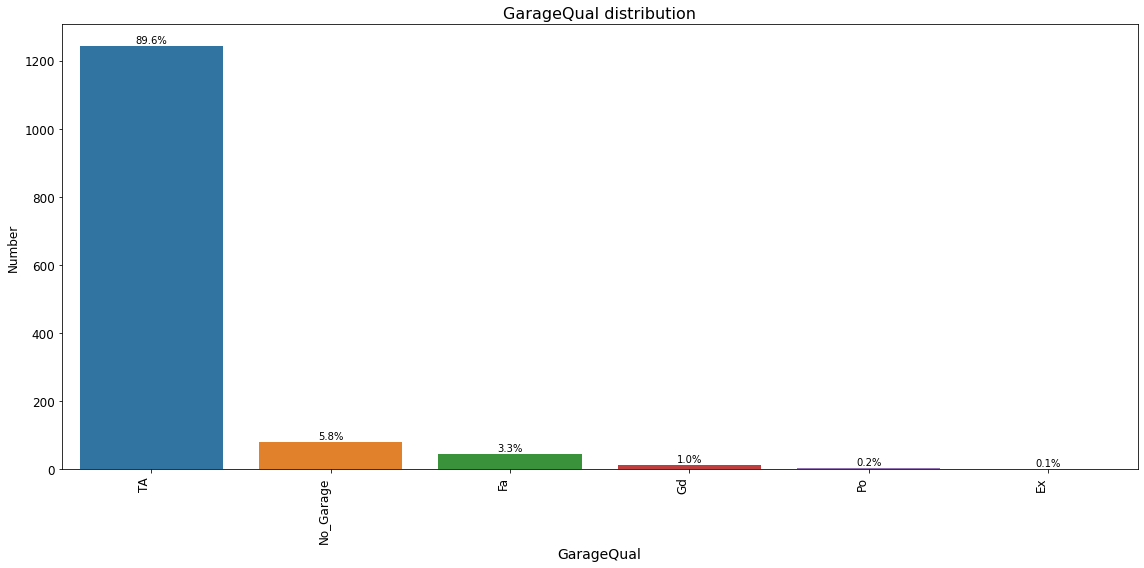

Distribution of variable GarageCond


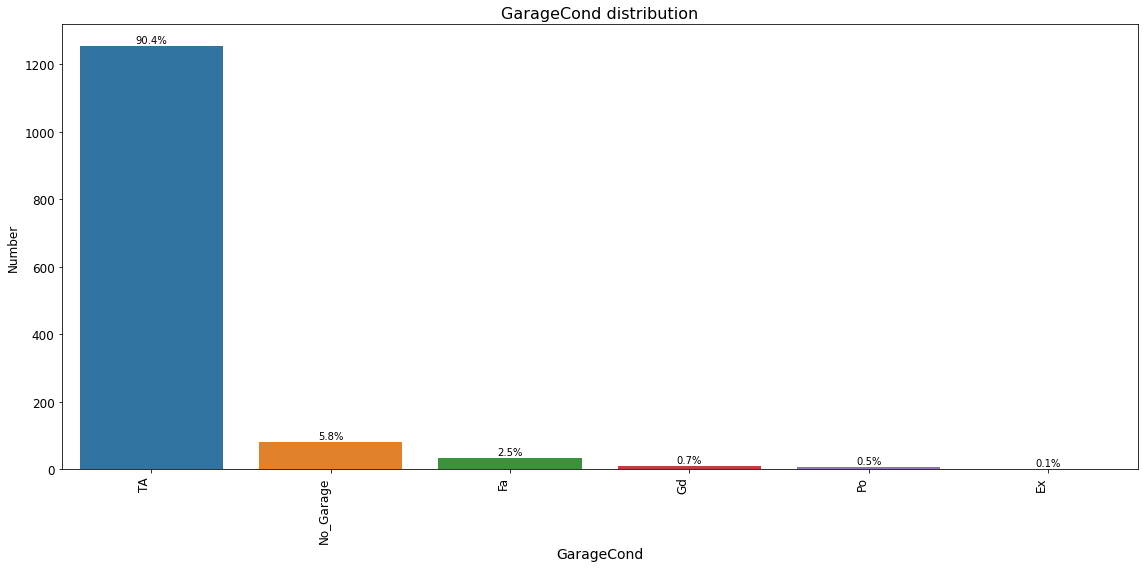

Distribution of variable PavedDrive


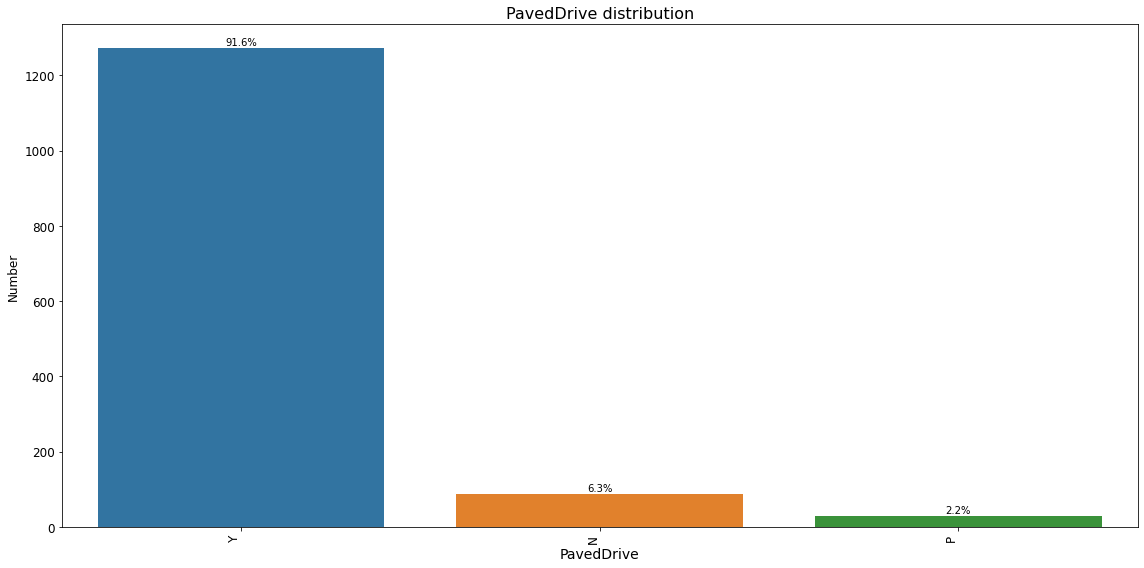

Distribution of variable PoolQC


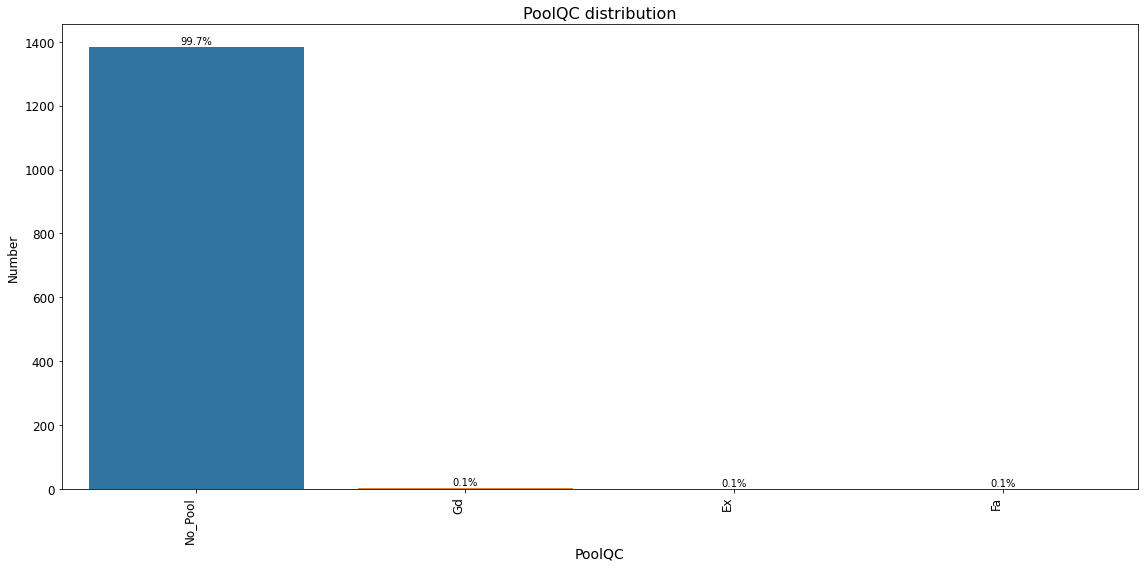

Distribution of variable Fence


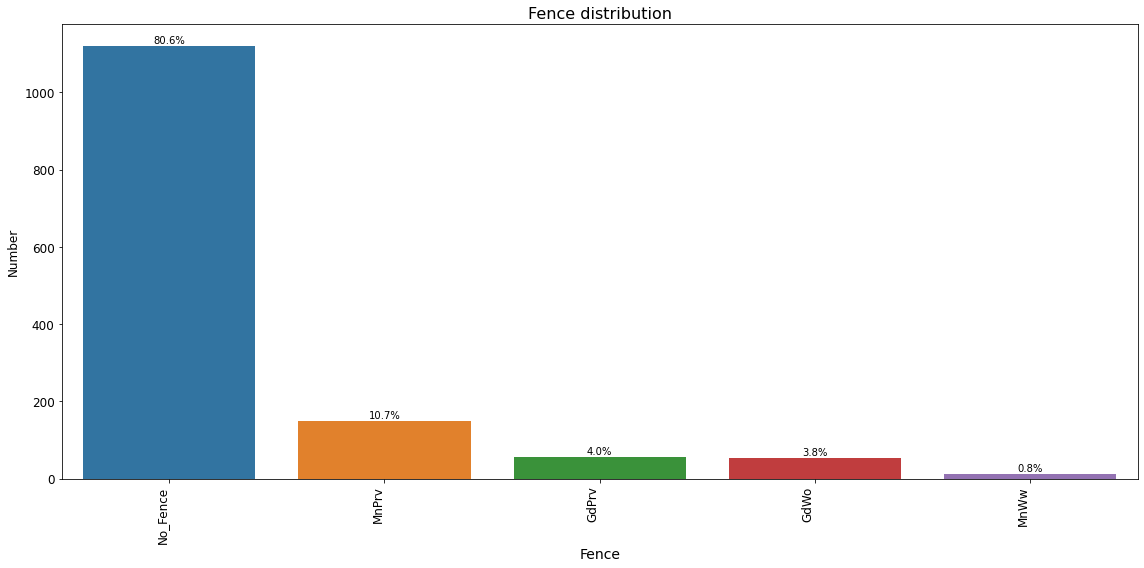

Distribution of variable MiscFeature


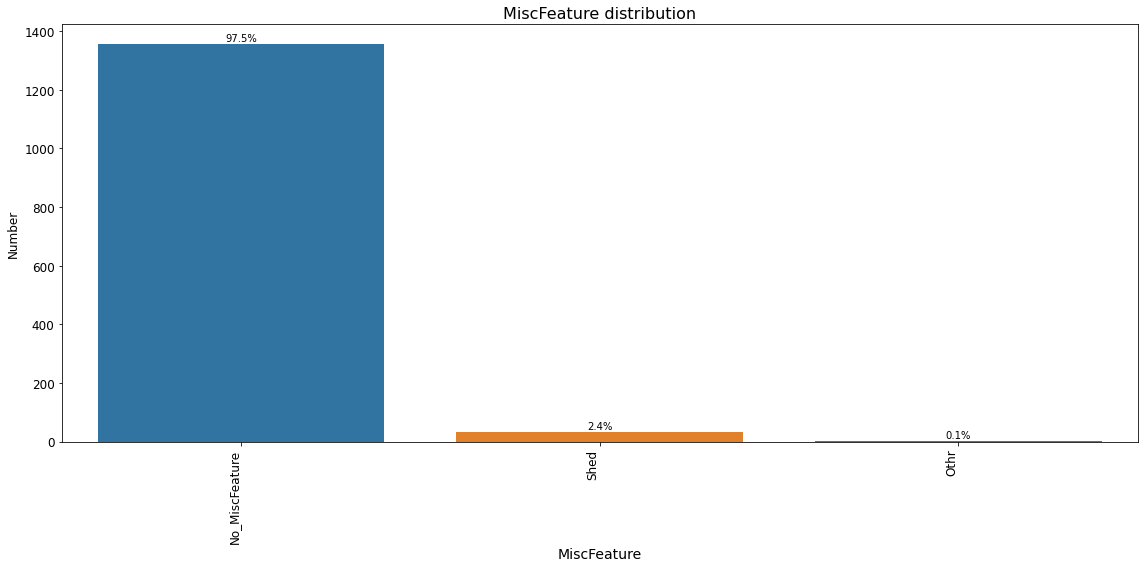

Distribution of variable SaleType


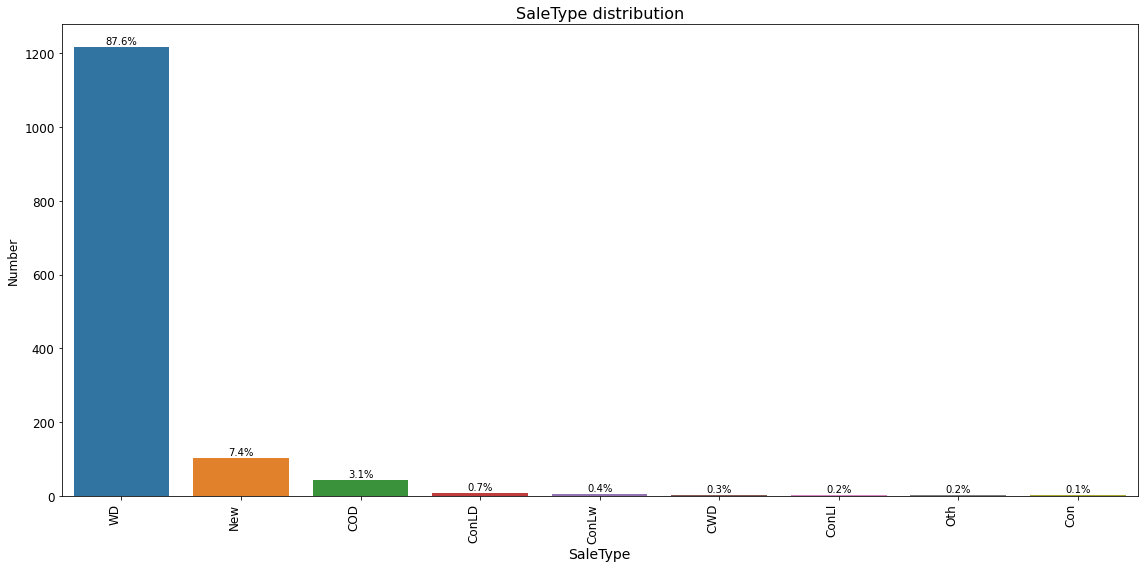

Distribution of variable SaleCondition


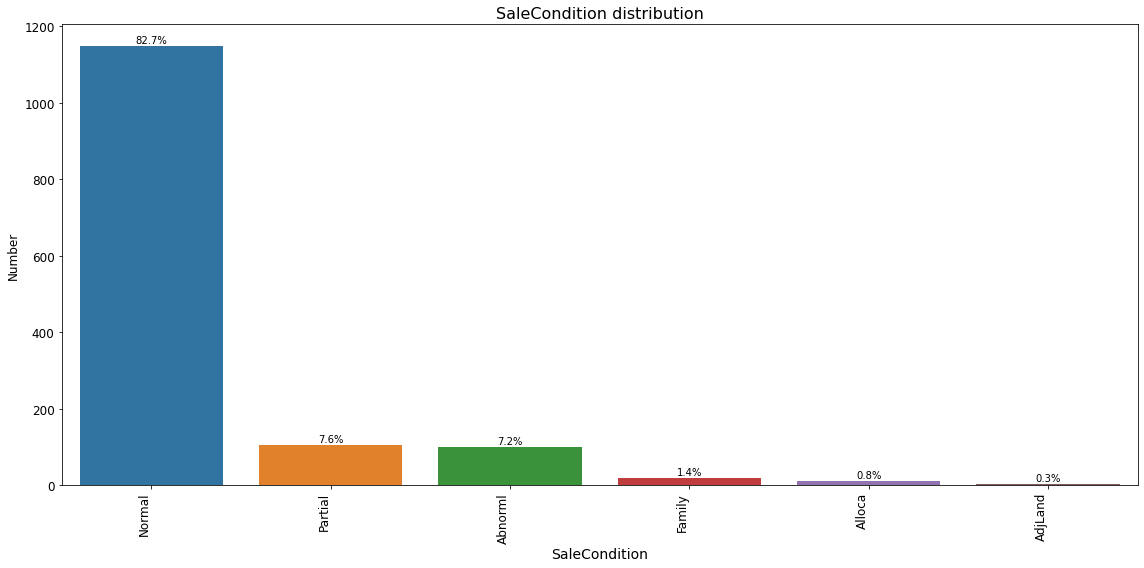

In [372]:
# plot count plot for the categorical variables
for i in df_Categorical_variables:
    if i in df:
        print('Distribution of variable', i)
        univariate_cate(df,i)

### INSIGHT: 
#### 1. We found out that most of the houses in our dataset belonged RL MS zoning(residential lowdensity).
#### 2. 99.6% houses have paved road access .
#### 3. 93.9% houses have no alley access
#### 4. Most of the properties have regular shape lot followed by slightly irregular shape.
#### 5. 90.3% of the properties have leveled land contour.
#### 6. 99.6 % properties have all public utilities(electricity, gas, water, septic tank)
#### 7. Most of the properties have inside lot,gentle slope,single family detached building type, 1 story.
#### 8. Most common roofstyle is gable,made from standard composite material.
#### 9. External Quality and external condition is typical/average in most properties and also majority have cinderblock foundation.
#### 10 Majority of basement are in average condition with no exposure, and have unfinished areas.
#### 11. Heating in most cases is GasA(gas forced warm air furnace) and excellent heating quality.
#### 12. Most houses have standard circuit breaks, central air, no fire place, no pool,no fence,typical garage condition , unfinished garagefinish and paved street and sale conditions normal.



## FOR DISCRETE-NUMERIC VARIABLES-

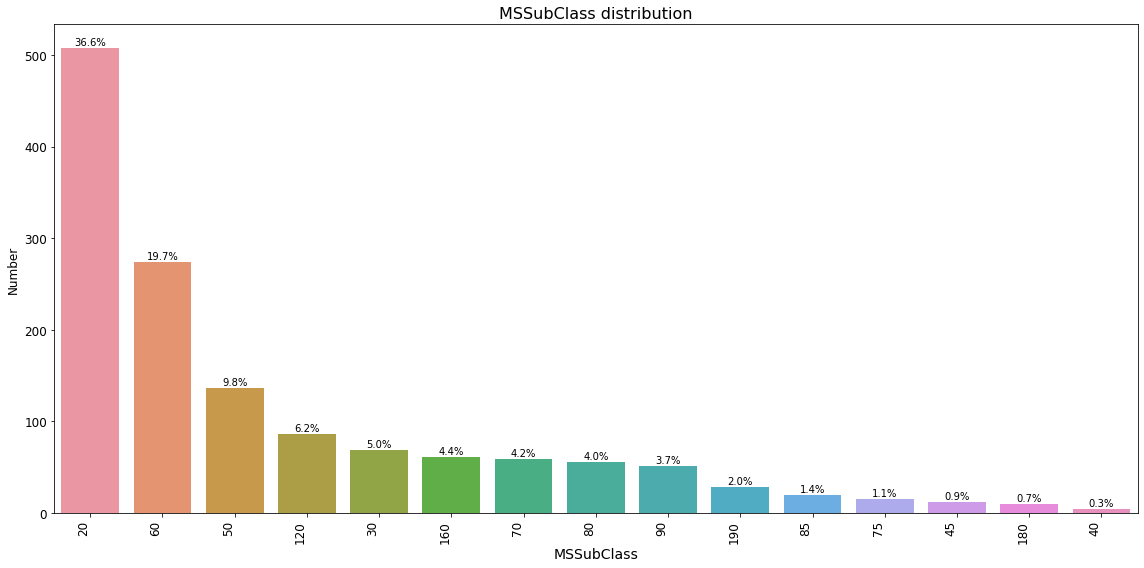

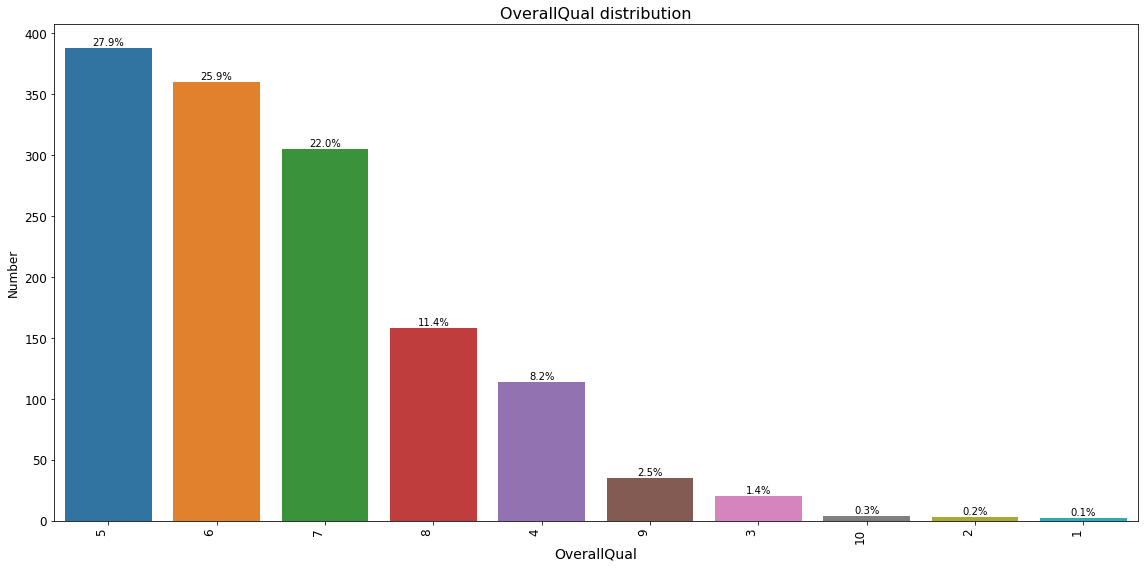

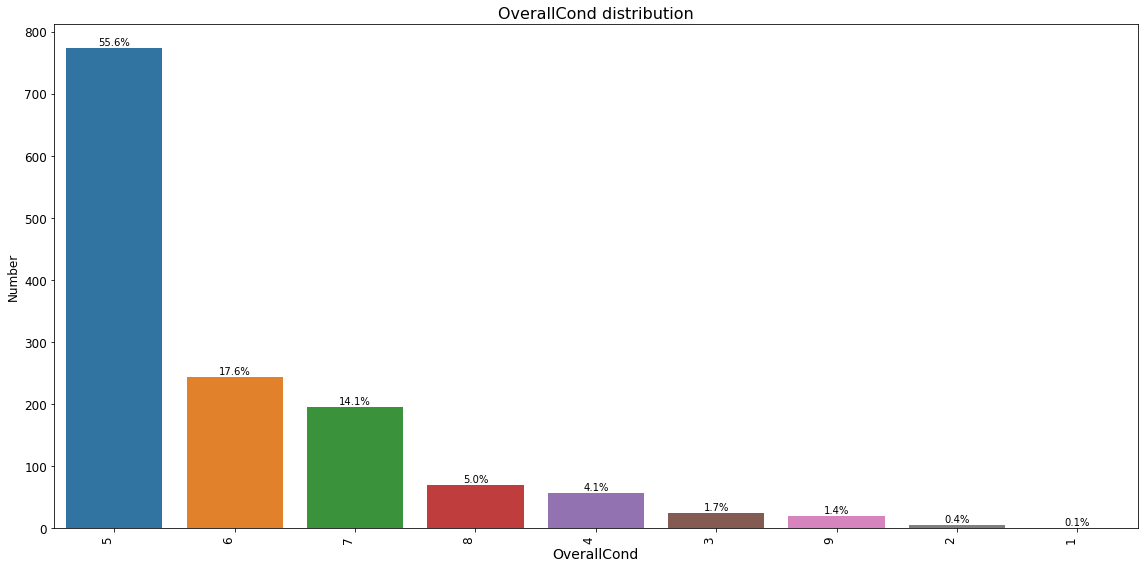

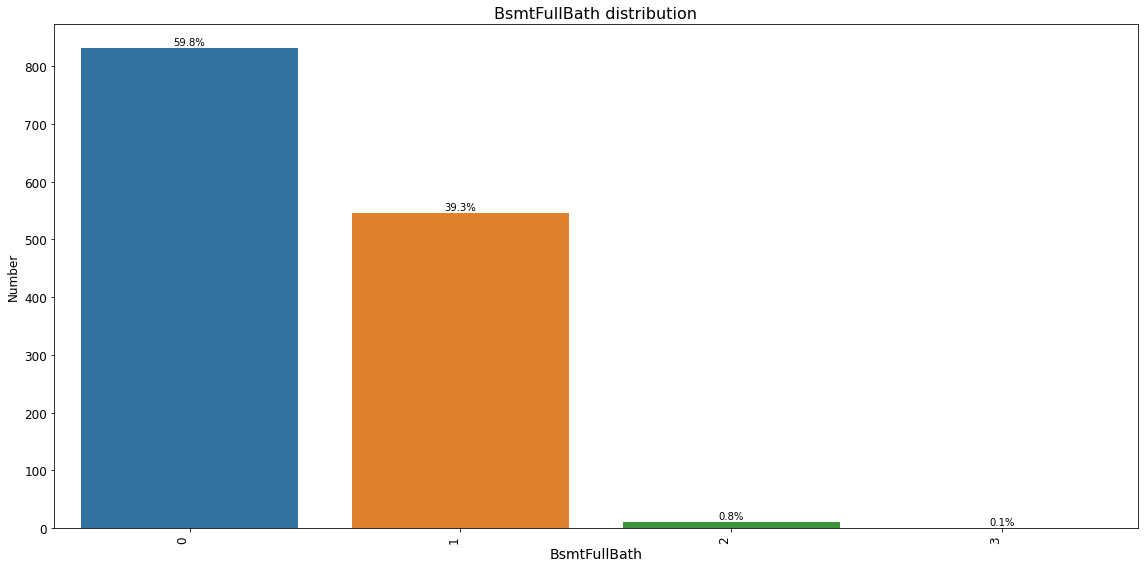

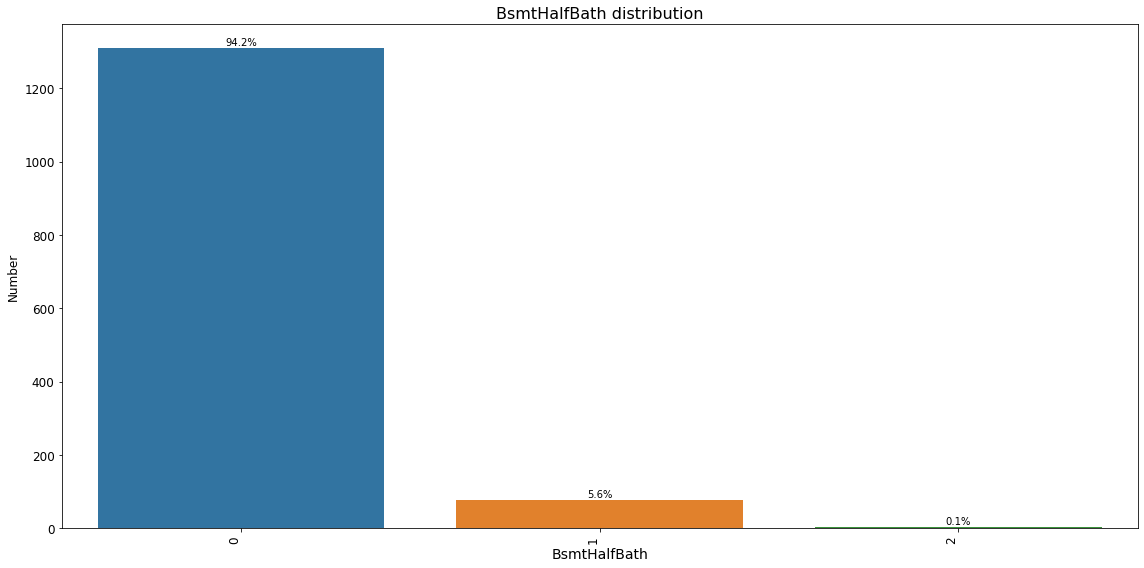

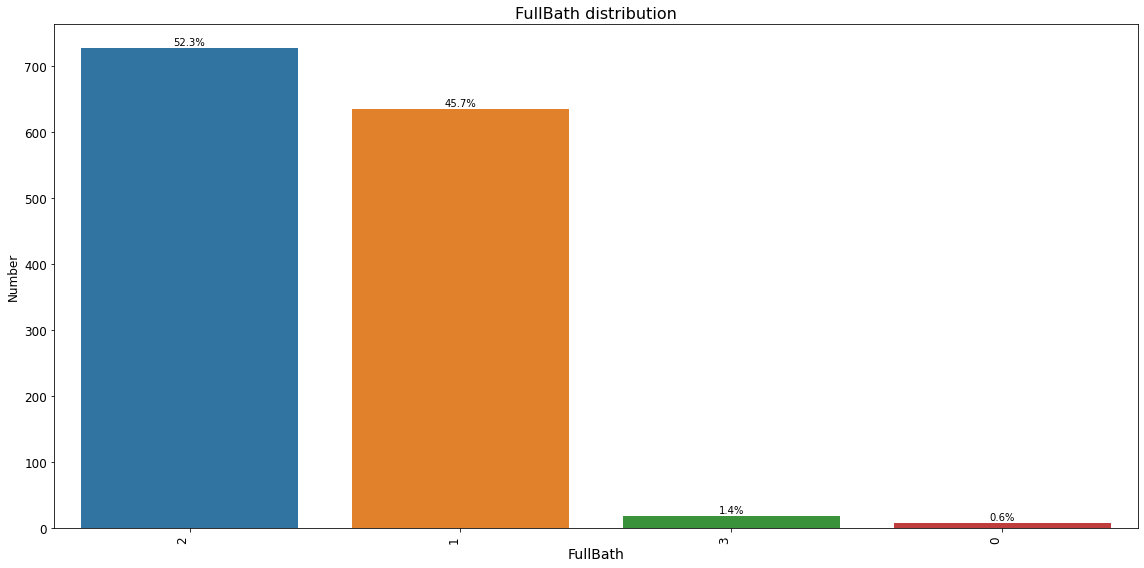

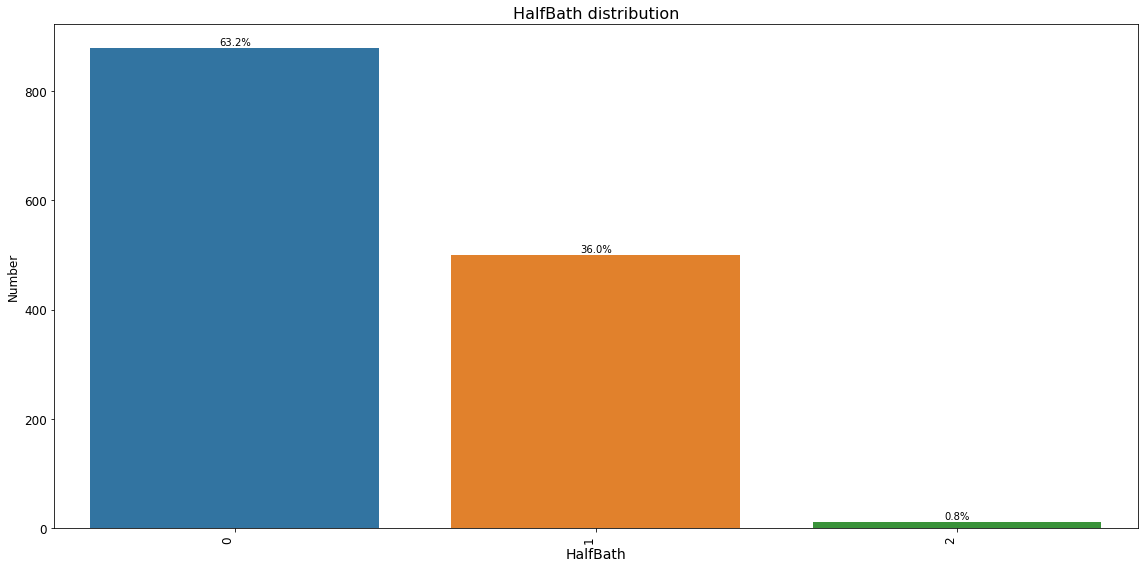

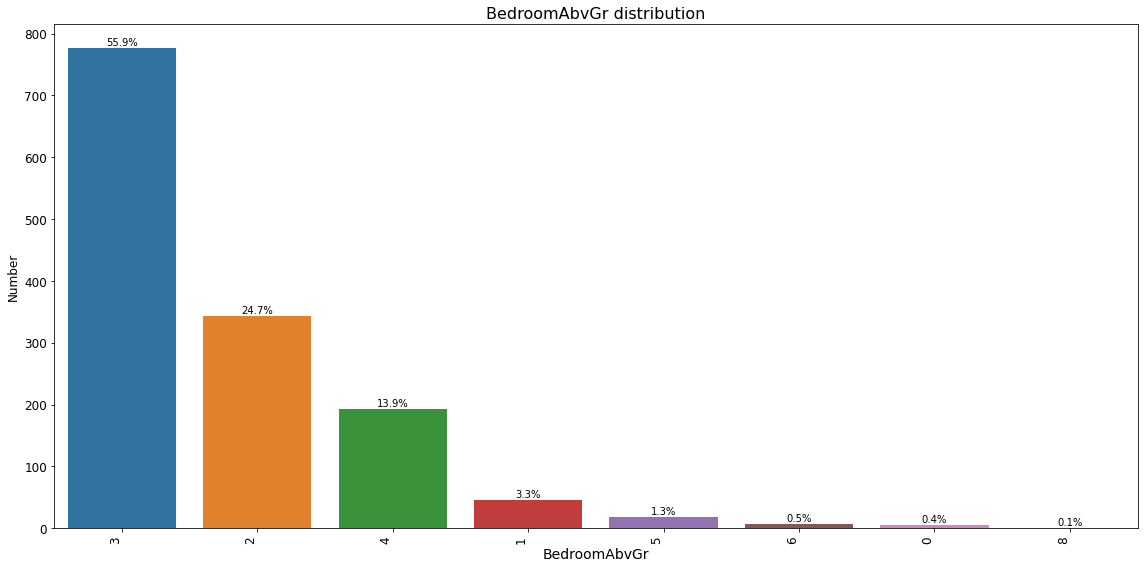

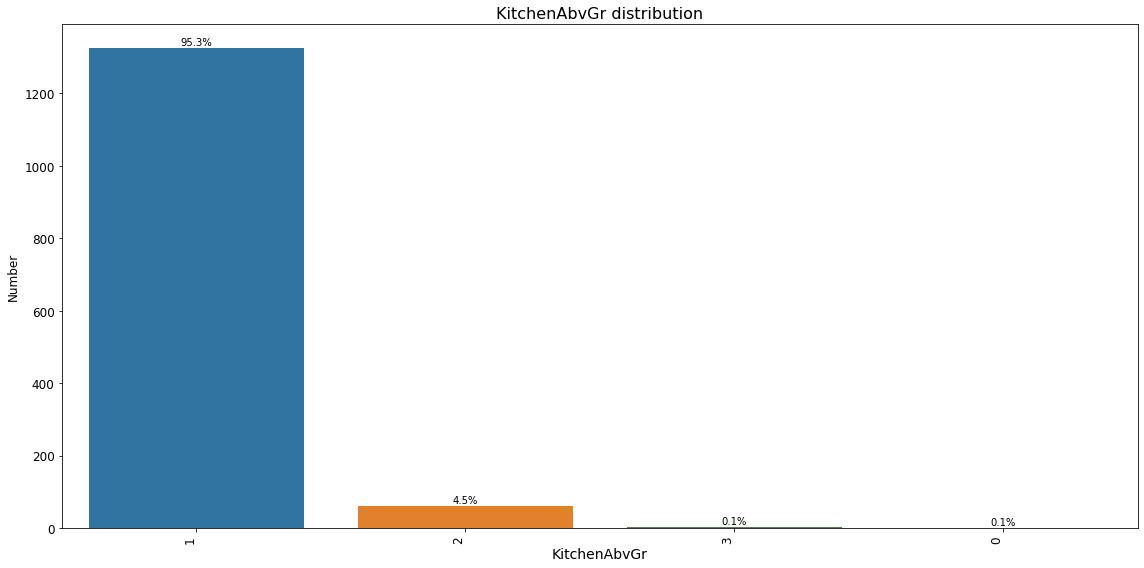

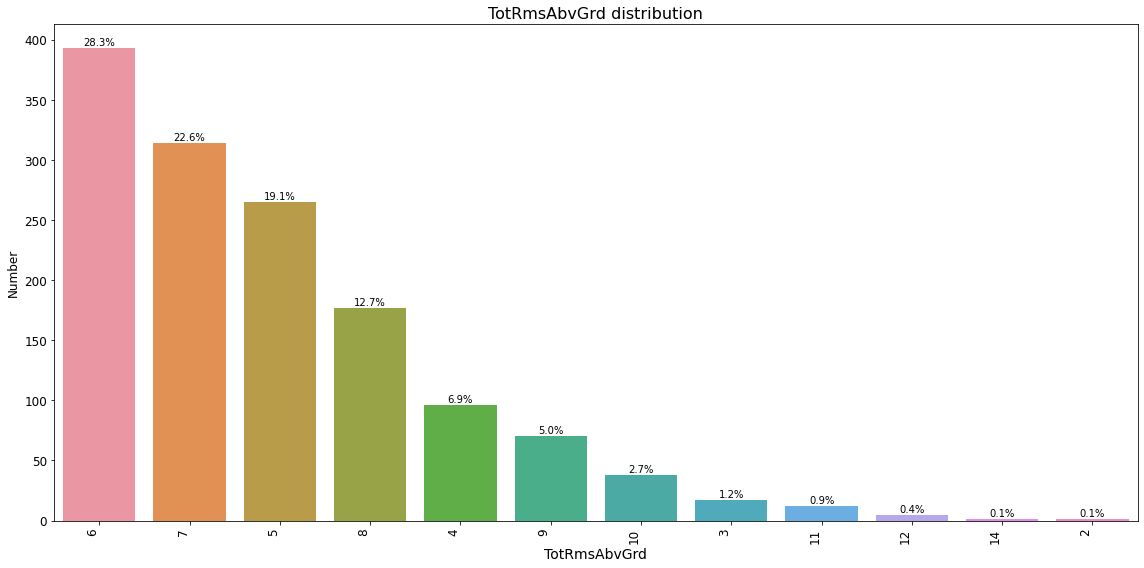

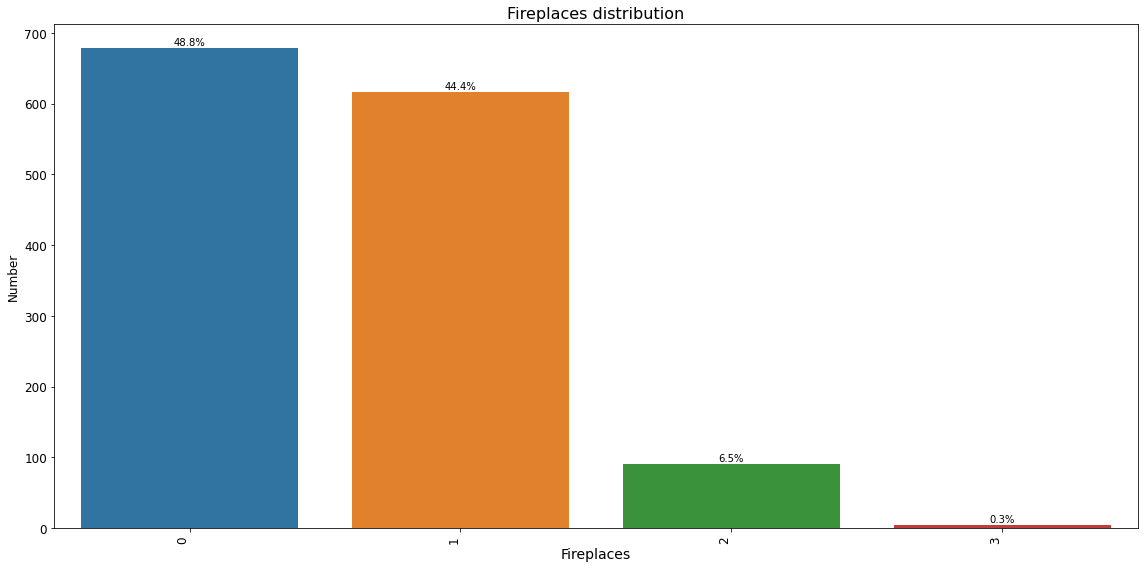

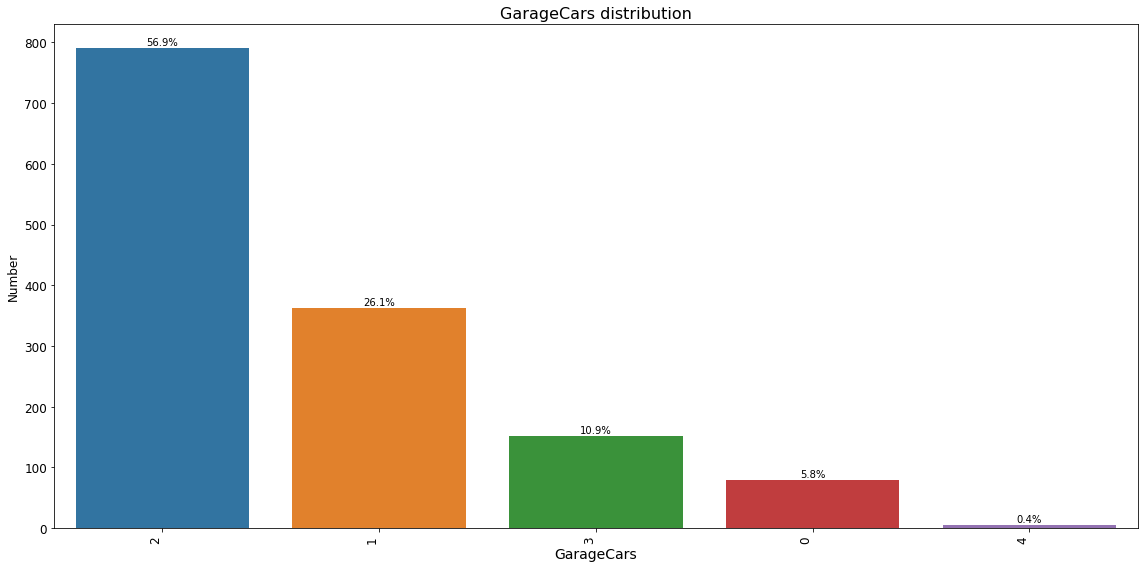

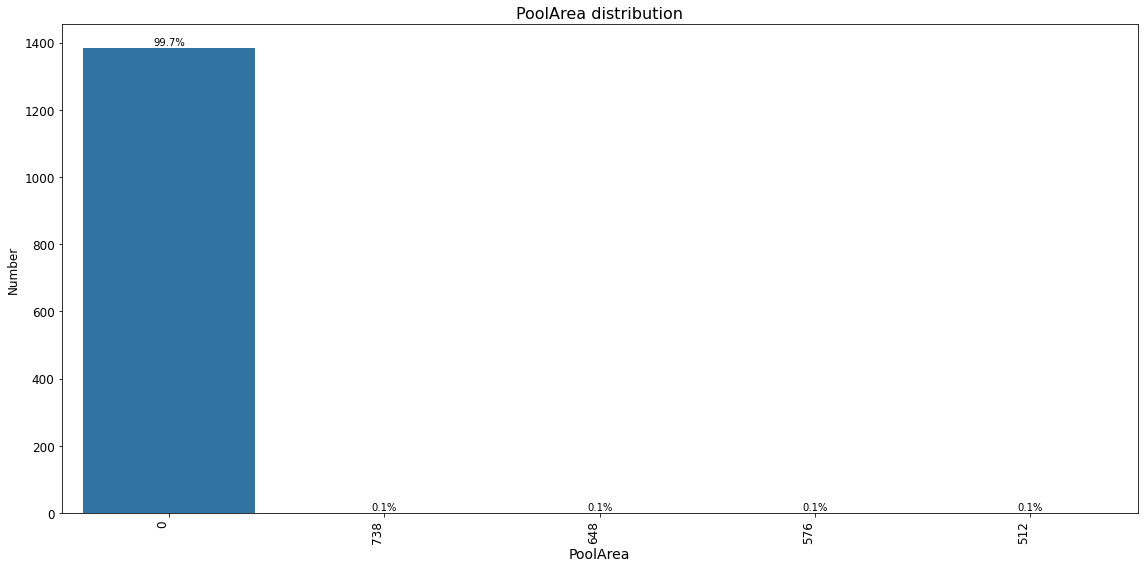

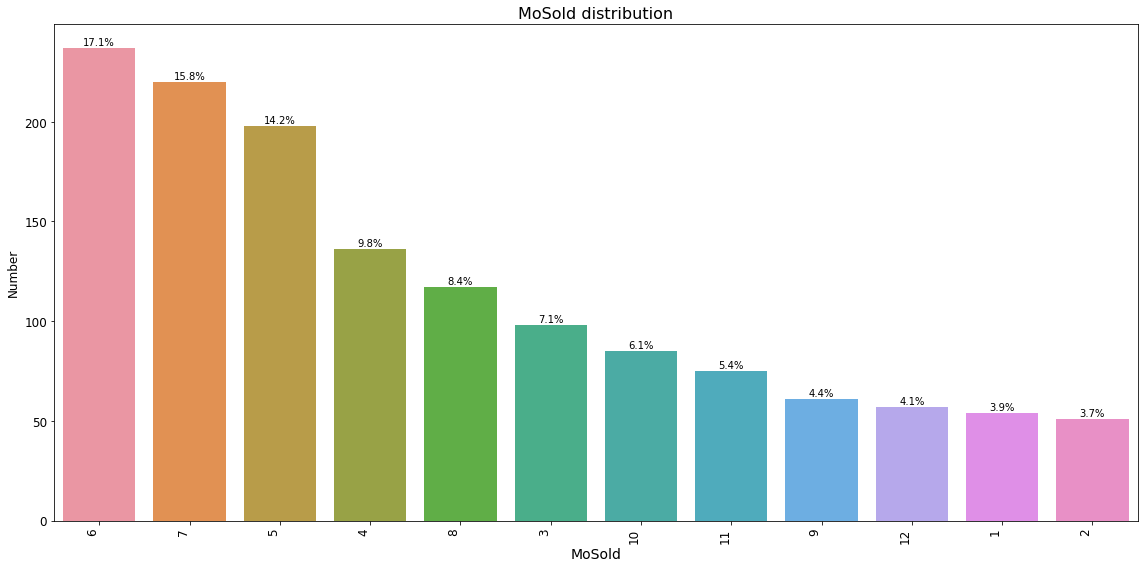

In [373]:
for feature in df_discrete:
    univariate_cate(df,feature)

### INSIGHT: 
#### 1. Most of the property have overall quality and condition 5 or 6 on the scale of 10.
#### 2.Majority of houses have no basement bathroom,2 Full bathroom,3 bedroom above grade,1 kitchen above grade, 6 total rooms, 2 garage cars.
#### 3. Most of the properties were sold in the month of 6 or 7.(jun or july)

# BIVARIATE ANALYSIS


## BIVARIATE ANALYSIS FOR CATEGORICAL VARIABLES

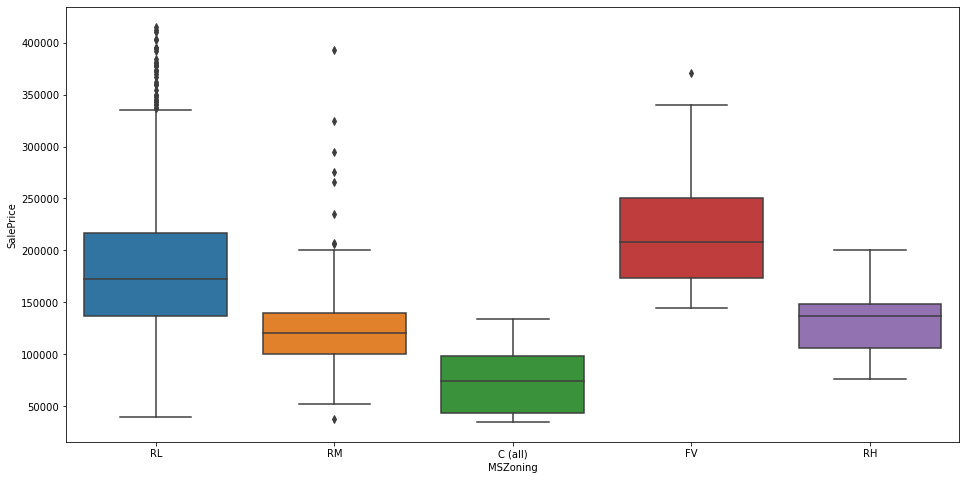

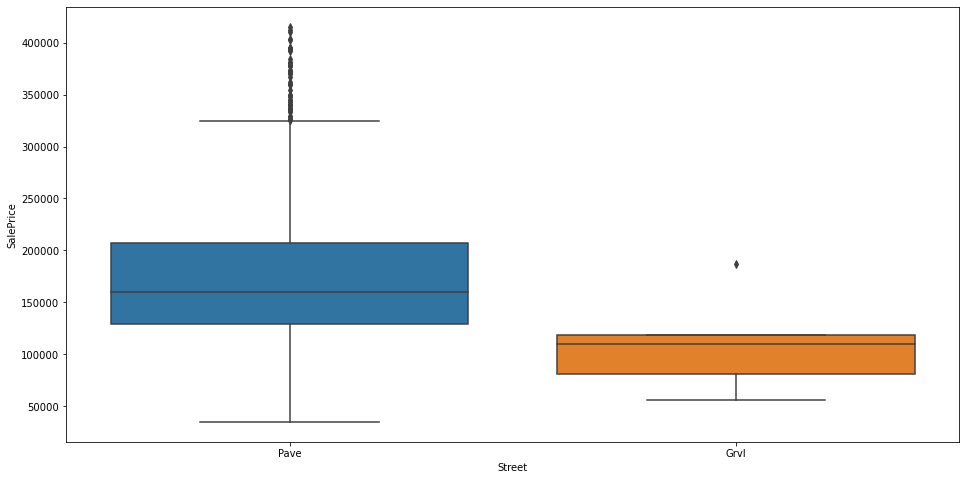

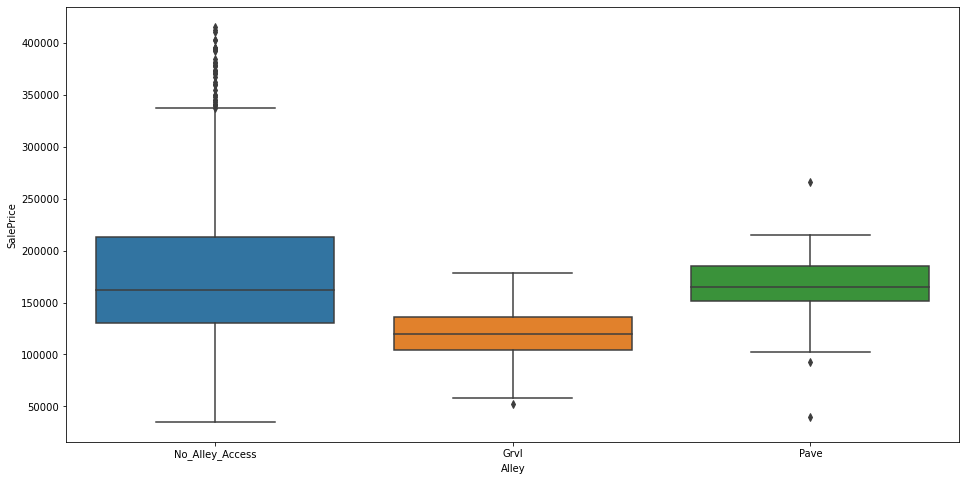

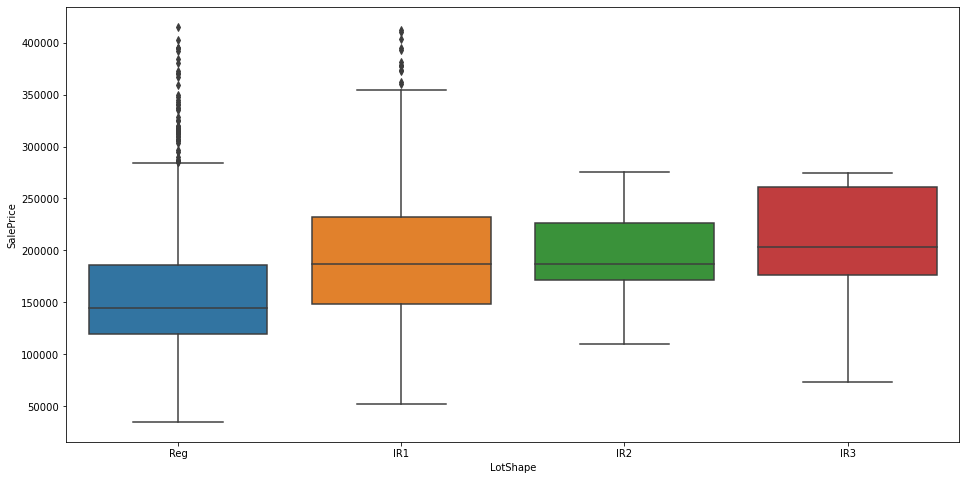

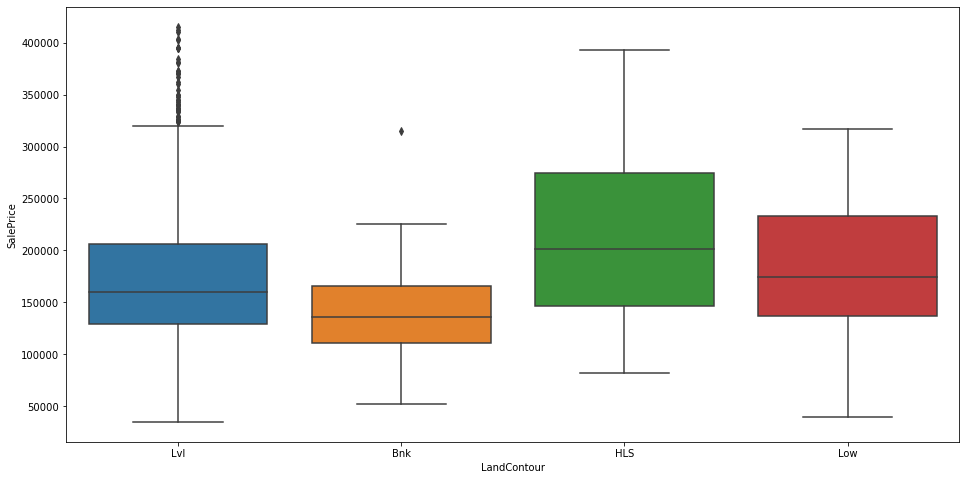

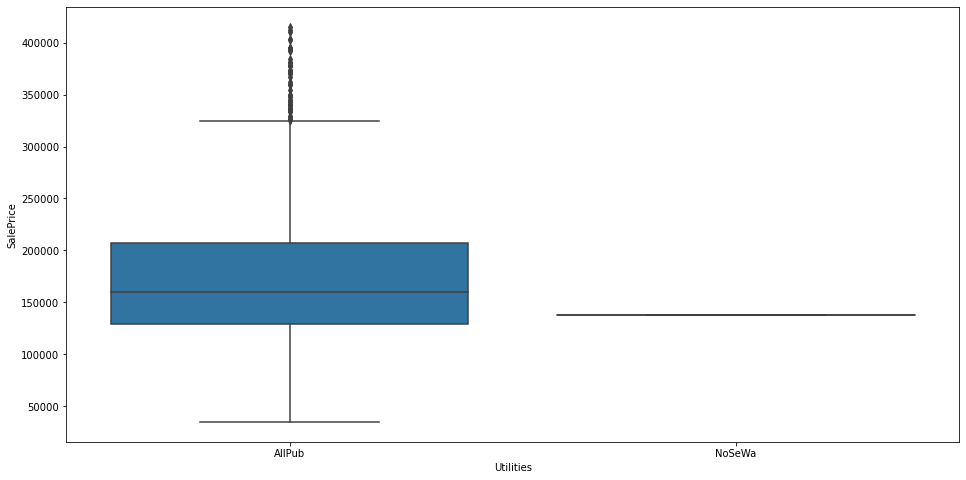

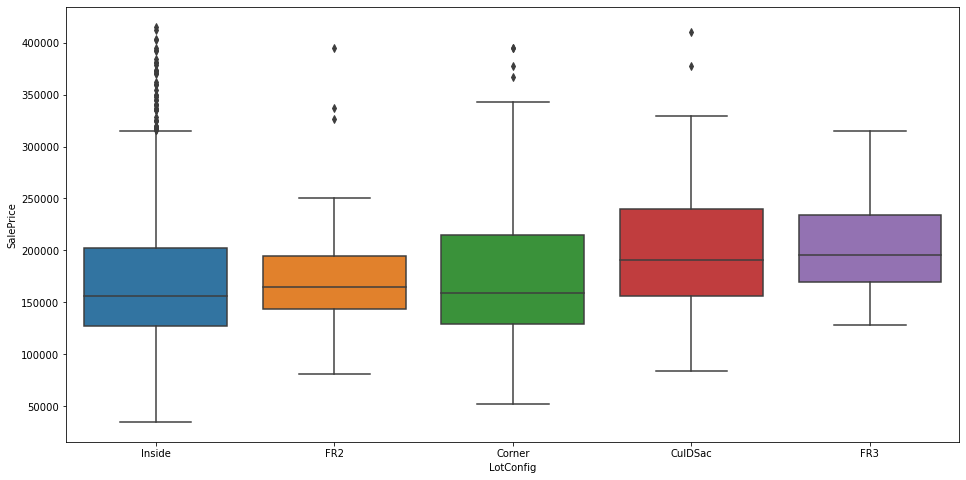

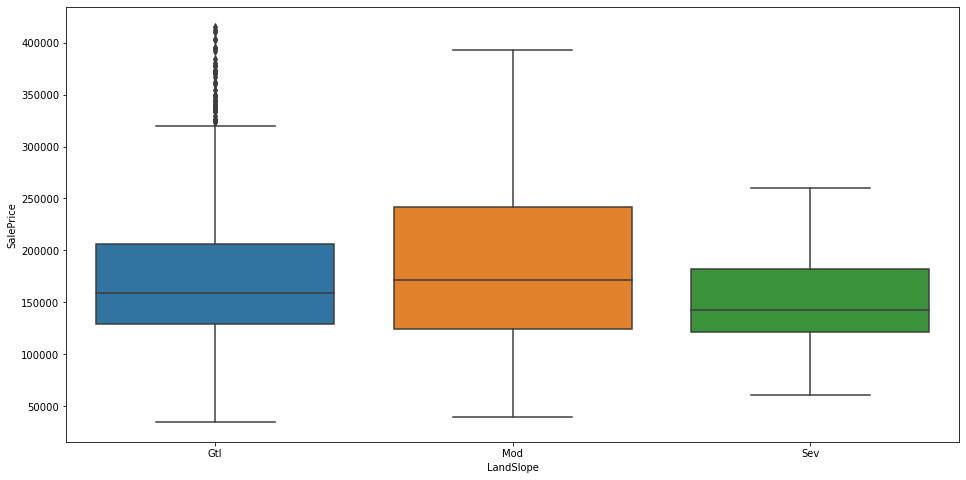

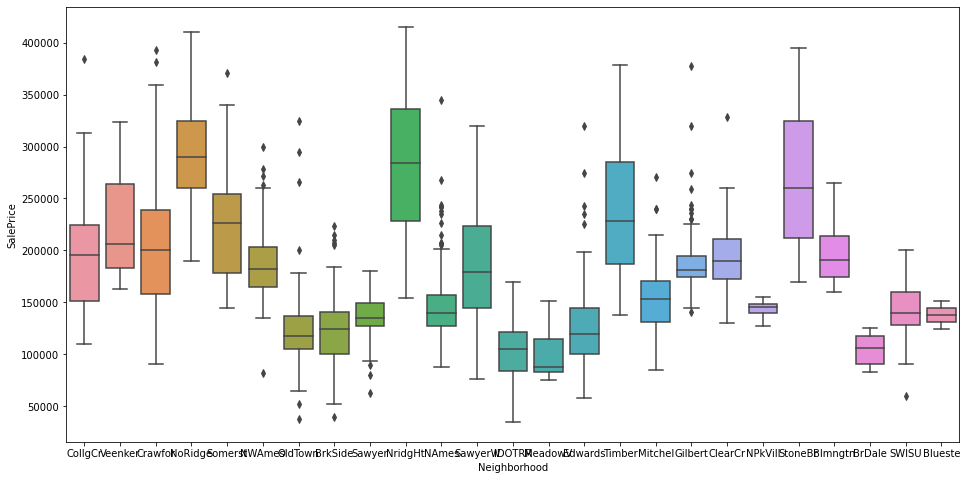

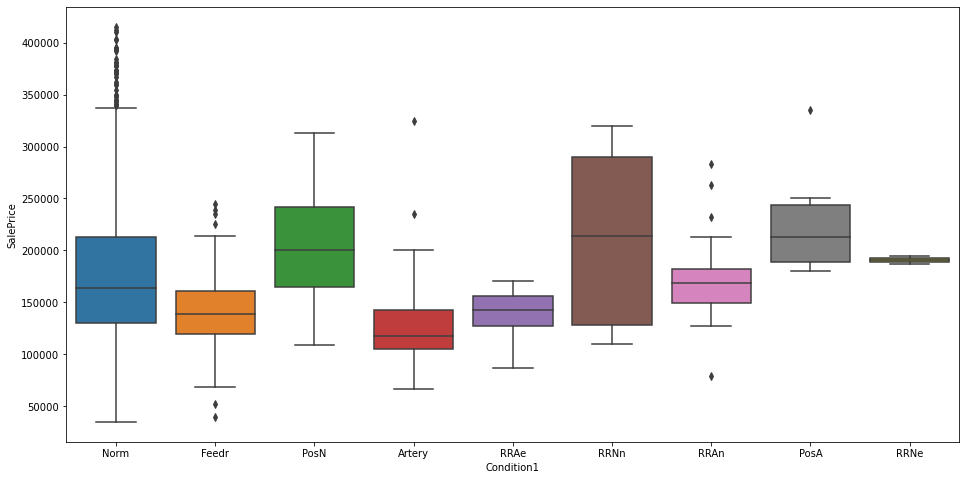

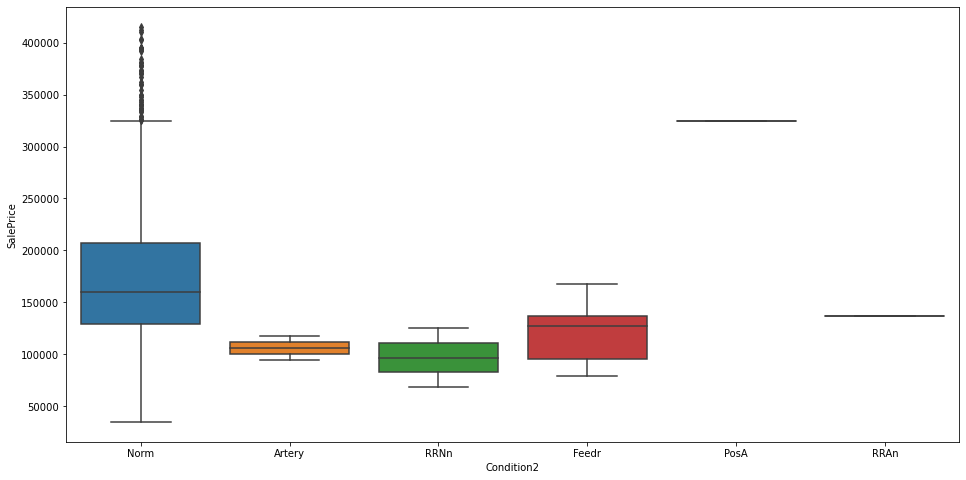

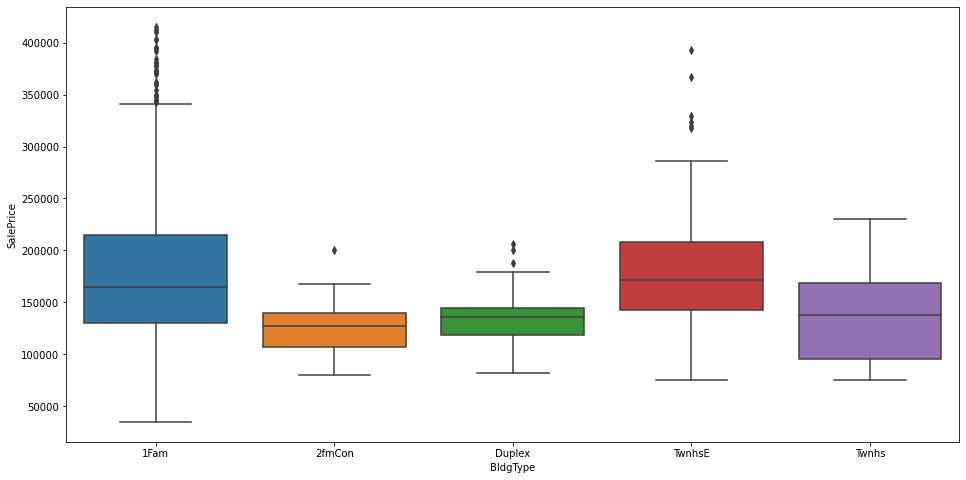

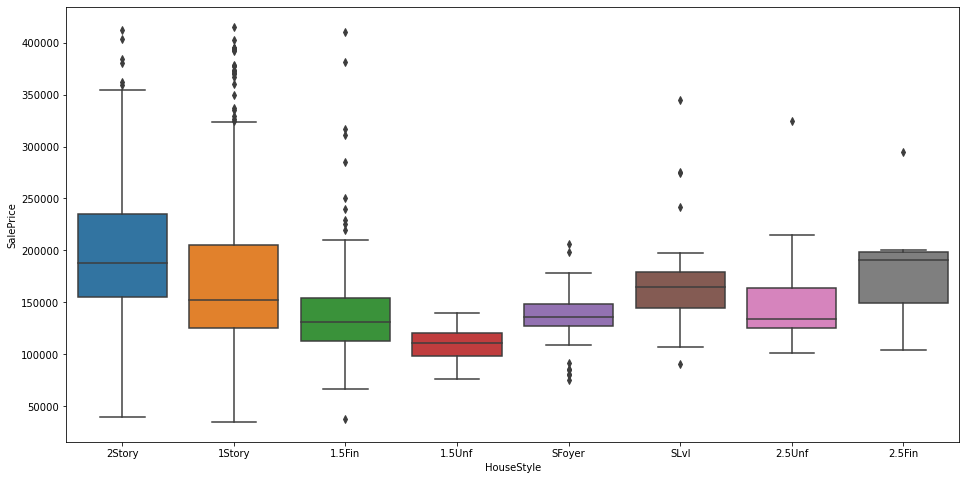

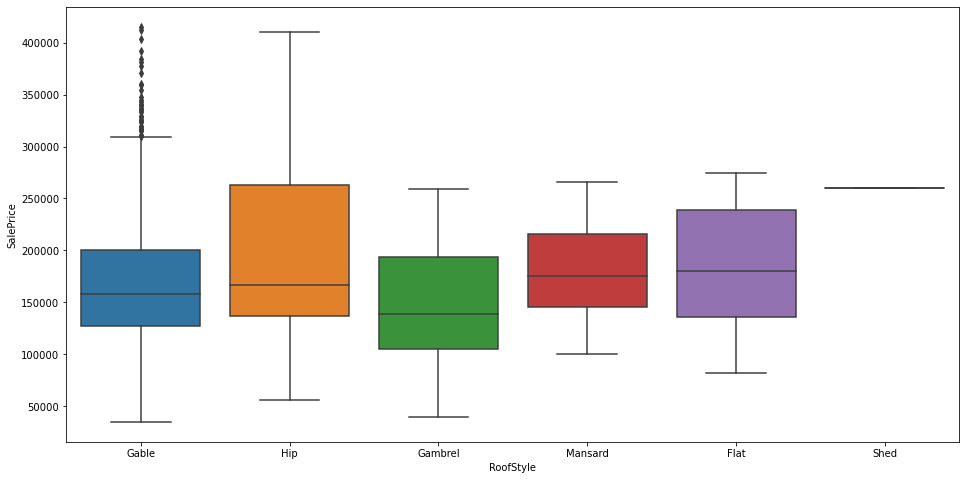

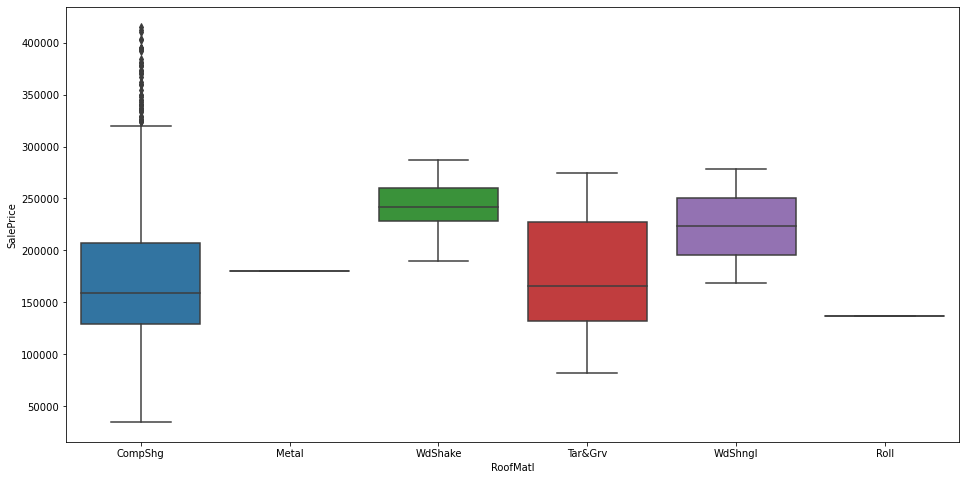

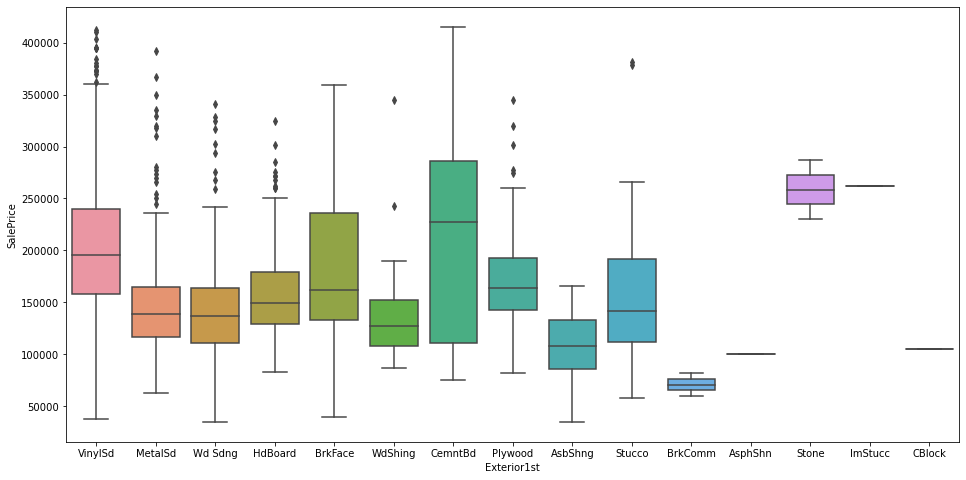

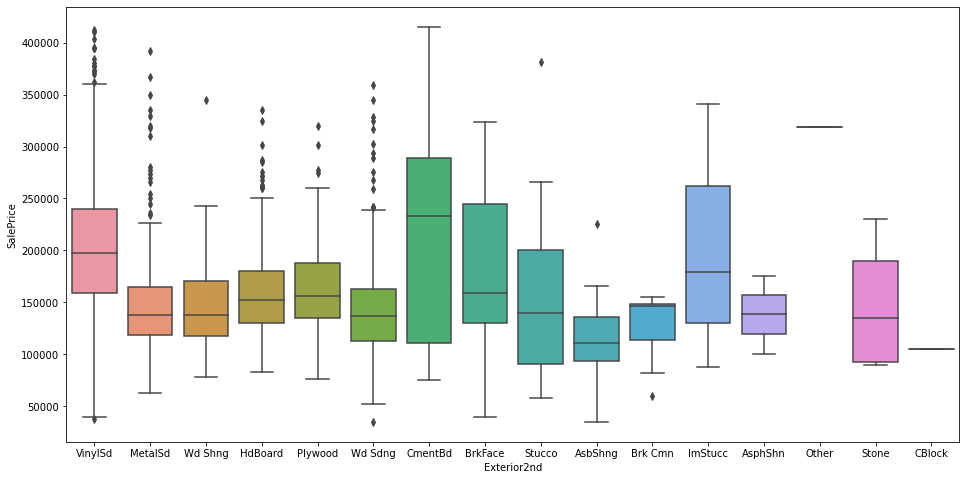

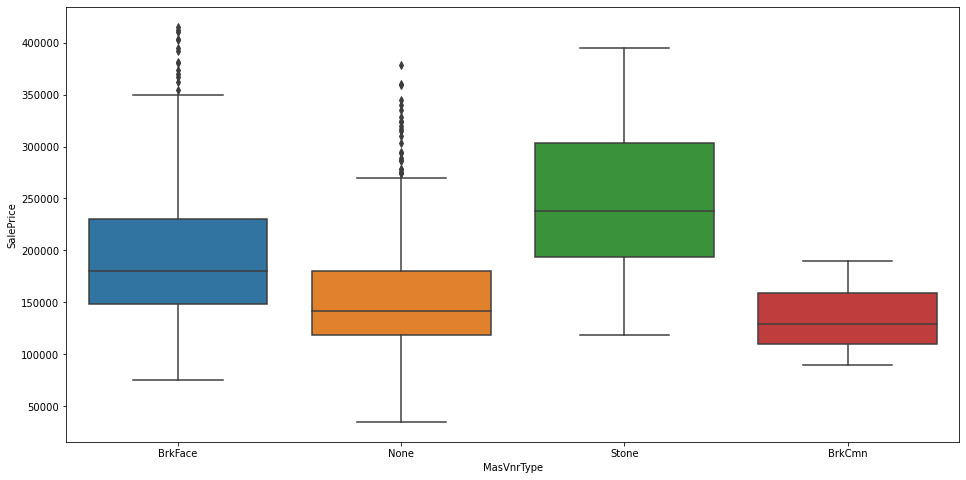

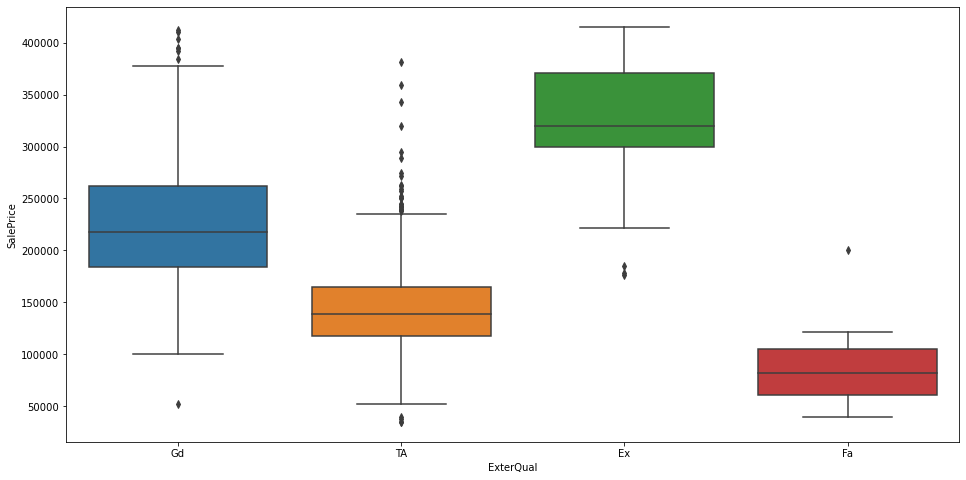

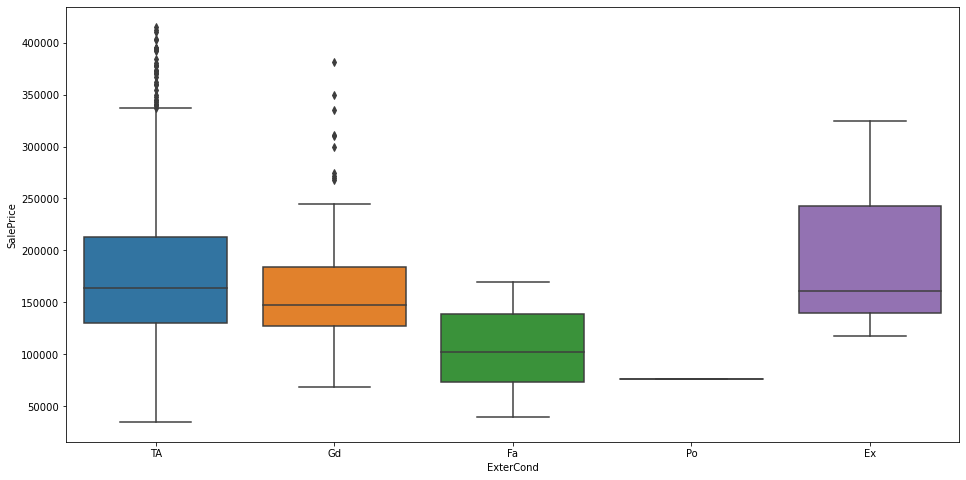

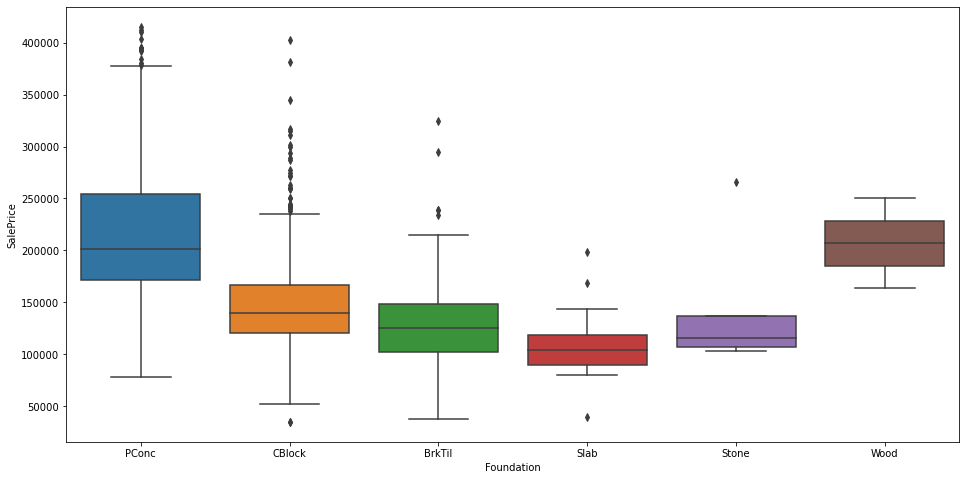

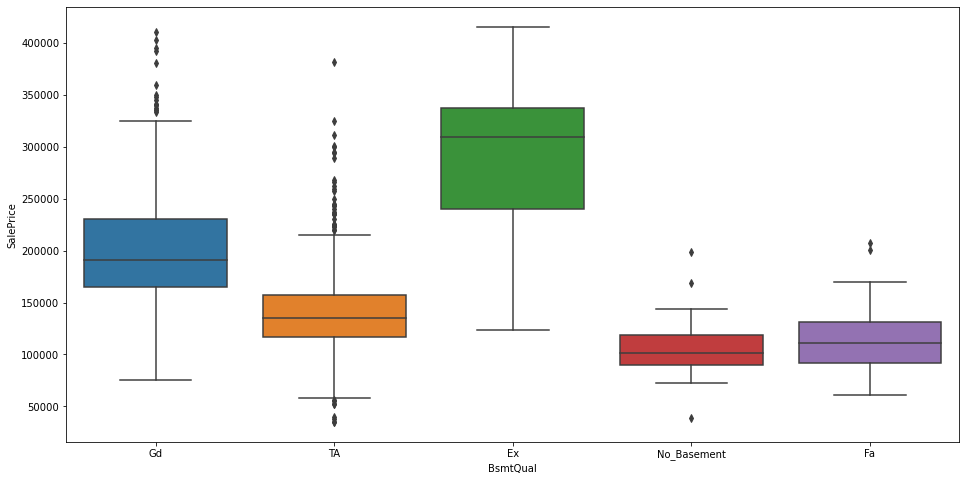

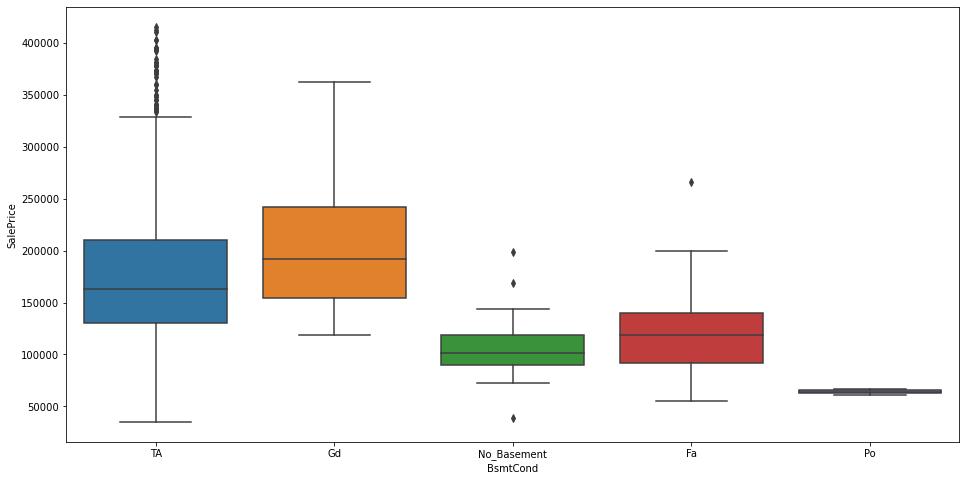

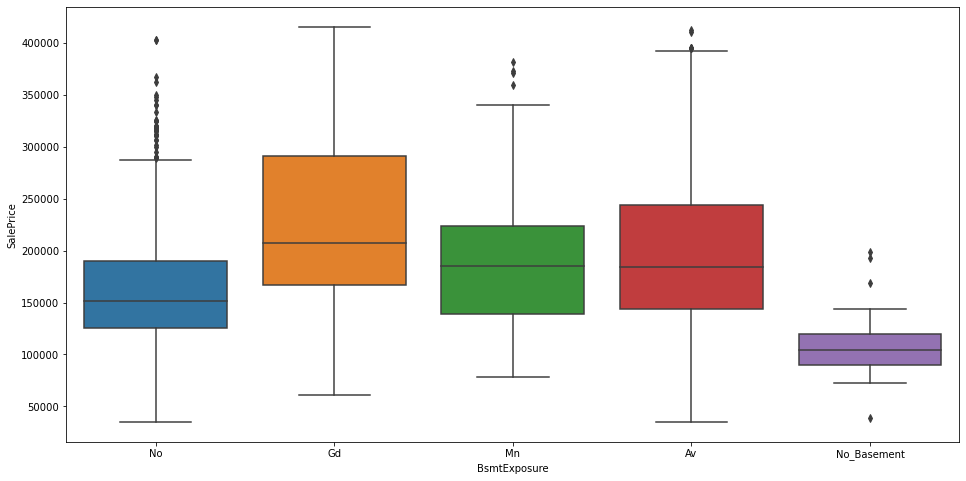

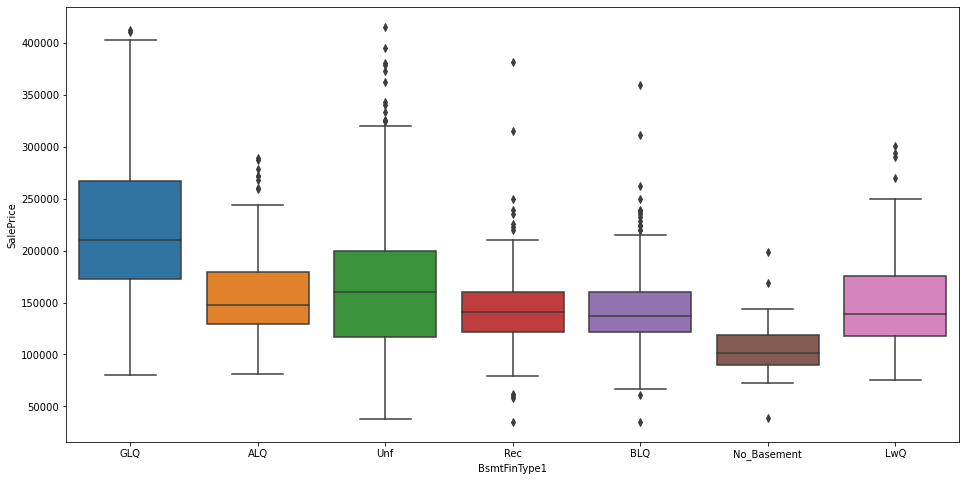

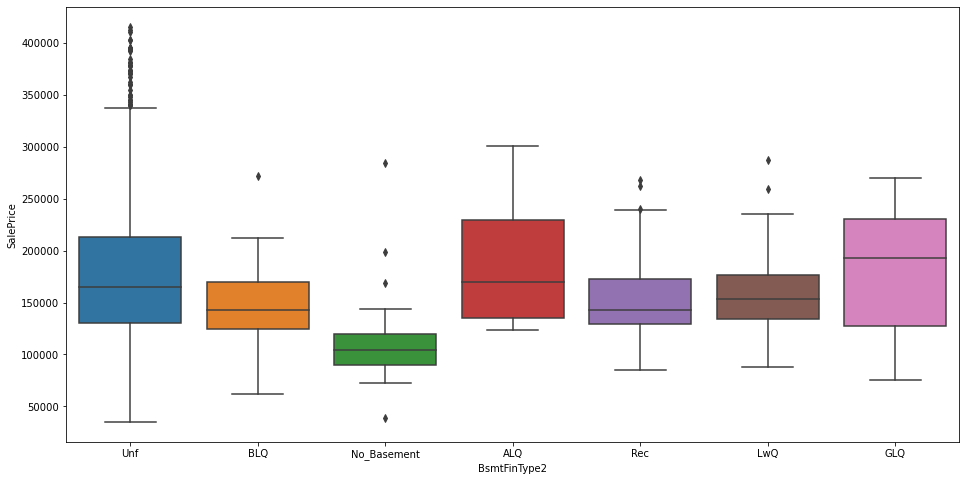

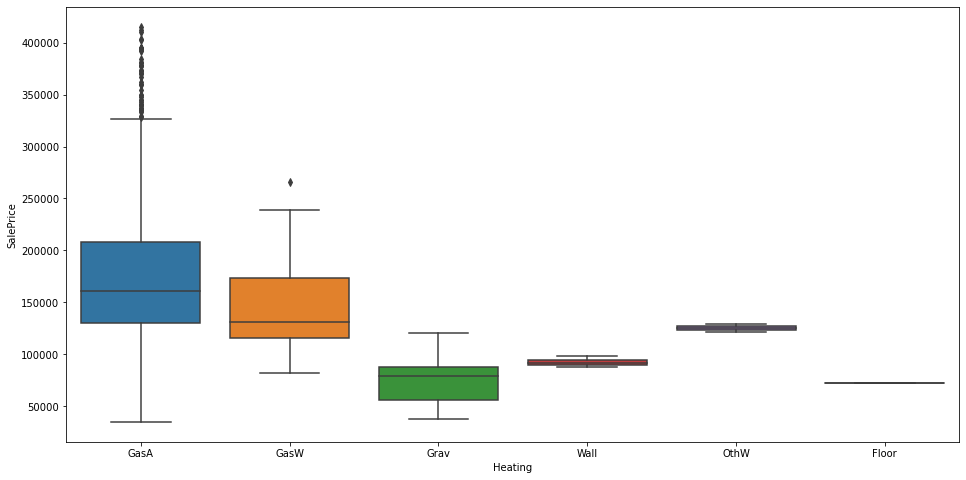

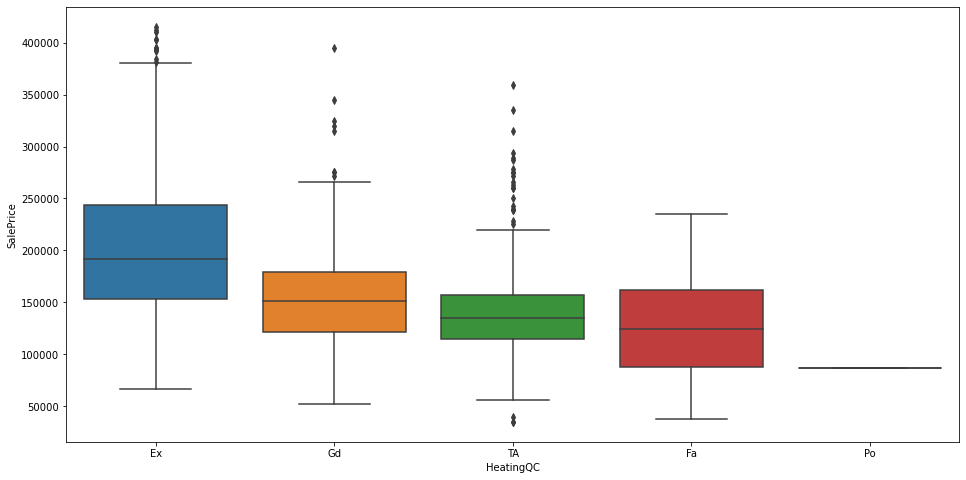

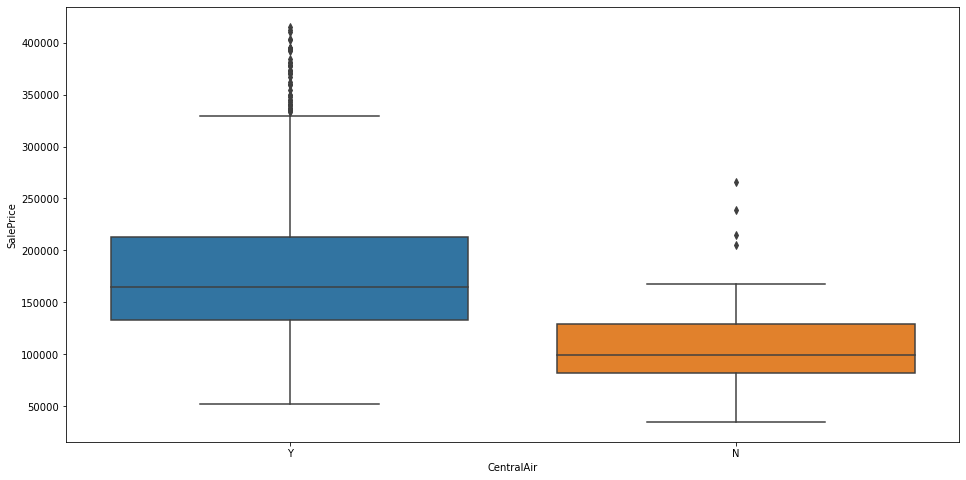

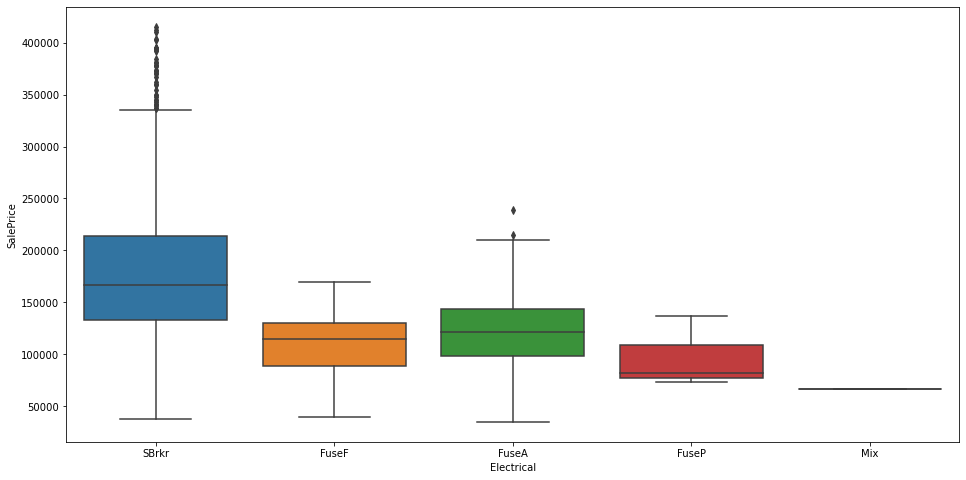

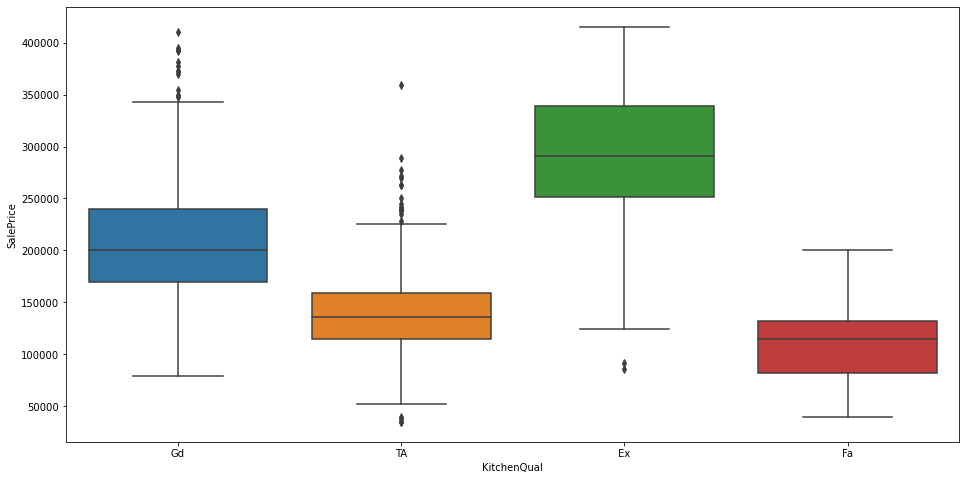

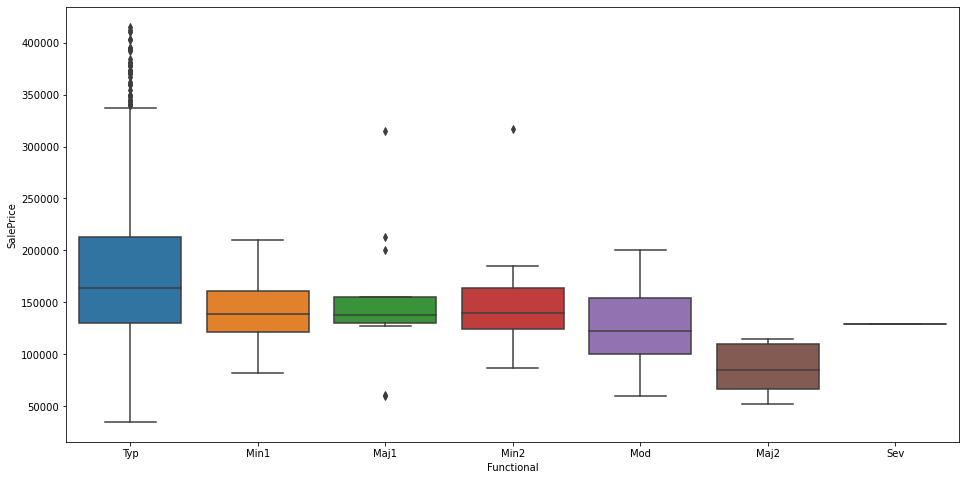

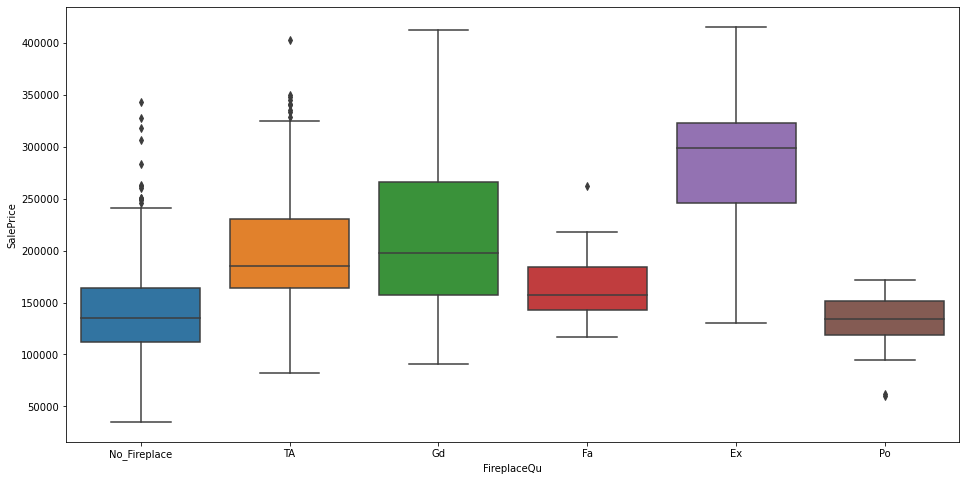

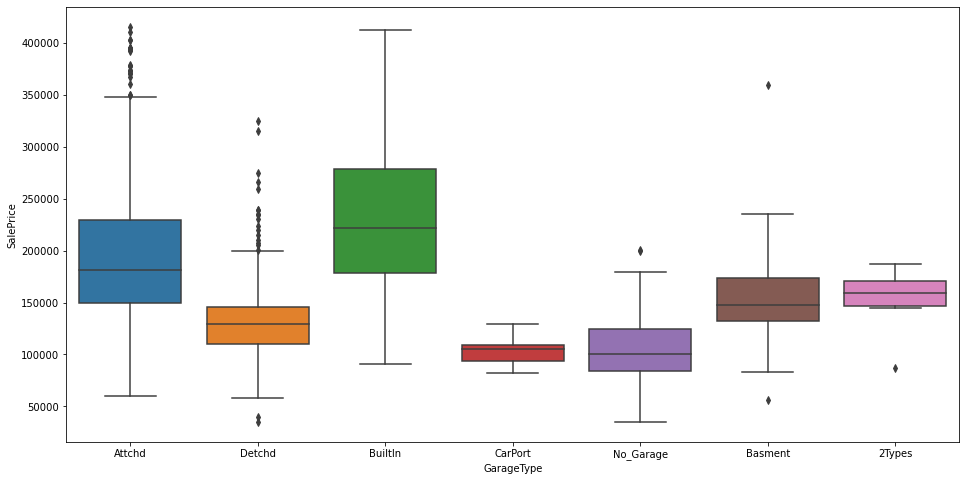

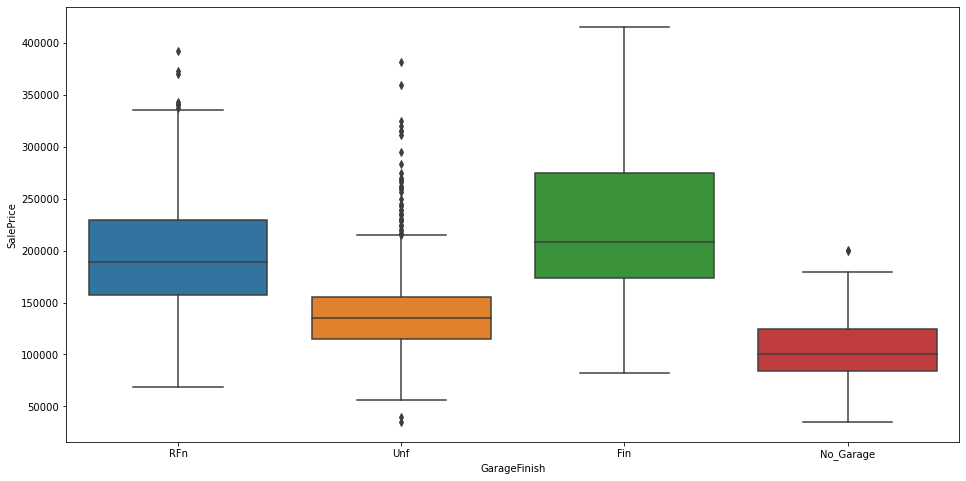

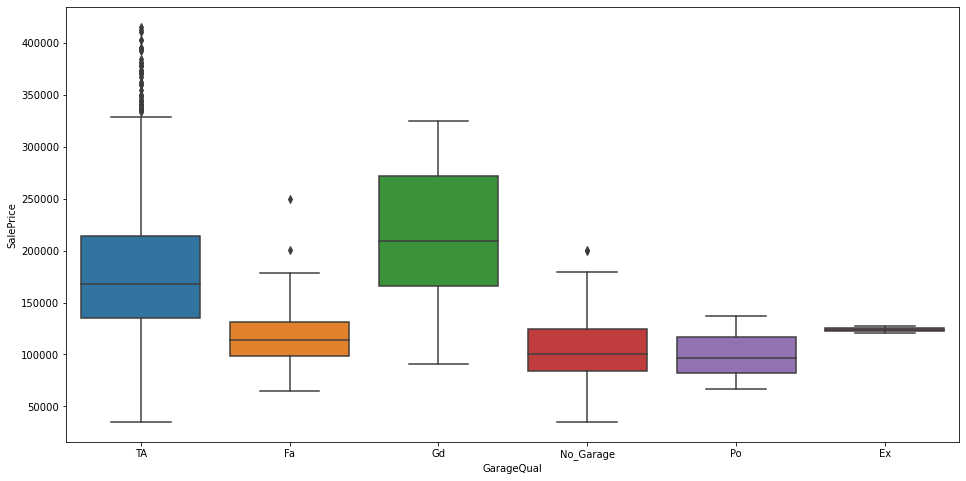

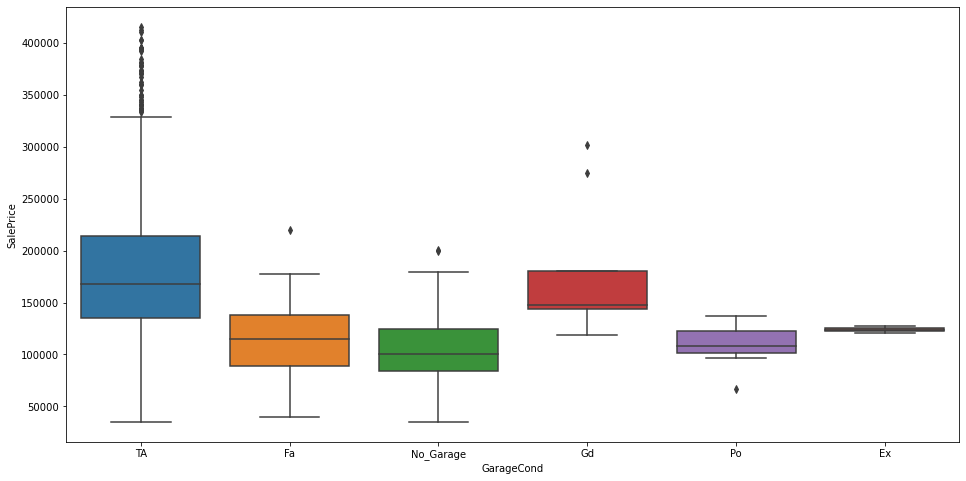

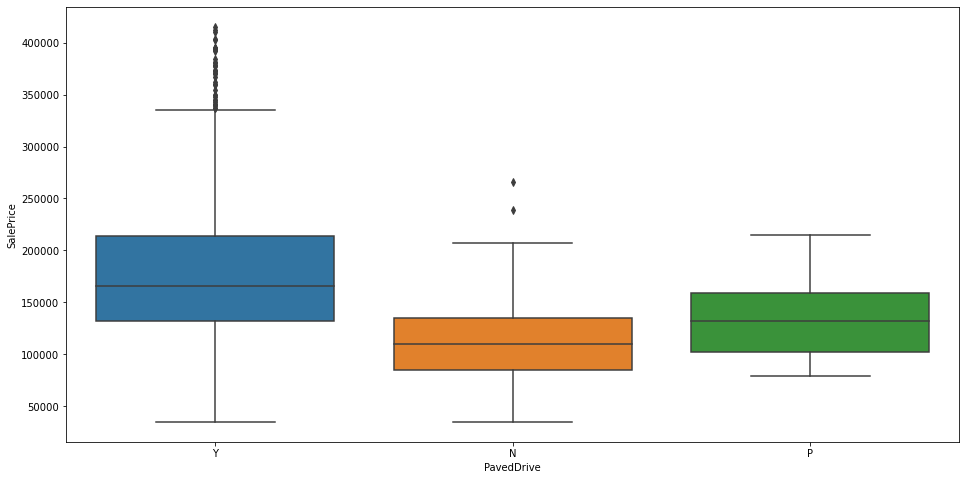

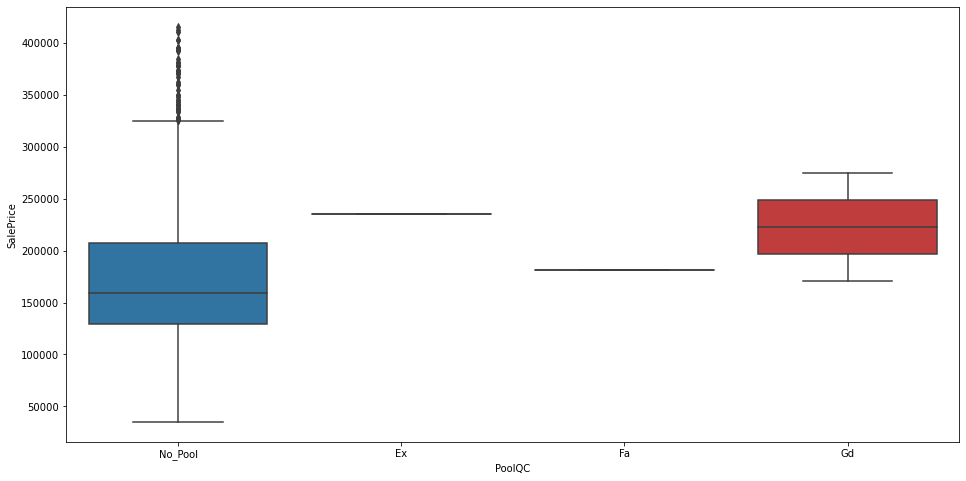

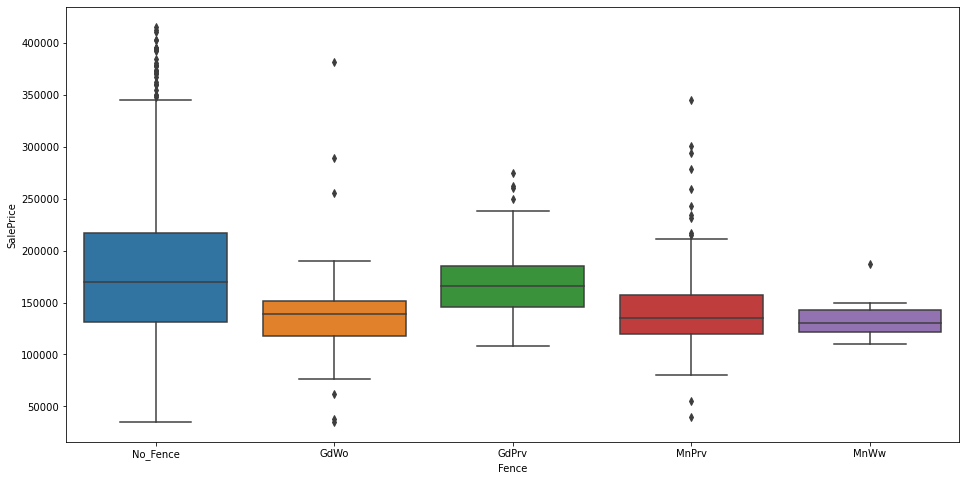

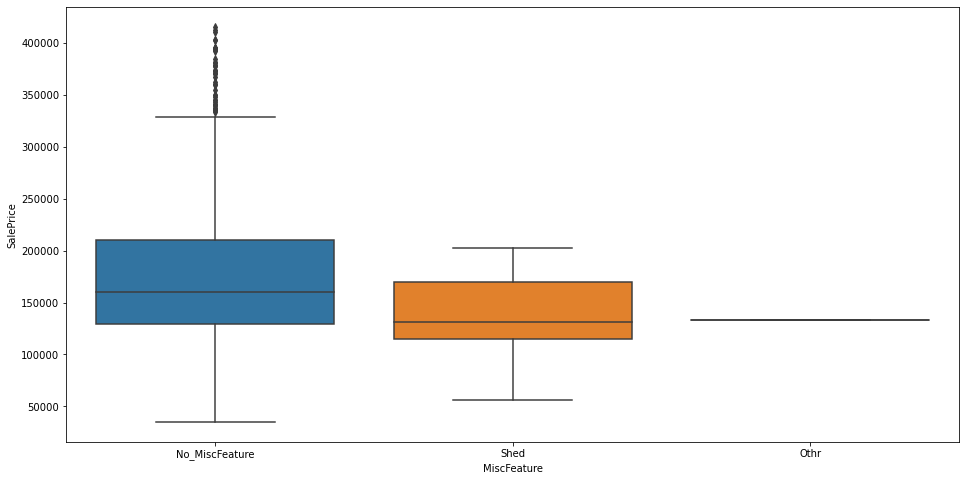

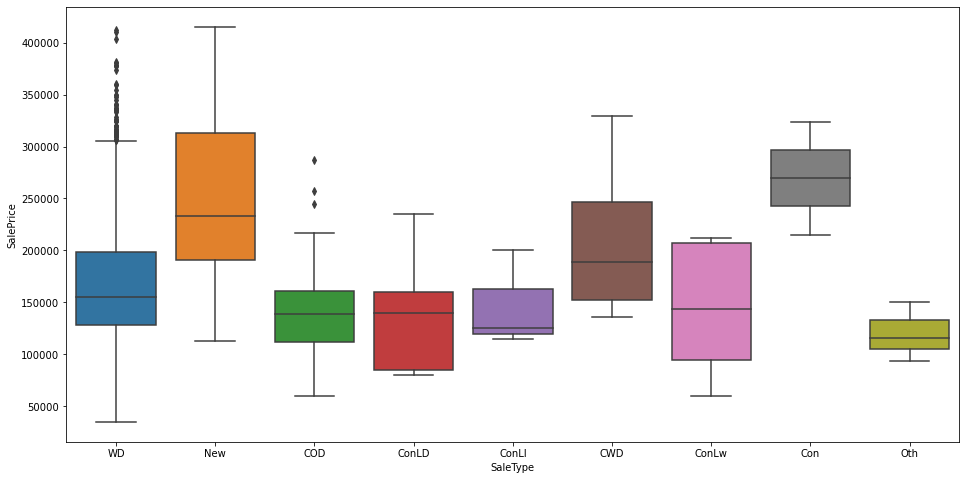

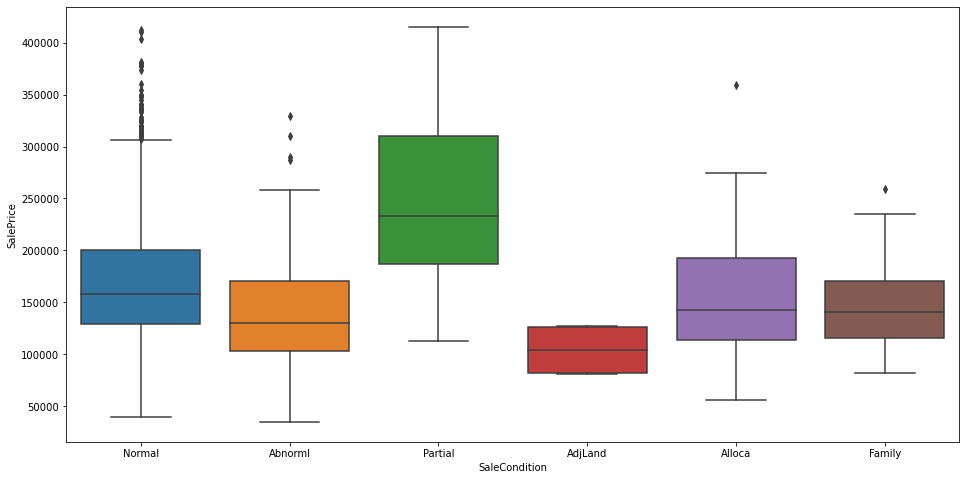

In [374]:
# plot box plot with sales price for categorical variables
for i in df_Categorical_variables:
    plt.figure(figsize=(16,8))
    sns.boxplot(x=i,y='SalePrice',data=df)

### INSIGHTS:
#### 1. Properties in the FV zone (floating residential) have higher saleprice.
#### 2. Properties with paved street,paved alley access, irregular plots,HLS-hillside land contour have higher saleprices.
#### 3. Sale prices are also higher for culdsac and fr3 lot config,moderate land slope,townhouses,2 or 2.5 finished story houses.
#### 4. Properties having mason veneer stone type,excellent external quality,basement quality, good basement exposure,gas A heating, excellent heating quality,central air, excellent kitchen quality, excellent fireplace,good pool  and builtin garge with paved drive and finshed in good condition have higher sale price.


## BIVARIATE ANALYSIS FOR DISCRETE NUMERIC VARIABLES- AVG SALEPRICE

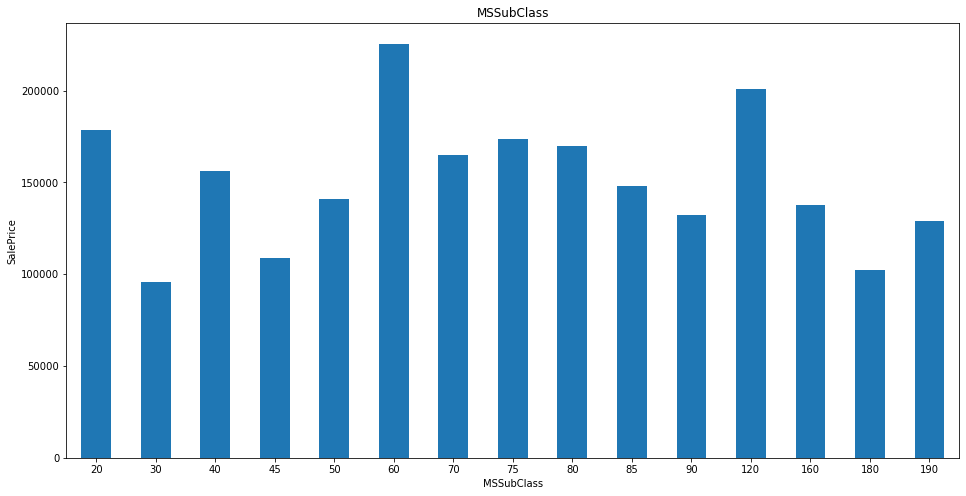

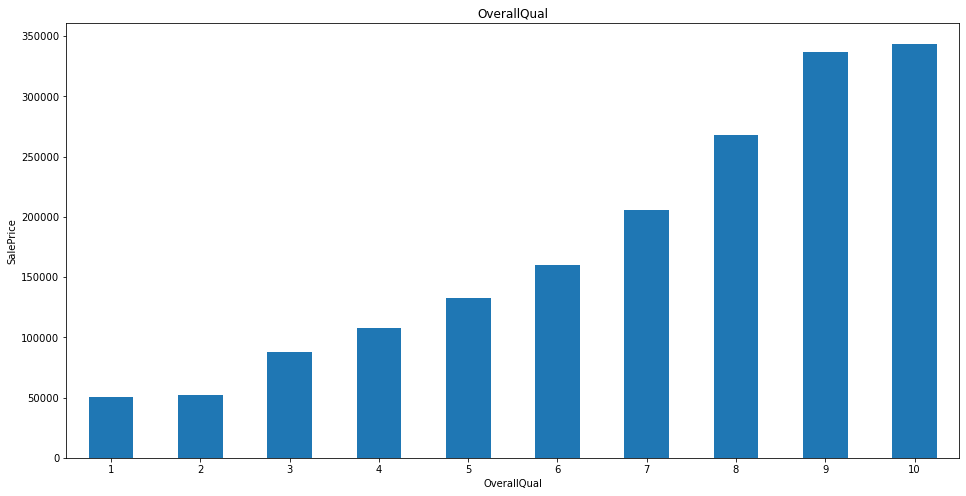

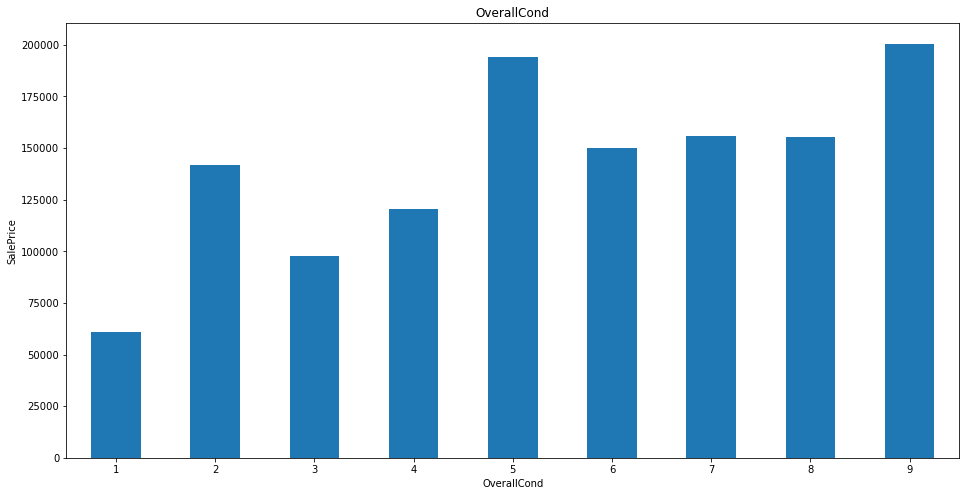

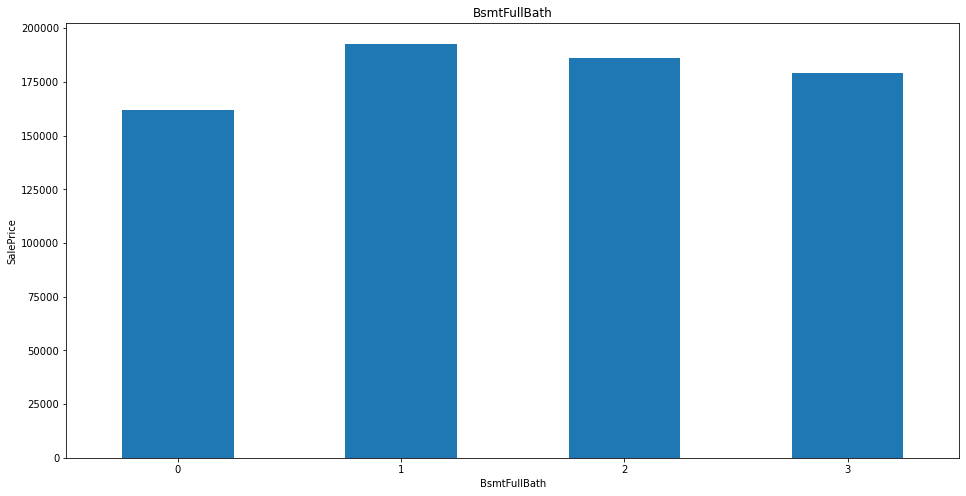

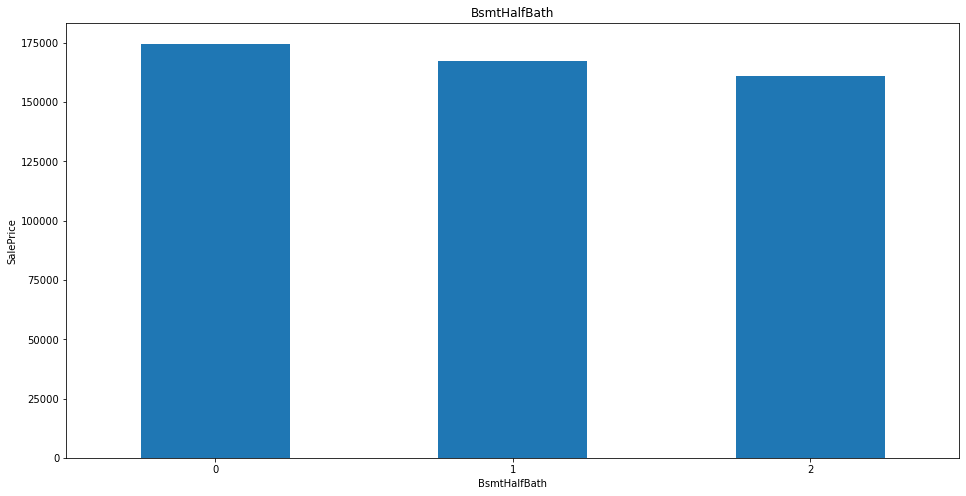

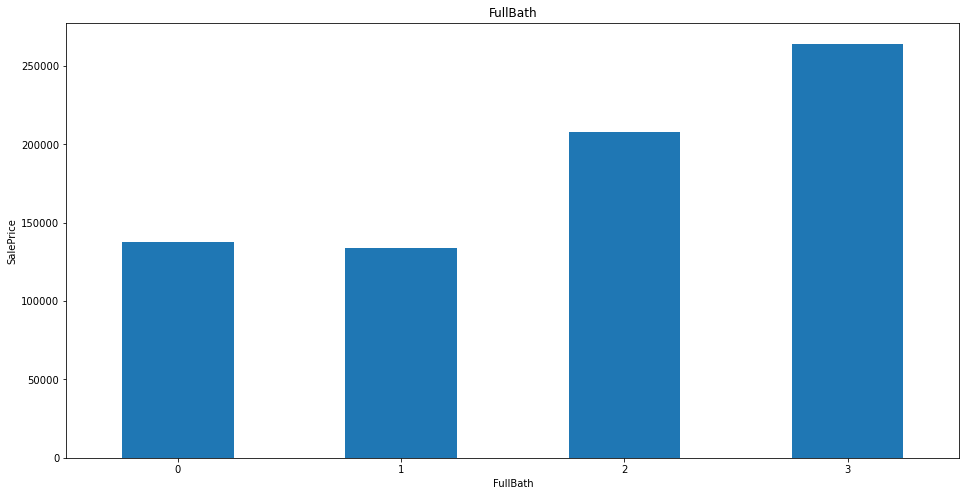

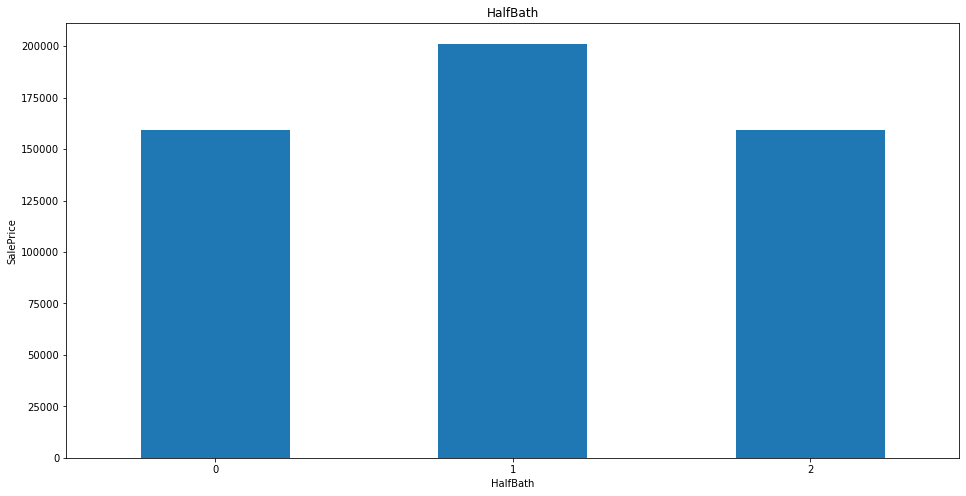

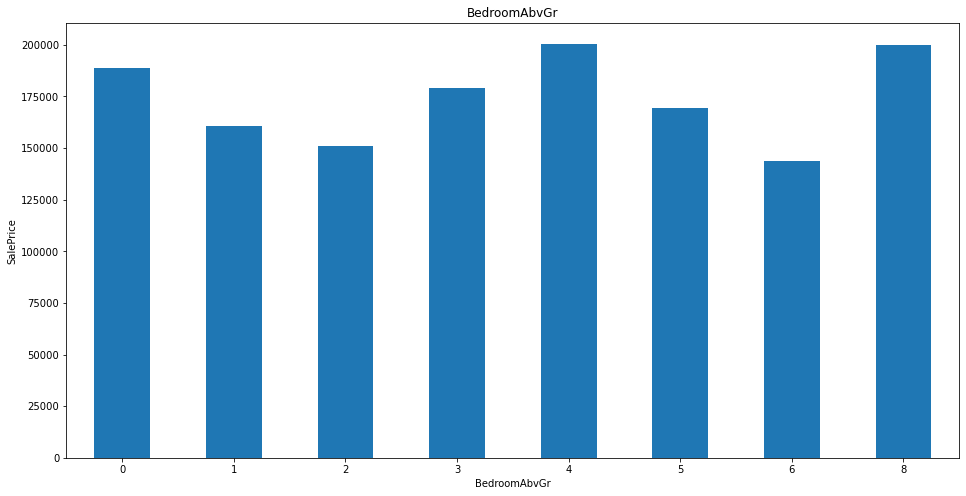

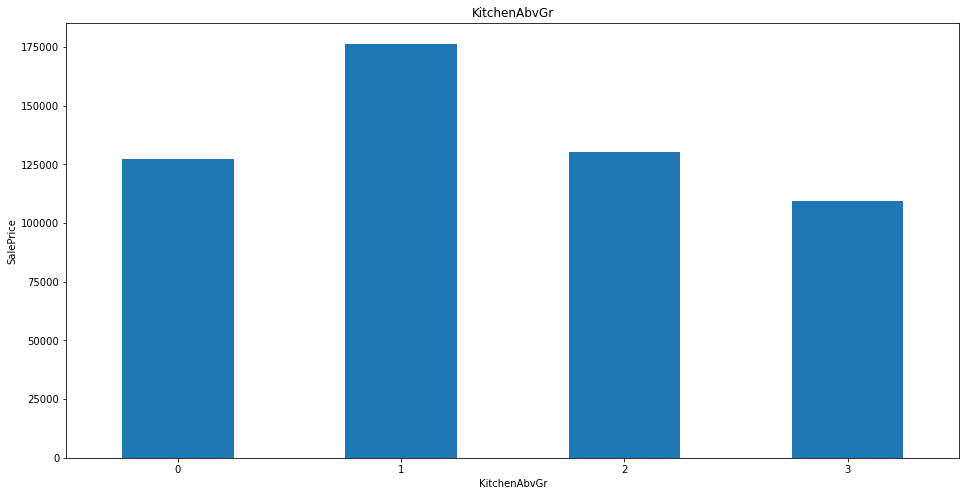

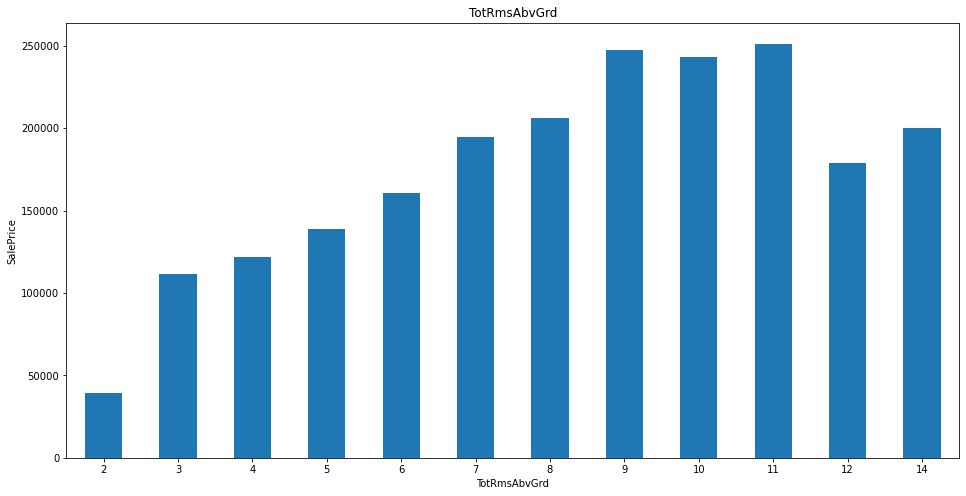

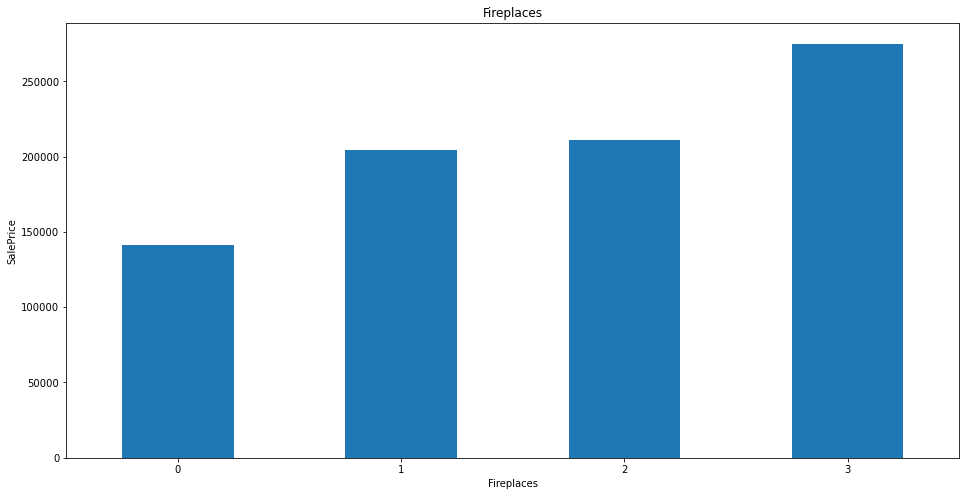

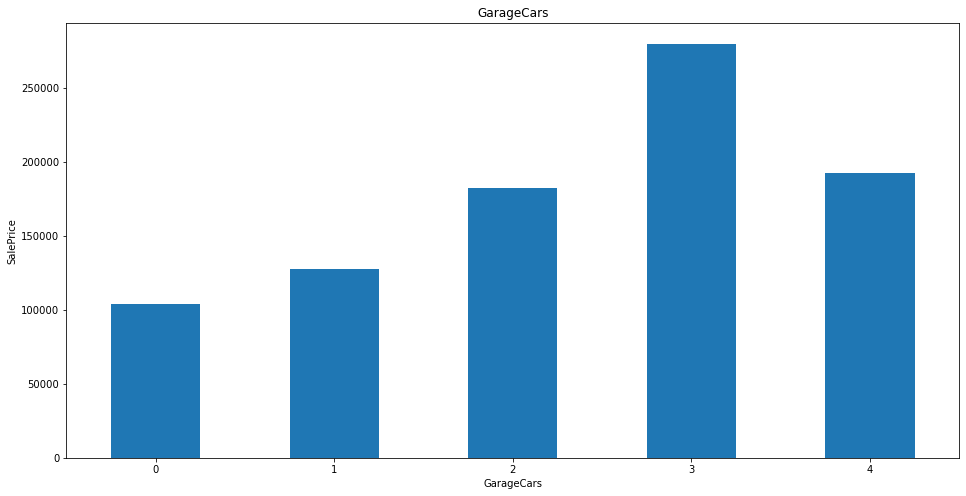

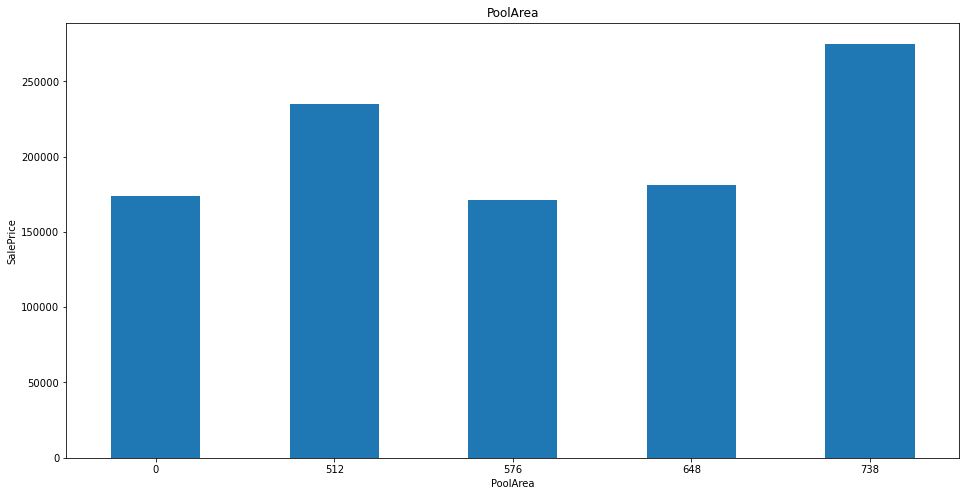

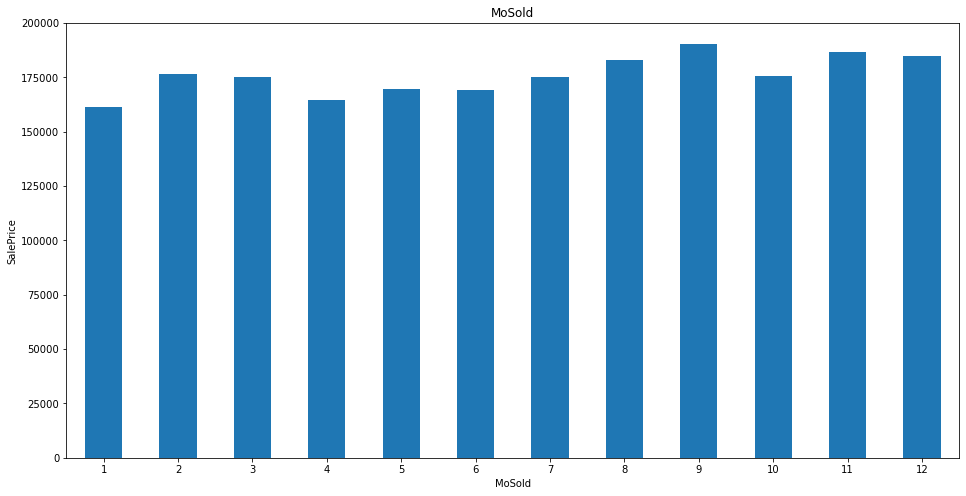

In [375]:
# plot the bar-plot vs mean-saleprice for discrete numeric variables 
for feature in df_discrete:
    fig,ax =plt.subplots(figsize=(16,8))
    df.groupby(feature)['SalePrice'].mean().plot.bar(rot=0)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

### INSIGHTS:
#### 1. Average Saleprices increased with overall quality and condition.
#### 2. Basement  1 full bathroom have higher sale price than more basement bathrooms or half bathrooms.
#### 3. Sale price increased with increase in number of bathrooms to 3.
#### 4. Total rooms between 9-11, 3 fireplaces, 3 garagecars, and pool area of 738 have higher scale price.
#### 5. Sale price didnt significantly change with months but with september having slightly higher sale price.

# MULTIVARIATE ANALYSIS

In [376]:
# find the correlation coefficients
corr=df.corr()
corr

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass         1.000000    -0.407364 -0.337232     0.054745    -0.060391   
LotFrontage       -0.407364     1.000000  0.640832     0.203781    -0.051395   
LotArea           -0.337232     0.640832  1.000000     0.132594    -0.022956   
OverallQual        0.054745     0.203781  0.132594     1.000000    -0.083111   
OverallCond       -0.060391    -0.051395 -0.022956    -0.083111     1.000000   
...                     ...          ...       ...          ...          ...   
MoSold            -0.018411     0.029972 -0.007856     0.083100    -0.001746   
SalePrice         -0.074189     0.357486  0.344520     0.804212    -0.070744   
age_of_property   -0.033987    -0.107156 -0.035903    -0.572323     0.363336   
remodelling_age   -0.050414    -0.073903 -0.011364    -0.547707    -0.078528   
age_of_garage     -0.088632    -0.048860  0.016510    -0.542246     0.317465   

                 MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
MSSubClass         0.024938   -0.059402   -0.062793  -0.140331    -0.246408   
LotFrontage        0.161733    0.121167    0.042324   0.135526     0.292888   
LotArea            0.109098    0.154580    0.071851   0.068839     0.270665   
OverallQual        0.377620    0.169827   -0.062407   0.308357     0.500718   
OverallCond       -0.121723   -0.022465    0.039927  -0.143480    -0.168583   
...                     ...         ...         ...        ...          ...   
MoSold             0.023136    0.009833   -0.011529   0.036933     0.047173   
SalePrice          0.439393    0.347576   -0.018959   0.222869     0.610881   
age_of_property   -0.309290   -0.232102    0.046873  -0.150120    -0.395320   
remodelling_age   -0.155979   -0.105395    0.067614  -0.179410    -0.285440   
age_of_garage     -0.238529   -0.129582    0.082790  -0.193317    -0.324651   

                 ...  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
MSSubClass       ...      -0.009937  -0.046048    -0.025434  0.007631   
LotFrontage      ...       0.024795   0.076930     0.045346  0.080698   
LotArea          ...       0.004770   0.070851     0.094229  0.083626   
OverallQual      ...      -0.107757   0.046477     0.053463  0.015367   
OverallCond      ...       0.078795   0.031375     0.034811  0.014780   
...              ...            ...        ...          ...       ...   
MoSold           ...      -0.028218   0.020339     0.024477 -0.028136   
SalePrice        ...      -0.137241   0.073208     0.090454  0.034956   
age_of_property  ...       0.393026  -0.029265     0.031182  0.015272   
remodelling_age  ...       0.188841  -0.046084     0.036049  0.002315   
age_of_garage    ...       0.303926  -0.022038     0.065883  0.035363   

                  MiscVal    MoSold  SalePrice  age_of_property  \
MSSubClass      -0.050073 -0.018411  -0.074189        -0.033987   
LotFrontage      0.012027  0.029972   0.357486        -0.107156   
LotArea          0.011520 -0.007856   0.344520        -0.035903   
OverallQual     -0.090284  0.083100   0.804212        -0.572323   
OverallCond      0.026671 -0.001746  -0.070744         0.363336   
...                   ...       ...        ...              ...   
MoSold           0.014822  1.000000   0.081159        -0.021433   
SalePrice       -0.081934  0.081159   1.000000        -0.569462   
age_of_property  0.055024 -0.021433  -0.569462         1.000000   
remodelling_age  0.080179 -0.034451  -0.548197         0.590927   
age_of_garage    0.032484 -0.013794  -0.528502         0.827833   

                 remodelling_age  age_of_garage  
MSSubClass             -0.050414      -0.088632  
LotFrontage            -0.073903      -0.048860  
LotArea                -0.011364       0.016510  
OverallQual            -0.547707      -0.542246  
OverallCond            -0.078528       0.317465  
...                          ...            ...  
MoSold                 -0.034451      -0.013794  
SalePrice              -0

<AxesSubplot:>

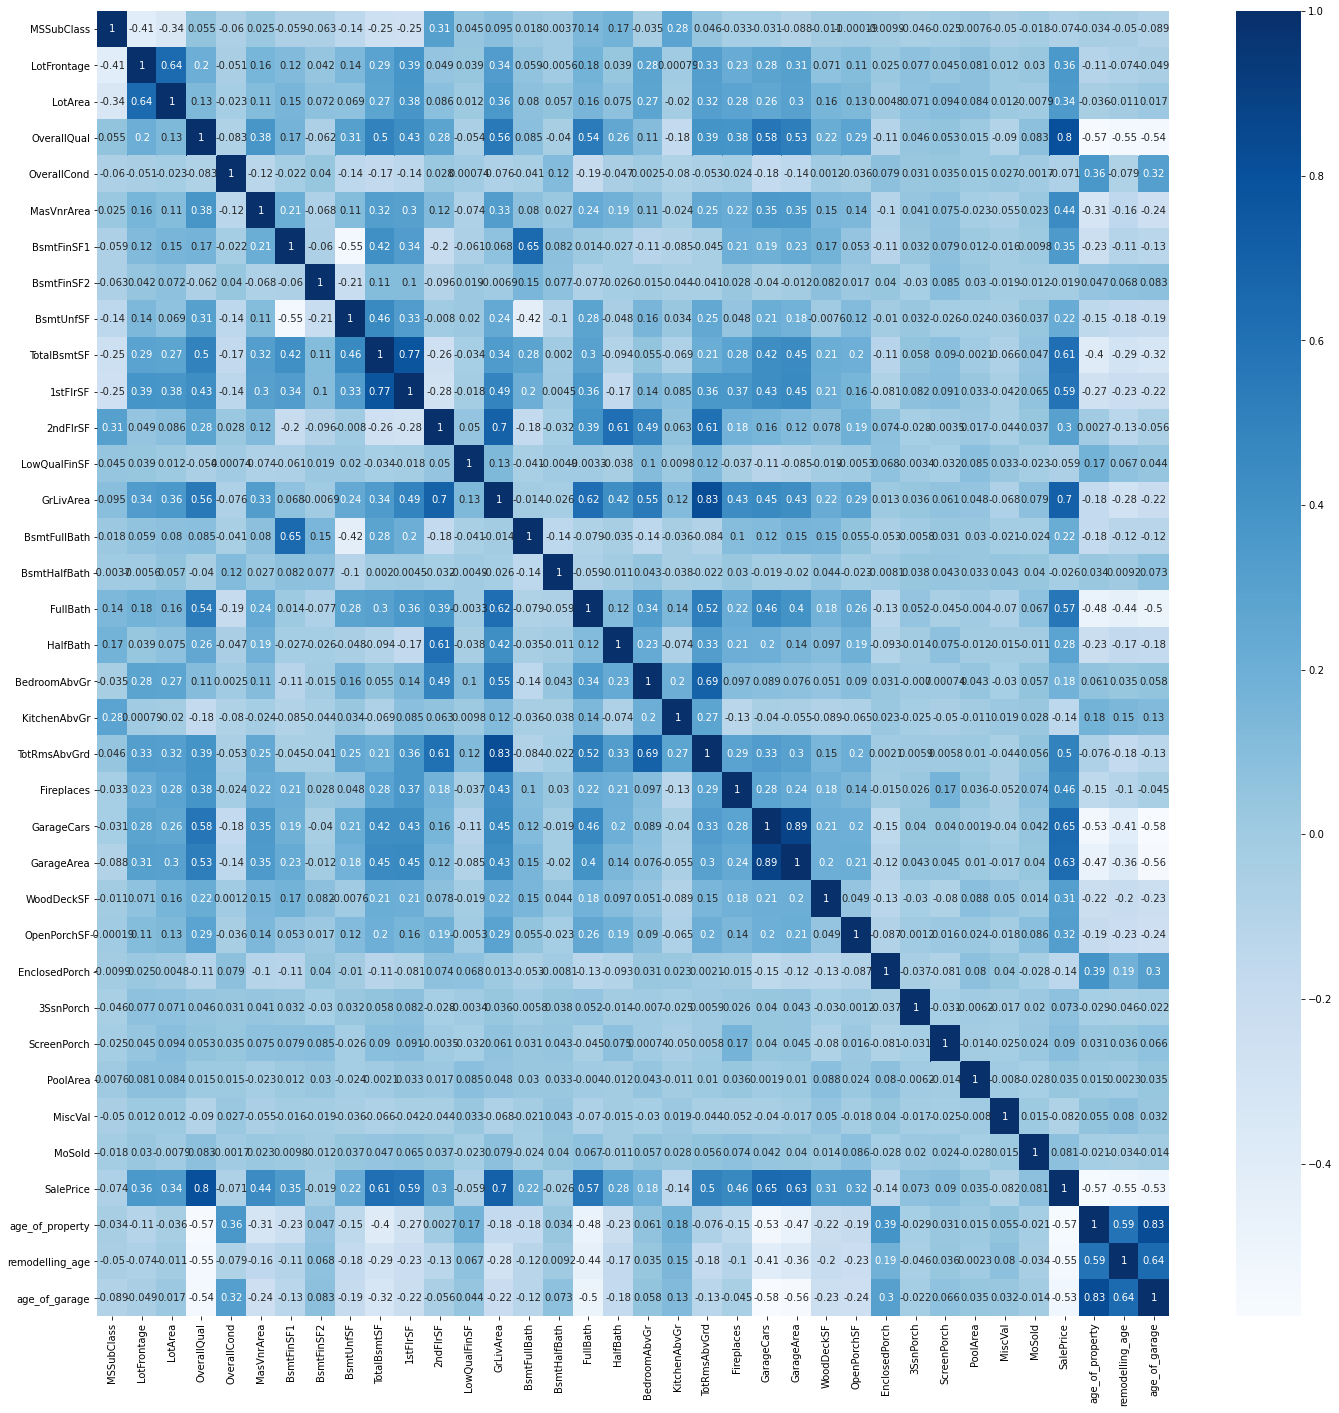

In [377]:
#plot heatmap for correlation matrix
plt.figure(figsize=(24,24))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [378]:
#finding the variables with strong  correlation with each other.
for i in corr.columns:
    for j in corr.index:
        if i!=j and i!='SalePrice' and j!='SalePrice':
            if corr.loc[i,j]>0.7or corr.loc[i,j]<-0.7:
                print(i,j,corr.loc[i,j])

TotalBsmtSF 1stFlrSF 0.7748123974188628
1stFlrSF TotalBsmtSF 0.7748123974188628
GrLivArea TotRmsAbvGrd 0.8257265423840008
TotRmsAbvGrd GrLivArea 0.8257265423840008
GarageCars GarageArea 0.8860478722650665
GarageArea GarageCars 0.8860478722650665
age_of_property age_of_garage 0.8278331640648
age_of_garage age_of_property 0.8278331640648


In [379]:
# droping variable with strong correlation with other variables(>0.75)
drop_var=['1stFlrSF','TotRmsAbvGrd','GarageArea','age_of_garage']
df.drop(['1stFlrSF','TotRmsAbvGrd','GarageArea','age_of_garage'],axis=1,inplace=True)

In [380]:
#recheck the correlation coefficients
corr=df.corr()


In [381]:
#finding top 10 features with strong positive correlation and  top 10 with strong negative correlation
print(corr['SalePrice'].sort_values(ascending=False)[:10])
print(corr['SalePrice'].sort_values(ascending=True)[:10])

SalePrice      1.000000
OverallQual    0.804212
GrLivArea      0.697151
GarageCars     0.650960
TotalBsmtSF    0.610881
FullBath       0.567664
Fireplaces     0.460922
MasVnrArea     0.439393
LotFrontage    0.357486
BsmtFinSF1     0.347576
Name: SalePrice, dtype: float64
age_of_property   -0.569462
remodelling_age   -0.548197
KitchenAbvGr      -0.143987
EnclosedPorch     -0.137241
MiscVal           -0.081934
MSSubClass        -0.074189
OverallCond       -0.070744
LowQualFinSF      -0.059231
BsmtHalfBath      -0.026406
BsmtFinSF2        -0.018959
Name: SalePrice, dtype: float64


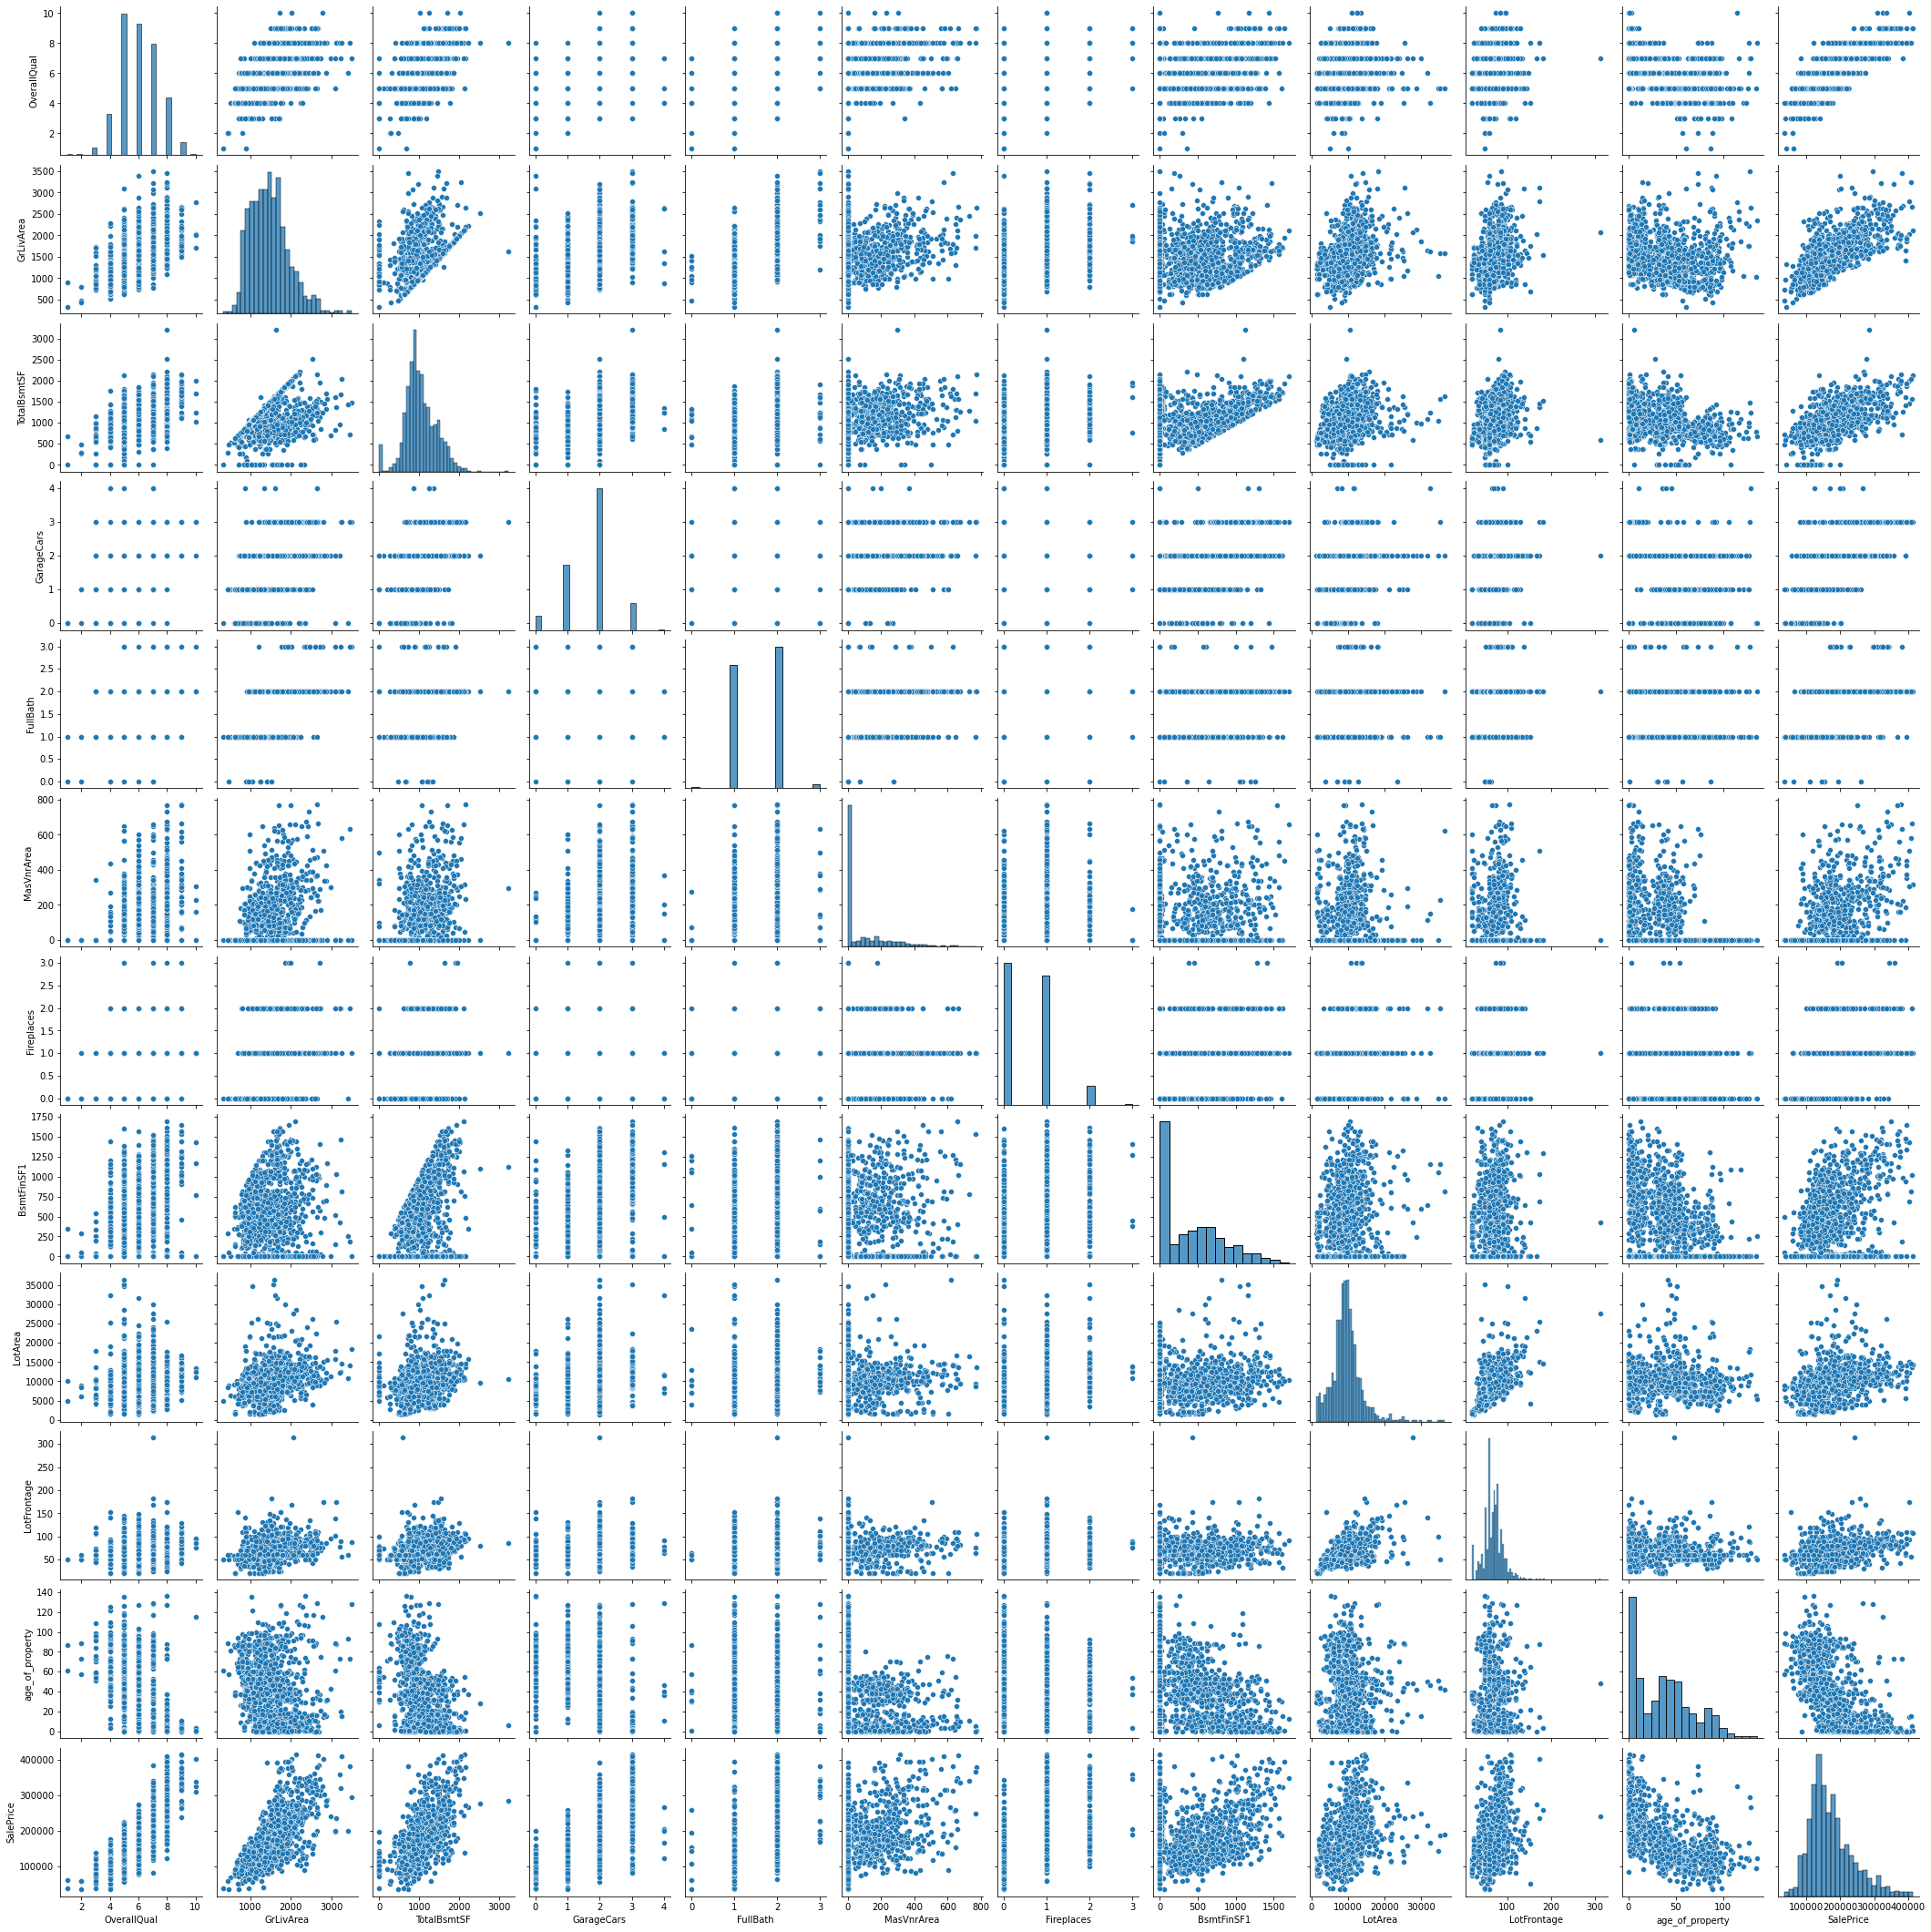

In [382]:
# plot pairplot for the variables having high correlation with target variable(SalePrice)
sns.pairplot(df[['OverallQual','GrLivArea','TotalBsmtSF','GarageCars','FullBath','MasVnrArea','Fireplaces','BsmtFinSF1','LotArea','LotFrontage', 'age_of_property','SalePrice']])

From pairplot we can see linear relationship between saleprice and a number of other independant variables.

In [384]:
pd.set_option('Display.max.rows',20)

# DATA PREPARATION

In [385]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [386]:
#divide the data set into X(independant) and y(target variable)
y=df['SalePrice']
X=df.drop('SalePrice',axis=1)

## GET DUMMIES FOR CATEGORICAL VARIABLES

In [387]:
#get dummies for the categorical variables
for i in df_Categorical_variables:
    if i not in drop_var:
        ml = pd.get_dummies(X[i], prefix=i,drop_first=True)

#Adding the results to the master dataframe
    X= pd.concat([X,ml], axis=1)
    X.drop(i,axis=1,inplace=True)


In [388]:
#Checking dataset after getting dummies
X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  SaleType_ConLI  \
0         706           0        150          856  ...               0   
1         978           0        284         1262  ...               0   
2         486           0        434          920  ...               0   
3         216           0        540          756  ...               0   
4         655           0        490         1145  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 248 columns]

In [389]:
X.shape

(1389, 248)

After getting dummies we have 248 variables.

In [390]:
#recheck the correlation coeffieicents of X after getting dummies
corr2=X.corr()
corr2

MSSubClass  LotFrontage   LotArea  OverallQual  \
MSSubClass               1.000000    -0.407364 -0.337232     0.054745   
LotFrontage             -0.407364     1.000000  0.640832     0.203781   
LotArea                 -0.337232     0.640832  1.000000     0.132594   
OverallQual              0.054745     0.203781  0.132594     1.000000   
OverallCond             -0.060391    -0.051395 -0.022956    -0.083111   
...                           ...          ...       ...          ...   
SaleCondition_AdjLand    0.016238    -0.038119 -0.021464    -0.041861   
SaleCondition_Alloca     0.038463    -0.018365 -0.001461    -0.045064   
SaleCondition_Family     0.000256     0.022196 -0.001126    -0.021142   
SaleCondition_Normal     0.019931    -0.042022 -0.004890    -0.101004   
SaleCondition_Partial   -0.047789     0.088589  0.029025     0.279754   

                       OverallCond  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass               -0.060391    0.024938   -0.059402   -0.062793   
LotFrontage              -0.051395    0.161733    0.121167    0.042324   
LotArea                  -0.022956    0.109098    0.154580    0.071851   
OverallQual              -0.083111    0.377620    0.169827   -0.062407   
OverallCond               1.000000   -0.121723   -0.022465    0.039927   
...                            ...         ...         ...         ...   
SaleCondition_AdjLand    -0.039815   -0.010190   -0.013784   -0.015436   
SaleCondition_Alloca     -0.016972   -0.004642    0.015103   -0.025663   
SaleCondition_Family     -0.024440   -0.001532    0.007750   -0.007772   
SaleCondition_Normal      0.147862   -0.054932    0.036574    0.031015   
SaleCondition_Partial    -0.141134    0.111380   -0.034938   -0.079698   

                       BsmtUnfSF  TotalBsmtSF  ...  SaleType_ConLI  \
MSSubClass             -0.140331    -0.246408  ...       -0.000540   
LotFrontage             0.135526     0.292888  ...        0.001280   
LotArea                 0.068839     0.270665  ...       -0.004755   
OverallQual             0.308357     0.500718  ...       -0.036239   
OverallCond            -0.143480    -0.168583  ...       -0.024026   
...                          ...          ...  ...             ...   
SaleCondition_AdjLand  -0.035653    -0.061005  ...       -0.002500   
SaleCondition_Alloca   -0.068229    -0.071197  ...       -0.004157   
SaleCondition_Family    0.022668     0.030484  ...       -0.005623   
SaleCondition_Normal   -0.150122    -0.117150  ...       -0.019636   
SaleCondition_Partial   0.255569     0.217335  ...       -0.013373   

                       SaleType_ConLw  SaleType_New  SaleType_Oth  \
MSSubClass                   0.013918     -0.041216     -0.015137   
LotFrontage                 -0.053875      0.089872     -0.023706   
LotArea                     -0.024675      0.019974     -0.004347   
OverallQual                 -0.019590      0.283665     -0.059657   
OverallCond                 -0.020248     -0.146151     -0.051871   
...                               ...           ...           ...   
SaleCondition_AdjLand       -0.003230     -0.015209     -0.002500   
SaleCondition_Alloca        -0.005370     -0.025285     -0.004157   
SaleCondition_Family        -0.007265     -0.034207     -0.005623   
SaleCondition_Normal         0.027539     -0.617676     -0.101541   
SaleCondition_Partial       -0.017277      0.984597     -0.013373   

                       SaleType_WD  SaleCondition_AdjLand  \
MSSubClass                0.022193               0.016238   
LotFrontage              -0.060058              -0.038119   
LotArea                  -0.008472              -0.021464   
OverallQual              -0.179137              -0.041861   
OverallCond               0.158823              -0.039815   
...                            ...                    ...   
SaleCondition_AdjLand     0.020203               1.000000   
SaleCondition_Alloca      0.033589              -0.004801   
SaleCondition_Family      0.027092    

In [391]:
#finding the variables with strong  correlation with each other >0.9 or <-0.9
ds=[]
dg=[]
for i in corr2.columns:
    for j in corr2.index:
        if i!=j:
            if corr2.loc[i,j]>=0.9or corr2.loc[i,j]<=-0.9:
                print(i,j,corr2.loc[i,j])
                if i not in dg and i not in ds:
                    ds.append(i)
                    dg.append(j)
                    
                    

Fireplaces FireplaceQu_No_Fireplace -0.9106539716020245
PoolArea PoolQC_No_Pool -0.990853316865413
MiscVal MiscFeature_Shed 0.9595714611222467
RoofStyle_Gable RoofStyle_Hip -0.9336695539725393
RoofStyle_Hip RoofStyle_Gable -0.9336695539725393
Exterior1st_CBlock Exterior2nd_CBlock 1.0
Exterior1st_CemntBd Exterior2nd_CmentBd 0.9800212876129103
Exterior1st_MetalSd Exterior2nd_MetalSd 0.9720882888884814
Exterior1st_VinylSd Exterior2nd_VinylSd 0.9778840868039415
Exterior2nd_CBlock Exterior1st_CBlock 1.0
Exterior2nd_CmentBd Exterior1st_CemntBd 0.9800212876129103
Exterior2nd_MetalSd Exterior1st_MetalSd 0.9720882888884814
Exterior2nd_VinylSd Exterior1st_VinylSd 0.9778840868039415
ExterQual_Gd ExterQual_TA -0.9296879859894749
ExterQual_TA ExterQual_Gd -0.9296879859894749
BsmtQual_No_Basement BsmtCond_No_Basement 1.0
BsmtQual_No_Basement BsmtExposure_No_Basement 0.9856491186677275
BsmtQual_No_Basement BsmtFinType1_No_Basement 1.0
BsmtQual_No_Basement BsmtFinType2_No_Basement 0.9856491186677275
B

In [392]:
# drop features with strong correlation to others.
print(ds)
X.drop(ds, axis=1,inplace=True)

['Fireplaces', 'PoolArea', 'MiscVal', 'RoofStyle_Gable', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_MetalSd', 'Exterior1st_VinylSd', 'ExterQual_Gd', 'BsmtQual_No_Basement', 'BsmtExposure_No_Basement', 'BsmtFinType1_No_Basement', 'BsmtFinType2_No_Basement', 'GarageType_No_Garage', 'GarageQual_No_Garage', 'GarageCond_No_Garage', 'SaleType_New']


In [393]:
X.shape

(1389, 231)

After removing the variables with strong correlation(0.9) with other independant variables, we have 231 variables.

## TRAIN TEST SPLIT

In [394]:
#split the data with train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

### IMPUTING THE MISSING NUMERIC VALUES

In [395]:
#check the null values in X_train
X_train.isnull().sum()


MSSubClass                 0
LotFrontage              182
LotArea                    0
OverallQual                0
OverallCond                0
                        ... 
SaleCondition_AdjLand      0
SaleCondition_Alloca       0
SaleCondition_Family       0
SaleCondition_Normal       0
SaleCondition_Partial      0
Length: 231, dtype: int64

In [396]:
#check the null values in X_test
X_test.isnull().sum()

MSSubClass                0
LotFrontage              61
LotArea                   0
OverallQual               0
OverallCond               0
                         ..
SaleCondition_AdjLand     0
SaleCondition_Alloca      0
SaleCondition_Family      0
SaleCondition_Normal      0
SaleCondition_Partial     0
Length: 231, dtype: int64

In [397]:
# impute lotfrontage with median in X_train and X_test
X_train['LotFrontage']=X_train['LotFrontage'].fillna(X_train['LotFrontage'].median())
X_test['LotFrontage']=X_test['LotFrontage'].fillna(X_test['LotFrontage'].median())

In [398]:
#drop the rest of the null values.
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)

In [399]:
#recheck null values
X_train.isnull().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 231, dtype: int64

In [400]:
#recheck null values
X_test.isnull().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 231, dtype: int64

After imputing , now there are no null values in the train as well as test dataset.

## SCALING THE NUMERIC VARIABLES

In [401]:
# find the numeric variables in X_train and X_test
num_vars= X.select_dtypes(include=['float64', 'int64']).columns
num_vars

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageCars',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'MoSold', 'age_of_property', 'remodelling_age'],
      dtype='object')

In [402]:
#Apply MinMaxScaler scaling to X_train and x_test
scaler = MinMaxScaler()
X_train[num_vars]=scaler.fit_transform(X_train[num_vars])

X_test[num_vars]=scaler.transform(X_test[num_vars])

In [403]:
#recheck the shape of X_train
X_train.shape

(972, 231)

 # MODEL BUILDING AND EVALUATION

## RFE LINEAR REGRESSION

In [448]:
# built the model with rfe linear regression and fit to the train set
lm2 = LinearRegression()
lm2.fit(X_train, y_train)
# use top 25 features
rfe = RFE(lm2, n_features_to_select=90)#we choose the number of features arbitarily with hit and trial method)             
rfe = rfe.fit(X_train, y_train)

In [449]:
# check the columns and their ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 26),
 ('LotFrontage', False, 82),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 18),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('2ndFlrSF', False, 59),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 33),
 ('FullBath', False, 34),
 ('HalfBath', False, 39),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('GarageCars', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', True, 1),
 ('EnclosedPorch', False, 43),
 ('3SsnPorch', True, 1),
 ('ScreenPorch', False, 22),
 ('MoSold', False, 58),
 ('age_of_property', True, 1),
 ('remodelling_age', False, 13),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('Street_Pave', True, 1),
 ('Alley_No_Alley_Access', False, 103),
 ('Alley_Pave', True, 1),
 ('LotShape_IR2', False, 111),
 ('Lo

In [450]:
# find the top 90 columns
column_rele=X_train.columns[rfe.support_]
column_rele


Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'GarageCars', 'WoodDeckSF',
       'OpenPorchSF', '3SsnPorch', 'age_of_property', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave',
       'Alley_Pave', 'LandContour_HLS', 'LotConfig_FR3', 'LandSlope_Sev',
       'Neighborhood_BrkSide', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR',
       'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Condition1_RRAe',
       'Condition2_PosA', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'HouseStyle_2.5Fin', 'RoofStyle_Mansard',
       'RoofStyle_Shed', 'RoofMatl_Metal', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'Exterior1st_BrkFace', 'Exterior1st_ImStucc',
       'Exterior1st_Stucco', 'Exterior2nd_CBlock', 'Exterior2nd_Cment

In [451]:
# check the Xtrain and Xtest dataset with only top 90 features
X_train_rfe=X_train[column_rele]
X_test_rfe=X_test[column_rele]

## RIDGE REGRESSION WITHOUT RFE

In [452]:
# try different values of alpha from 0.00001 to 1000
params = {'alpha': [0.00001,0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()



# Using KFold for model valodation
folds = KFold(n_splits=5,shuffle=True,random_state=100)
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50, 100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [453]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.010619      0.001433         0.004385        0.001349       1e-05   
1        0.005001      0.002601         0.004919        0.005477      0.0001   
2        0.011480      0.006401         0.005140        0.005745       0.001   
3        0.003296      0.004114         0.004167        0.006526        0.01   
4        0.004639      0.009278         0.000798        0.001595        0.05   
..            ...           ...              ...             ...         ...   
24       0.000000      0.000000         0.009373        0.007653          20   
25       0.009373      0.007653         0.000000        0.000000          50   
26       0.001906      0.003811         0.003723        0.006062         100   
27       0.009175      0.000743         0.003788        0.000748         500   
28       0.007925      0.004677         0.001794        0.001465        1000   

               params  split0_test_score  split1_test_score  \
0    {'alpha': 1e-05}           0.864694           0.893244   
1   {'alpha': 0.0001}           0.864702           0.893258   
2    {'alpha': 0.001}           0.864787           0.893399   
3     {'alpha': 0.01}           0.865597           0.894713   
4     {'alpha': 0.05}           0.868494           0.899076   
..                ...                ...                ...   
24      {'alpha': 20}           0.869349           0.872080   
25      {'alpha': 50}           0.833157           0.827800   
26     {'alpha': 100}           0.792359           0.781877   
27     {'alpha': 500}           0.653821           0.623416   
28    {'alpha': 1000}           0.556486           0.518469   

    split2_test_score  split3_test_score  ...  mean_test_score  \
0            0.890525           0.885329  ...         0.883370   
1            0.890533           0.885336  ...         0.883380   
2            0.890610           0.885404  ...         0.883480   
3            0.891354           0.885993  ...         0.884408   
4            0.894175           0.887439  ...         0.887558   
..                ...                ...  ...              ...   
24           0.892217           0.845514  ...         0.871440   
25           0.852644           0.803288  ...         0.829905   
26           0.809366           0.757485  ...         0.785786   
27           0.659708           0.603014  ...         0.638935   
28           0.557368           0.506166  ...         0.540600   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0         0.010014               24            0.951158            0.946892   
1         0.010015               23            0.951158            0.946892   
2         0.010024               22            0.951158            0.946892   
3         0.010108               21            0.951154            0.946888   
4         0.010402               20            0.951093            0.946797   
..             ...              ...                 ...                 ...   
24        0.015180               25            0.903608            0.897274   
25        0.015799               26            0.858810            0.852934   
26        0.016851               27            0.811128            0.805048   
27        0.022060               28            0.652106            0.643741   
28        0.023583               29            0.548842            0.540139   

    split2_train_score  split3_train_score  split4_train_score  \
0             0.946709            0.949966            0.946271   
1             0.946709            0.949966            0.946271   
2             0.946709            0.949966            0.946271   
3             0.946706            0.949960            0.946266   
4             0.946646            0.949882            0.946191   
..                 ...                 ...                 ...   
24            0.897720            0.904999            0.900104   
25            0.

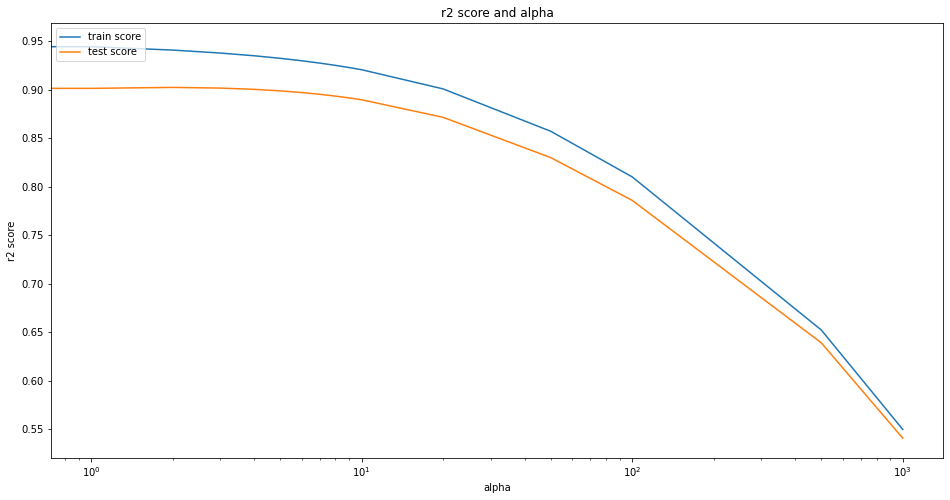

In [454]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.subplots(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.xscale('log')
plt.ylabel('r2 score')
plt.title("r2 score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [455]:
# Printing the best hyperparameter alpha
print("THE OPTIMAL VALUE OF ALPHA IS ",model_cv.best_params_)

THE OPTIMAL VALUE OF ALPHA IS  {'alpha': 2.0}


In [456]:
alpha = 2.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-1.41791794e+04  8.28136961e+03  3.56413954e+04  5.90818991e+04
  3.24029226e+04  9.91814423e+03  3.74037953e+04  1.56214260e+04
  2.10158338e+04  4.10823172e+04  2.32273188e+04 -6.73723360e+03
  8.69699364e+04  1.41899819e+04  5.17762579e+02  1.92187056e+04
  9.26100641e+03 -4.22942903e+03 -7.60209372e+03  2.64961900e+04
  1.09142882e+04  1.21739193e+04  3.74859882e+03  1.50888062e+04
  7.75649574e+03  2.22997488e+03 -2.42491912e+04 -9.90781917e+03
  1.97652424e+04  5.44405670e+03  1.40827389e+04  8.65310923e+03
  7.65612373e+03 -6.98037583e+02 -6.42707139e+03 -9.36179887e+02
 -1.01984831e+03 -3.87442601e+02  1.10557627e+04 -1.05208338e+04
  3.50500292e+03 -4.56094086e+03  5.19357982e+03 -5.83770728e+03
  0.00000000e+00 -6.19395146e+02  4.36469817e+03 -8.62195046e+03
  1.56223375e+03  4.76478371e+03  5.29448147e+03 -5.46179034e+03
 -4.76653520e+03  1.80922668e+04 -1.07243961e+04 -1.15496408e+04
 -8.38307387e+03 -8.20424387e+03 -1.32421136e+04 -8.96925603e+03
  7.85011313e+03 -8.71993

In [457]:
#predict the y values for training set as well as test set.
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

# calculate the r2 score for train and test set and save it in metric2
metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2 for train set is',r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2 for train set  is',r2_test_lr)
metric2.append(r2_test_lr)
# calculate rss for train and test dataset
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss for train set is ',rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss for test set is ',rss2_lr)
metric2.append(rss2_lr)
# calculate mse for train and test dataset
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse for train set is',mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse for test set is ',mse_test_lr)
metric2.append(mse_test_lr**0.5)

r2 for train set is 0.9384220690989232
r2 for train set  is 0.9087486197222934
rss for train set is  259212797946.77548
rss for test set is  175681118111.9268
mse for train set is 266679833.2785756
mse for test set is  421297645.3523424


### Ridge regression without rfe produced a descent model with r2 score for train set 0.93 and r2 score for test set 0.90 with little overfitting but it utilizes all the 231 variables.

## RIDGE REGRESSION WITH RFE

In [458]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()

# cross validation
# Using KFold for model valodation
folds = KFold(n_splits=5,shuffle=True,random_state=100)
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [459]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.005793      0.001729         0.002392        0.000487      0.0001   
1        0.006584      0.003315         0.002592        0.000488       0.001   
2        0.002791      0.001465         0.002003        0.001100        0.01   
3        0.003124      0.006249         0.003123        0.006247        0.05   
4        0.007696      0.007644         0.002058        0.001858         0.1   
..            ...           ...              ...             ...         ...   
23       0.003124      0.006249         0.003124        0.006248          20   
24       0.006249      0.007654         0.003123        0.006247          50   
25       0.003124      0.006248         0.000000        0.000000         100   
26       0.002505      0.002055         0.001396        0.001196         500   
27       0.005187      0.000401         0.002592        0.000489        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}      -14203.149881      -14622.513139   
1    {'alpha': 0.001}      -14202.936842      -14620.975843   
2     {'alpha': 0.01}      -14201.715066      -14605.959480   
3     {'alpha': 0.05}      -14211.942600      -14547.201856   
4      {'alpha': 0.1}      -14227.956661      -14495.225526   
..                ...                ...                ...   
23      {'alpha': 20}      -17420.626900      -20799.800399   
24      {'alpha': 50}      -21249.940774      -26304.618163   
25     {'alpha': 100}      -24645.427584      -30525.248003   
26     {'alpha': 500}      -33382.106217      -39950.643184   
27    {'alpha': 1000}      -37610.083454      -44767.478568   

    split2_test_score  split3_test_score  ...  mean_test_score  \
0       -13786.130935      -13975.958055  ...    -13858.177042   
1       -13785.601104      -13975.631585  ...    -13857.325022   
2       -13780.653408      -13972.399299  ...    -13849.239129   
3       -13758.948947      -13958.712309  ...    -13824.014314   
4       -13728.195057      -13943.168609  ...    -13799.120088   
..                ...                ...  ...              ...   
23      -17058.703639      -19349.948240  ...    -18083.661635   
24      -21438.900486      -24417.388641  ...    -22631.703513   
25      -25360.703836      -28534.166784  ...    -26400.947094   
26      -34892.812151      -37202.316786  ...    -35243.704431   
27      -39001.596419      -40872.829973  ...    -39429.342515   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0       641.311970               14       -11970.709902       -11666.689994   
1       641.518387               13       -11971.142814       -11667.182377   
2       643.599213               12       -11975.525829       -11672.029184   
3       646.534228               11       -11995.514258       -11692.281247   
4       652.626213               10       -12019.753465       -11718.252700   
..             ...              ...                 ...                 ...   
23     1774.004884               24       -17308.561822       -17257.228123   
24     2380.280358               25       -22184.325266       -21841.403943   
25     2746.204883               26       -26284.882676       -25576.609319   
26     3143.560304               27       -35734.772541       -34279.170678   
27     3305.594846               28       -40042.786067       -38329.523192   

    split2_train_score  split3_train_score  split4_train_score  \
0        -12087.467414       -11801.214081       -12233.015414   
1        -12087.882325       -11801.465255       -12233.679382   
2        -12091.905783       -11803.949101       -12240.174857   
3        -12108.125574       -11817.518369       -12266.350223   
4        -12126.189676       -11838.101913       -12297.447859   
..                 ...                 ...                 ...   
23       -17460.268660       -17169.524136       -17632.120714   
24       -22080.

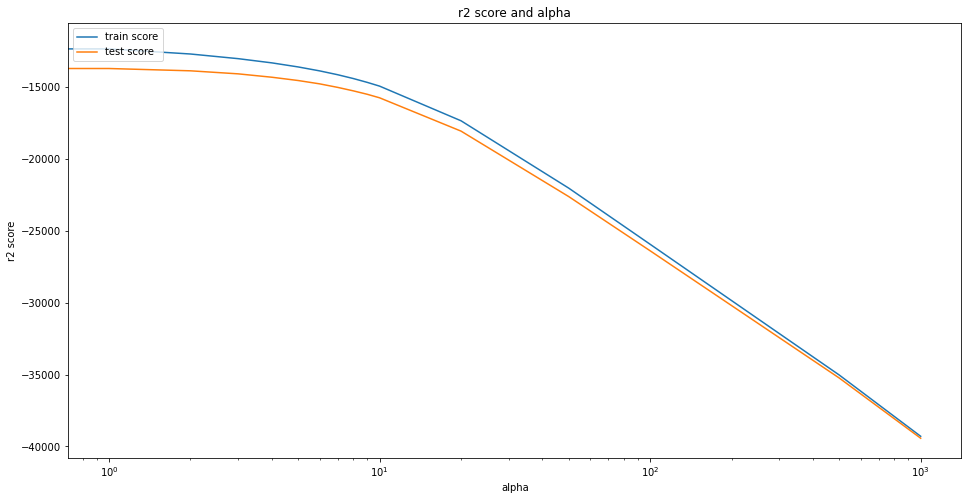

In [460]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.subplots(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.xscale('log')
plt.ylabel('r2 score')
plt.title("r2 score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [461]:
# Printing the best hyperparameter alpha
print('THE OPTIMAL VALUE OF ALPHA FOR RIDGE REGRESSION WITH RFE IS ',model_cv.best_params_)

THE OPTIMAL VALUE OF ALPHA FOR RIDGE REGRESSION WITH RFE IS  {'alpha': 0.7}


In [462]:
alpha = 0.7
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[ 33800.70580912  80039.16927829  43259.45458067  35122.42370126
  13602.53464587  19004.50919546  37596.52993236  -8905.35509606
 151471.19595191  17019.47342368 -16174.64686543 -17237.08414443
  31247.51403048  10628.88550239  12474.36214829  10384.72464476
 -59957.20936085  36001.08605738  11617.73698642  19705.21741202
  15357.72887759  15209.32204513  -9269.46760388   8900.27988114
      0.         -15176.09155356  12429.14864866  30501.4201384
   6859.80248138 -11313.9879118   11016.91319916  29483.29479917
  22790.4018265   25413.03701047 -18802.67760731  31726.09853478
 -15933.64841623 -19454.39076688 -14385.48341197 -13673.20820721
  11074.47917925      0.           8279.00719678  -7344.92706775
 -15570.49871276  16491.41692404  -8158.71208119  12885.12171955
      0.          11461.62328429 -13939.94991911 -13321.75338079
  10886.23932066      0.          -6048.17708403 -11654.08460037
 -20383.71216264 -20095.58389829  14877.11609565  14135.21779905
  12317.5494346   -4068.38

In [463]:
#predict the y values for training set as well as test set.
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

# calculate the r2 score for train and test set and save it in metric2
metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2 for train set for model2 is',r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2 for train set for model 2 is',r2_test_lr)
metric2.append(r2_test_lr)
# calculate rss for train and test dataset
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss for train set for model 2 is ',rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss for train set for model 2 is ',rss2_lr)
metric2.append(rss2_lr)
# calculate mse for train and test dataset
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse for train set for model 2 is ',mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse for train set for model 2 is ',mse_test_lr)
metric2.append(mse_test_lr**0.5)

r2 for train set for model2 is 0.9304910273938365
r2 for train set for model 2 is 0.9048224189724109
rss for train set for model 2 is  292598582121.8026
rss for train set for model 2 is  183240010213.85532
mse for train set for model 2 is  301027347.86193687
mse for train set for model 2 is  439424484.9253125


### Ridge regression with rfe produced a model similar r2 score to Ridge regression without rfe but utilizing only 90 variables from rfe thus may be preferable to the later one.

In [464]:
# find the ridge coefficients of the variables
r_coef = list(ridge.coef_)
r_coef.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,r_coef)))
ridge_coef.columns = ['Feaure','Coef']

In [465]:
ridge_coef

Feaure          Coef
0          MSSubClass  -1553.315012
1         LotFrontage  33800.705809
2             LotArea  80039.169278
3         OverallQual  43259.454581
4         OverallCond  35122.423701
..                ...           ...
86    BldgType_Duplex  32654.239513
87     BldgType_Twnhs  -8927.414895
88    BldgType_TwnhsE  11329.850237
89  HouseStyle_1.5Unf   8133.993715
90  HouseStyle_1Story  12236.324720

[91 rows x 2 columns]

In [466]:
# create a column with only numerical value of coeffient without (+or-)sign
ridge_coef['post_coef']=[x if x>0 else -x for x in ridge_coef['Coef']]

In [467]:
# find top 10  positive or negative predictor variables
ridge_coef.sort_values(by = 'post_coef',ascending = False).head(10)

Feaure           Coef      post_coef
9            TotalBsmtSF  151471.195952  151471.195952
2                LotArea   80039.169278   80039.169278
17          BedroomAbvGr  -59957.209361   59957.209361
3            OverallQual   43259.454581   43259.454581
7             BsmtFinSF2   37596.529932   37596.529932
18          KitchenAbvGr   36001.086057   36001.086057
4            OverallCond   35122.423701   35122.423701
68  Neighborhood_Somerst  -34340.177316   34340.177316
1            LotFrontage   33800.705809   33800.705809
86       BldgType_Duplex   32654.239513   32654.239513

### RIDGE REGRESSION WITH RFE:

### 1.Optimal value of alpha for our model is  0.7

### 2. R2 score for Train set is 0.93

### 3. R2 score for Test set is 0.90

### 4. Number of variables utilized in Model development -90

### 5. Top 10 (Positive or Negative) predictor variables:
###                        TotalBsmtSF	
### 	LotArea	
### 	BedroomAbvGr	
### 	OverallQual	
###    BsmtFinSF2	
###    KitchenAbvGr	
###    OverallCond	
###   Neighborhood_Somerst
###   LotFrontage	
###    BldgType_Duplex	


## LASSO REGRESSION

In [468]:
# check different values for alpha as params
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [469]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()



mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.134567      0.050766         0.003723        0.006062      0.0001   
1       0.123715      0.008937         0.001596        0.002054       0.001   
2       0.109954      0.009436         0.007311        0.007058        0.01   
3       0.106948      0.015483         0.006679        0.007345        0.05   
4       0.100211      0.015844         0.003127        0.006254         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.864691           0.893121           0.890782   
1   {'alpha': 0.001}           0.864694           0.893164           0.890783   
2    {'alpha': 0.01}           0.864728           0.893271           0.890786   
3    {'alpha': 0.05}           0.864874           0.893425           0.890924   
4     {'alpha': 0.1}           0.865057           0.893624           0.891108   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.885727  ...         0.883476        0.010045               26   
1           0.885729  ...         0.883486        0.010052               25   
2           0.885750  ...         0.883526        0.010062               24   
3           0.885843  ...         0.883660        0.010060               23   
4           0.885958  ...         0.883831        0.010060               22   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.951158            0.946892            0.946709   
1            0.951158            0.946892            0.946709   
2            0.951158            0.946892            0.946709   
3            0.951158            0.946892            0.946709   
4            0.951157            0.946892            0.946709   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.949966            0.946271          0.948199         0.001976  
1            0.949966            0.946271          0.948199         0.001976  
2            0.949966            0.946271          0.948199         0.001976  
3            0.949966            0.946271          0.948199         0.001976  
4            0.949965            0.946270          0.948199         0.001976  

[5 rows x 21 columns]

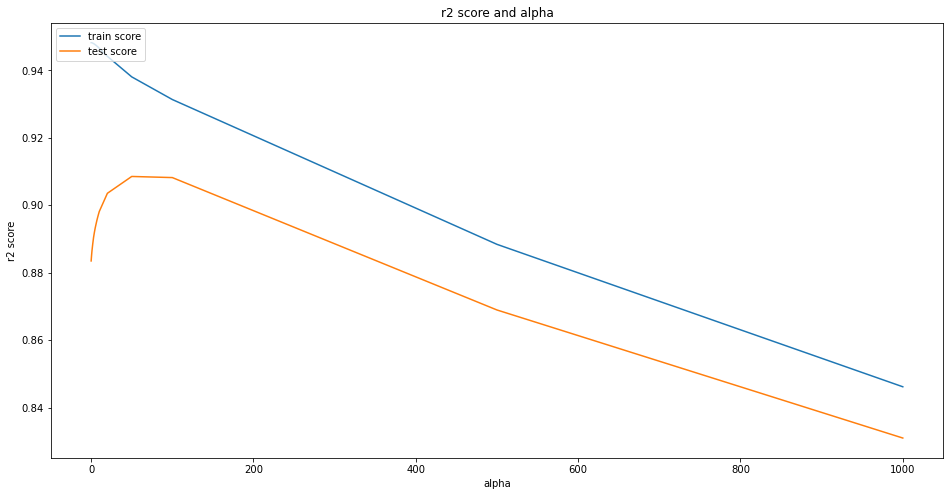

In [470]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.subplots(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')

plt.title("r2 score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [471]:
# Printing the best hyperparameter alpha
print('THE OPTIMAL VALUE OF ALPHA FOR RIDGE REGRESSION WITH RFE IS ',model_cv.best_params_)

THE OPTIMAL VALUE OF ALPHA FOR RIDGE REGRESSION WITH RFE IS  {'alpha': 50}


In [472]:
#Fitting lasso model for alpha = 50 and printing coefficients which have been penalised

alpha =50

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=50)

In [473]:
# coefficient for lasso model
lasso.coef_

array([-1.88150772e+04,  4.04714060e+03,  3.24947231e+04,  7.57495819e+04,
        3.67239059e+04,  8.31972198e+03,  2.16698769e+04,  0.00000000e+00,
        0.00000000e+00,  5.26746339e+04,  2.85946548e+02, -6.48699845e+03,
        1.43496458e+05,  1.54523471e+04, -0.00000000e+00,  8.28609752e+03,
        6.21454393e+03, -6.04049377e+03, -5.22725237e+03,  2.16137758e+04,
        8.28031432e+03,  8.86723491e+03,  3.50420027e+02,  5.62675012e+03,
        3.49660203e+03,  1.13770291e+03, -3.47859548e+04, -8.38219410e+03,
        1.35102179e+04, -0.00000000e+00,  7.89977487e+03,  6.39999395e+02,
        0.00000000e+00,  0.00000000e+00, -5.55335455e+03, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  9.96558320e+03, -6.31574865e+03,
        2.60477671e+03, -0.00000000e+00,  4.28994059e+03, -1.57405754e+03,
        0.00000000e+00, -0.00000000e+00,  1.65632040e+03, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.07235017e+04, -0.00000000e+00,
       -0.00000000e+00,  

In [474]:
len(lasso.coef_)

231

In [475]:
#find the number of  features selected in lasso regression model with coeffiecient not equal to 0.(lasso feature selection)
S=[]
for x in lasso.coef_:
    if x>0:
        S.append(x)
len(S)    

66

In [476]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2 for train set for model3  is ',r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2 for train set for model 3 is ',r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('r2 for train set for model 3 is ',rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('r2 for train set for model 3 is ',rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('r2 for train set for model 3 is ',mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('r2 for train set for model 3 is ',mse_test_lr)
metric3.append(mse_test_lr**0.5)

r2 for train set for model3  is  0.9345312409356155
r2 for train set for model 3 is  0.9112160087548833
r2 for train set for model 3 is  275591270555.10876
r2 for train set for model 3 is  170930793648.4139
r2 for train set for model 3 is  283530113.7398238
r2 for train set for model 3 is  409905979.9722156


### Lasso regression  produced a model with r2 score for train set 0.93 and test set 0.91 which is slightly better than ridge and  utilizing only 66 variables.

In [477]:
# finding the coefficients of variables for lasso model
l_coef = list(lasso.coef_)
l_coef.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(cols,l_coef)))
lasso_coef.columns = ['Feature','Coef']


In [478]:
#lasso coeffiecients
lasso_coef

Feature          Coef
0               MSSubClass  19208.782478
1              LotFrontage -18815.077177
2                  LotArea   4047.140604
3              OverallQual  32494.723123
4              OverallCond  75749.581940
..                     ...           ...
226  SaleCondition_AdjLand  -4952.278398
227   SaleCondition_Alloca      0.000000
228   SaleCondition_Family     -0.000000
229   SaleCondition_Normal     -0.000000
230  SaleCondition_Partial   8192.304471

[231 rows x 2 columns]

In [479]:
lasso_coef['post_coef']=[x if x>0 else -x for x in lasso_coef['Coef']]

In [480]:
#find the top 10 predictor variables
lasso_coef.sort_values(by = 'post_coef',ascending = False).head(10)

Feature           Coef      post_coef
13          BsmtFullBath  143496.458001  143496.458001
4            OverallCond   75749.581940   75749.581940
10              2ndFlrSF   52674.633935   52674.633935
5             MasVnrArea   36723.905873   36723.905873
27       remodelling_age  -34785.954753   34785.954753
3            OverallQual   32494.723123   32494.723123
70   Neighborhood_Timber   22795.101168   22795.101168
63  Neighborhood_NridgHt   22034.961030   22034.961030
54  Neighborhood_Edwards   21736.552312   21736.552312
7             BsmtFinSF2   21669.876874   21669.876874

### LASSO REGRESSION:

### 1.Optimal value of alpha for our model is  50

### 2. R2 score for Train set is 0.93

### 3. R2 score for Test set is 0.91

### 4. Number of variables utilized in Model development -66

### 5. Top 10 (Positive or Negative) predictor variables:
###  BsmtFullBath
### OverallCond
### 2ndFlrSF
### MasVnrArea
### remodelling_age(negative predictor)
### OverallQual
### Neighborhood_Timber
### Neighborhood_NridgHt
### Neighborhood_Edwards
### BsmtFinSF2



In [481]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'],'Ridge Regression':metric2}

rg_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Ridge Regression'] )

ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat( [rg_metric, ls_metric], axis = 1)

final_metric

Metric  Ridge Regression  Lasso Regression
0  R2 Score (Train)      9.304910e-01      9.345312e-01
1   R2 Score (Test)      9.048224e-01      9.112160e-01
2       RSS (Train)      2.925986e+11      2.755913e+11
3        RSS (Test)      1.832400e+11      1.709308e+11
4       MSE (Train)      1.735014e+04      1.683835e+04
5        MSE (Test)      2.096245e+04      2.024613e+04

## FINAL MODEL

We choose lasso model as our final model:

 1. Optimal value of alpha for our model is  50

 2. R2 score for Train set is 0.93

 3. R2 score for Test set is 0.91

 4. Number of variables utilized in Model development -66

 5. Top 10 (Positive or Negative) predictor variables:
     BsmtFullBath
     OverallCond
     2ndFlrSF
     MasVnrArea
     remodelling_age(negative predictor)
     OverallQual
     Neighborhood_Timber
     Neighborhood_NridgHt
     Neighborhood_Edwards
     BsmtFinSF2


## RESIDUAL ANALYSIS 

In [482]:
# getting residuals
residuals=y_test-y_pred_test

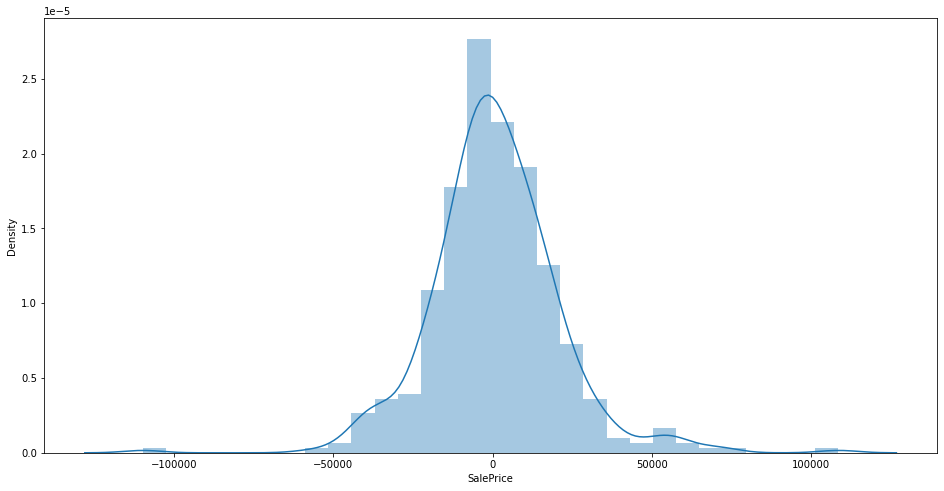

In [484]:
#plotting the histogram for residual
plt.figure(figsize=(16,8))
sns.distplot(residuals,bins=30)
plt.show()


## CONCLUSION AND RECOMMENDATIONS

Based on our lasso model, company can:

1.increased the price of the property based on positive predictors,number of Basement FullBath, Overall Condition, 2nd Floor Square feet, Masonary veneer Area,Basement Finished SF2, Overall Quality and also for the Neighborhoods likeTimber,NridgHt and Edwards 

2.prices will be less for the older properties(increase remodelling_age(negative predictor))

3.Our model will be able to predict the price correctly with test r2 score of 0.91.

### Question1: What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

### ANSWER:
#### The optimal value for alpha for our ridge regression model is 0.7.

#### The optimal value for alpha for our lasso regression model is 50.

### Choosing double value of alpha for ridge and lasso

In [497]:
# model with double the value of alpha(0.7x2=1.4)
alpha = 1.4
ridge2 = Ridge(alpha=alpha)

ridge2.fit(X_train_rfe, y_train)
#predict the y values for training set as well as test set.
y_pred_train = ridge2.predict(X_train_rfe)
y_pred_test = ridge2.predict(X_test_rfe)

# calculate the r2 score for train and test set and save it in metric2
metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2 for train set for model 3 is',r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2 for train set for model 3 is',r2_test_lr)
metric3.append(r2_test_lr)

r2 for train set for model 3 is 0.9284438106613904
r2 for train set for model 3 is 0.90474085146296


In [498]:
# top 10 features after changing the alpha
r_coef = list(ridge2.coef_)
r_coef.insert(0,ridge2.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
ridge_coef2 = pd.DataFrame(list(zip(cols,r_coef)))
ridge_coef2.columns = ['Feaure','Coef']
ridge_coef2['post_coef']=[x if x>0 else -x for x in ridge_coef2['Coef']]
ridge_coef2.sort_values(by = 'post_coef',ascending = False).head(10)

Feaure           Coef      post_coef
9    TotalBsmtSF  139564.416103  139564.416103
2        LotArea   81003.096400   81003.096400
17  BedroomAbvGr  -55018.257156   55018.257156
3    OverallQual   39933.574589   39933.574589
7     BsmtFinSF2   37484.696223   37484.696223
4    OverallCond   35296.223622   35296.223622
1    LotFrontage   33265.277194   33265.277194
13  BsmtFullBath   32391.868625   32391.868625
18  KitchenAbvGr   30690.000384   30690.000384
32   Street_Pave   30027.174014   30027.174014

Doubling the alpha  slightly reduced the r2 score for both train and test dataset in our model but the top predictor variables remained the same. So,further increasing the alpha value to 100 and rechecking the model.

In [499]:
#model with increased alpha ,alpha=100
alpha = 100
ridge2 = Ridge(alpha=alpha)

ridge2.fit(X_train_rfe, y_train)
#predict the y values for training set as well as test set.
y_pred_train = ridge2.predict(X_train_rfe)
y_pred_test = ridge2.predict(X_test_rfe)

# calculate the r2 score for train and test set and save it in metric2
metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2 for train set for model 3 is',r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2 for train set for model 3 is',r2_test_lr)
metric3.append(r2_test_lr)

r2 for train set for model 3 is 0.7298333837850748
r2 for train set for model 3 is 0.7076250059925298


Increasing the alpha value decreased both r2 score for train as well as test suggesting underfitting and it also changed the top 10 predictive features.

### Choosing double alpha for lasso

In [500]:
# model with double value of alpha (50x2=100)
alpha = 100
lasso2 = Lasso(alpha=alpha)

lasso2.fit(X_train, y_train)
#predict the y values for training set as well as test set.
y_pred_train = lasso2.predict(X_train)
y_pred_test = lasso2.predict(X_test)

# calculate the r2 score for train and test set and save it in metric2

r2_train_lr = r2_score(y_train, y_pred_train)
print('r2 for train set for model 3 is',r2_train_lr)


r2_test_lr = r2_score(y_test, y_pred_test)
print('r2 for train set for model 3 is',r2_test_lr)


r2 for train set for model 3 is 0.9286017569882032
r2 for train set for model 3 is 0.9081290487200414


In [501]:
#top 10 predictors after increasing the alpha.
l_coef = list(lasso2.coef_)
l_coef.insert(0,lasso2.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
lasso_coef2 = pd.DataFrame(list(zip(cols,l_coef)))
lasso_coef2.columns = ['Feaure','Coef']
lasso_coef2['post_coef']=[x if x>0 else -x for x in lasso_coef2['Coef']]
lasso_coef2.sort_values(by = 'post_coef',ascending = False).head(10)

Feaure           Coef      post_coef
13          BsmtFullBath  140986.568223  140986.568223
4            OverallCond   81654.993393   81654.993393
10              2ndFlrSF   49102.676350   49102.676350
5             MasVnrArea   31915.364841   31915.364841
27       remodelling_age  -31129.062422   31129.062422
3            OverallQual   28646.942304   28646.942304
0             MSSubClass   27033.183359   27033.183359
7             BsmtFinSF2   23214.305398   23214.305398
20            WoodDeckSF   22144.541722   22144.541722
54  Neighborhood_Edwards   20642.954731   20642.954731

Again for lasso model also,doubling the alpha value slightly decreased r2 score for both train as well as test  in our model. So,further increasing the alpha value to 500 and rechecking the model

In [502]:
#model for increased value of alpha(alpha=500)
alpha = 500
lasso2 = Lasso(alpha=alpha)

lasso2.fit(X_train, y_train)
#predict the y values for training set as well as test set.
y_pred_train = lasso2.predict(X_train)
y_pred_test = lasso2.predict(X_test)

# calculate the r2 score for train and test set and save it in metric2

r2_train_lr = r2_score(y_train, y_pred_train)
print('r2 for train set for model 3 is',r2_train_lr)


r2_test_lr = r2_score(y_test, y_pred_test)
print('r2 for train set for model 3 is',r2_test_lr)

r2 for train set for model 3 is 0.8863049409211704
r2 for train set for model 3 is 0.8749072107436766


Again for lasso model also, further increasing the alpha value decreased both r2 score for train as well as test suggesting underfitting and it also changed the top 10 predictive features.

### Question 2: You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

We performed the ridge regression with and out rfe and lasso regression. Ridge regression without rfe gave a good  r2 score for train (0.93) and test dataset(0.91) but it included all the feature variables(231 variables). Ridge regression with RFE gave a similar r2 score for train(0.93) and test dataset(0.91) with only 90 variables(number of variables limited to 90) which is an added advantage but again the test score is less than train score which shows slight overfitting.
Lasso regression produced the r2 score for train set 0.93 and for test set 0.91 which is a little better than the ridge regression and also it utilised only 66 variables.
Thus in conclusion we will select lasso regression model for the above mentioned reasons.

### Question 3: After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [503]:
# dropping the top 5 predictors from the X_train and X_test data set
X_train_lasso_re=X_train.drop(['BsmtFullBath','OverallCond','2ndFlrSF','MasVnrArea','remodelling_age'],inplace= False,axis=1)
X_test_lasso_re=X_test.drop(['BsmtFullBath','OverallCond','2ndFlrSF','MasVnrArea','remodelling_age'],inplace= False,axis=1)


In [504]:
lasso= Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_lasso_re, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [505]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [506]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_lasso_re, y_train)

Lasso(alpha=100)

In [507]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_lasso_re)
y_pred_test = lasso.predict(X_test_lasso_re)


r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)


r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)



0.9227201231111584
0.9001561676581016


In [508]:
# find new top10 variables 
l_coef = list(lasso.coef_)
l_coef.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(cols,l_coef)))
lasso_coef.columns = ['Feaure','Coef']
lasso_coef['post_coef']=[x if x>0 else -x for x in lasso_coef['Coef']]
lasso_coef.sort_values(by = 'post_coef',ascending = False).head(10)

Feaure           Coef      post_coef
10              2ndFlrSF  142925.436214  142925.436214
4            OverallCond   88612.235180   88612.235180
8              BsmtUnfSF   40099.438295   40099.438295
5             MasVnrArea   30717.295017   30717.295017
0             MSSubClass   28397.307562   28397.307562
3            OverallQual   26368.477396   26368.477396
176       Electrical_Mix  -23369.859455   23369.859455
16              HalfBath   23030.716326   23030.716326
49   Neighborhood_BrDale   22609.350949   22609.350949
23             3SsnPorch  -21092.267675   21092.267675

### Question 4:How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

We can make a model robust by two ways:
1.	Working with variables
2.	Regularisation
3.	Using Robust Algorithms

1.	Working with variables(binning). 
      1.	We can make a model robust by creating more derived variables having bins and using WOE (weight of evidence). These can make a model resistant to outliers.
      2.	Removing outliers.
2.  Regularisation: Regularisation (ridge and lasso) also reduces the overfitting and thus makes a model more robust that is high accuracy for the unknown data.
3. Using Robust Algorithms:
        Huber Regression: This algorithm assigns a different weight to outliers than the rest of the data in the dataset.
        RANSAC: (Random Sample Consensus): It separates data into inliers and outliers and utilizes only inliers only.
Making a model robust or more generalised with increase the accuracy score especially for the test set and thus a model will make more close predictions on unseen data. It will reduce the overfitting. This happens because the regression line for the model will be aligned with the main body of data and will not be influenced by the outliers. E.g huber regression scatter plot.
